In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)

In [3]:
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

#### Read data

In [4]:
url = 'train.csv'
data = pd.read_csv(url,index_col='Id')

# 1. Exploratory Data Analysis

In [5]:
df = data.copy()
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

**variable target** :

SalePrice

**lignes et colonnes** :

In [6]:
df.shape                                                            # 1259 Lignes et 81 columns

(1259, 80)

**types de variables** :

In [7]:
df.dtypes.value_counts()                                            # qualitatives : 38 (float/int) , quantitatives : 43(object)

object     43
int64      34
float64     3
dtype: int64

###### DataFrame Description : 

In [8]:
df.describe().T

count           mean           std      min       25%  \
MSSubClass     1259.0      56.914218     42.353617     20.0      20.0   
LotFrontage    1041.0      70.110471     23.522213     21.0      59.0   
LotArea        1259.0   10524.300238  10391.598333   1300.0    7590.0   
OverallQual    1259.0       6.103257      1.381394      1.0       5.0   
OverallCond    1259.0       5.570294      1.119465      1.0       5.0   
YearBuilt      1259.0    1971.478157     29.933659   1875.0    1954.0   
YearRemodAdd   1259.0    1984.816521     20.617506   1950.0    1966.5   
MasVnrArea     1252.0     103.133387    182.185126      0.0       0.0   
BsmtFinSF1     1259.0     443.334392    439.025793      0.0       0.0   
BsmtFinSF2     1259.0      45.725973    159.593598      0.0       0.0   
BsmtUnfSF      1259.0     565.019063    440.826822      0.0     224.5   
TotalBsmtSF    1259.0    1054.079428    422.824587      0.0     796.0   
1stFlrSF       1259.0    1158.503574    375.890904    334.0     882.0   
2ndFlrSF       1259.0     342.880858    435.516797      0.0       0.0   
LowQualFinSF   1259.0       6.246227     50.860979      0.0       0.0   
GrLivArea      1259.0    1507.630659    513.865812    334.0    1126.0   
BsmtFullBath   1259.0       0.420969      0.519023      0.0       0.0   
BsmtHalfBath   1259.0       0.060365      0.244839      0.0       0.0   
FullBath       1259.0       1.559174      0.552737      0.0       1.0   
HalfBath       1259.0       0.382049      0.500583      0.0       0.0   
BedroomAbvGr   1259.0       2.857029      0.816301      0.0       2.0   
KitchenAbvGr   1259.0       1.045274      0.219153      0.0       1.0   
TotRmsAbvGrd   1259.0       6.493249      1.609958      2.0       5.0   
Fireplaces     1259.0       0.607625      0.641792      0.0       0.0   
GarageYrBlt    1188.0    1978.430135     24.718827   1900.0    1961.0   
GarageCars     1259.0       1.760127      0.743578      0.0       1.0   
GarageArea     1259.0     471.674345    212.502409      0.0     333.0   
WoodDeckSF     1259.0      94.604448    123.939261      0.0       0.0   
OpenPorchSF    1259.0      46.150913     65.449317      0.0       0.0   
EnclosedPorch  1259.0      21.625099     60.920712      0.0       0.0   
3SsnPorch      1259.0       3.482129     29.289552      0.0       0.0   
ScreenPorch    1259.0      14.668785     54.093490      0.0       0.0   
PoolArea       1259.0       1.819698     32.364185      0.0       0.0   
MiscVal        1259.0      45.944400    525.688744      0.0       0.0   
MoSold         1259.0       6.315330      2.684202      1.0       5.0   
YrSold         1259.0    2007.799841      1.324095   2006.0    2007.0   
SalePrice      1259.0  181144.812550  80588.024473  34900.0  129900.0   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9452.0   11611.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1973.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     166.0    1600.0  
BsmtFinSF1        385.0     712.0    2260.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         470.0     807.0    2336.0  
TotalBsmtSF       996.0    1297.5    3206.0  
1stFlrSF         1086.0    1389.5    3228.0  
2ndFlrSF            0.0     728.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1456.0    1768.0    4676.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      14.0  
Fireplaces          1.0       1.0       3.0  
GarageYrBlt      1980.0    2002.0    2010.0  
GarageCars          2.0       2.0       4.0  

##### Conclusions : 
    
- Feature imputation for { LotFrontage , GarageYrBlt , MasVnrArea }

**Analyse des valeurs manquantes** :

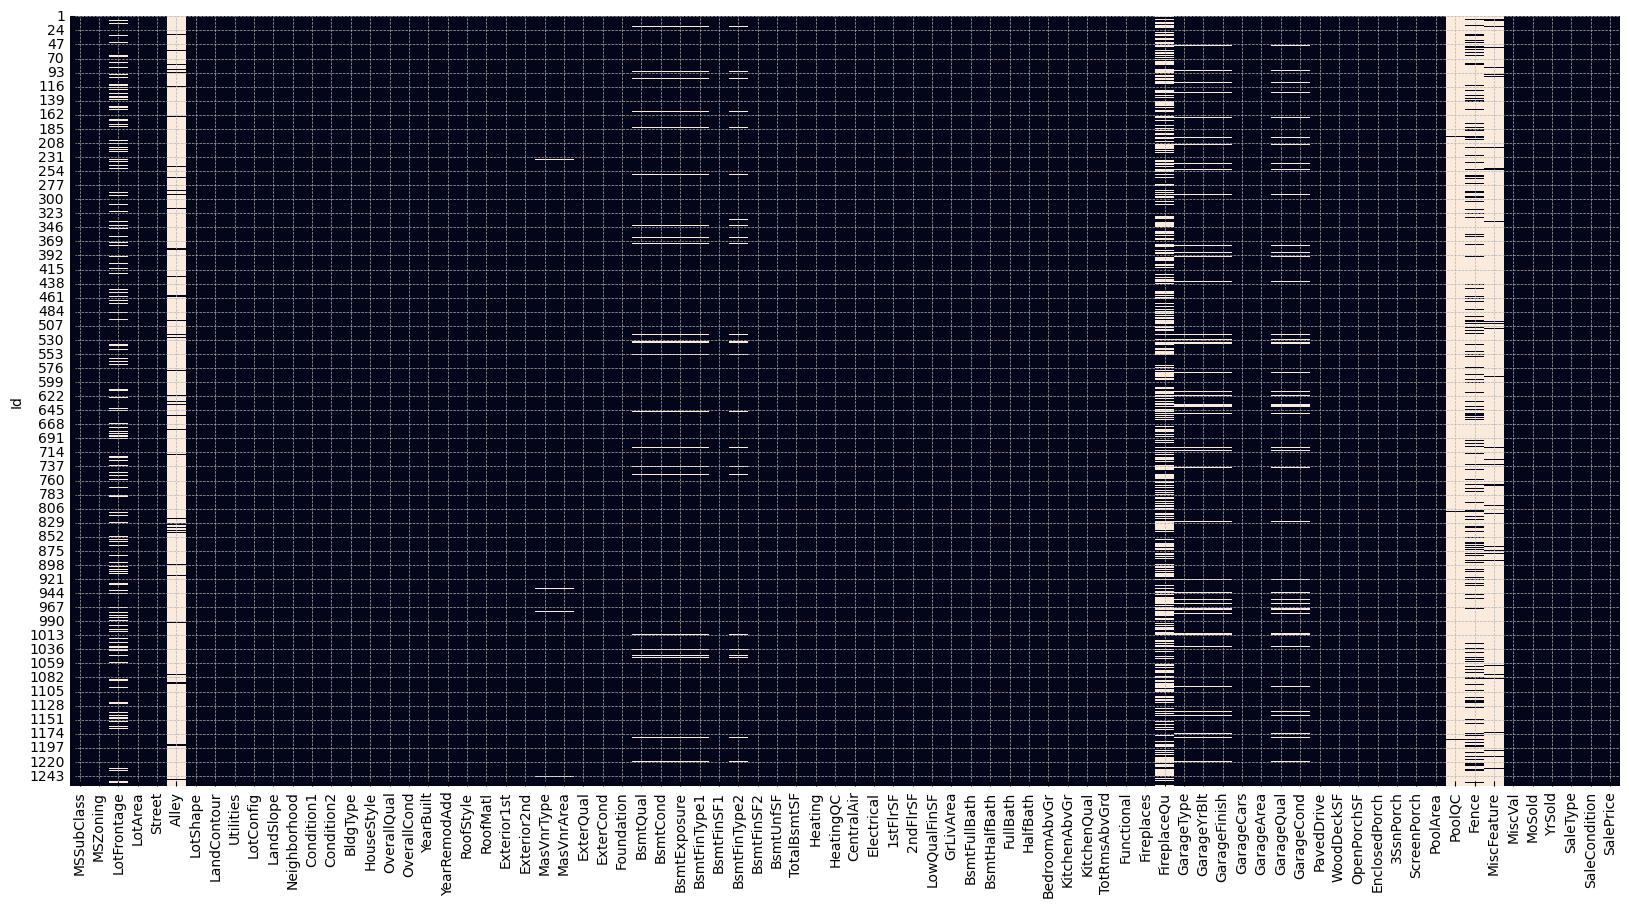

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

MSSubClass       0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
GrLivArea        0.000000
KitchenAbvGr     0.000000
LowQualFinSF     0.000000
1stFlrSF         0.000000
Electrical       0.000000
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
2ndFlrSF         0.000000
BsmtUnfSF        0.000000
KitchenQual      0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
TotRmsAbvGrd     0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
BsmtFinSF1       0.000000
MSZoning         0.000000
LotArea     

Avant de commencer l'analyse du font on Elimine les colonnes inutiles ( dans notre cas les columns qui ont beaucoup de NaN > 80% )

- **Alley         :   0.939635**
- **MiscFeature   :   0.959492**
- **PoolQC        :   0.996823**
- **Fence         :   0.809373**

**Dataset :**

- The data provided describes various features of residential properties and their corresponding sale prices. The data has a total of 81 variables, including one target variable (SalePrice) and 80 predictor variables.

- The target variable, SalePrice, is the sale price of the property in dollars, which is the variable that is being predicted in the dataset.

- The predictor variables describe various aspects of the property, including its building class, zoning classification, lot size, type of road and alley access, shape and flatness of the property, available utilities, location , proximity to main roads or railroads, type and style of the dwelling, quality and condition of various aspects of the property such as the roof, exterior, foundation, basement, heating, and air conditioning, number of bedrooms and bathrooms, garage size and quality, and presence of additional features such as a pool or fence.

- The dataset also includes variables that describe the time of sale, such as the month and year of sale, as well as the type and condition of the sale.

- By analyzing this dataset, it is possible to identify the factors that most strongly influence the sale price of a property and develop predictive models that can accurately estimate the sale price based on its features.


MSSubClass


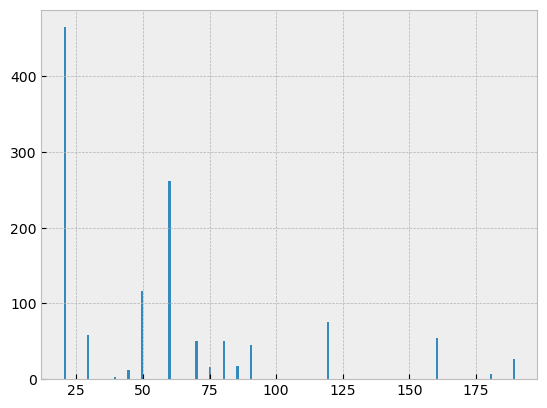

LotArea


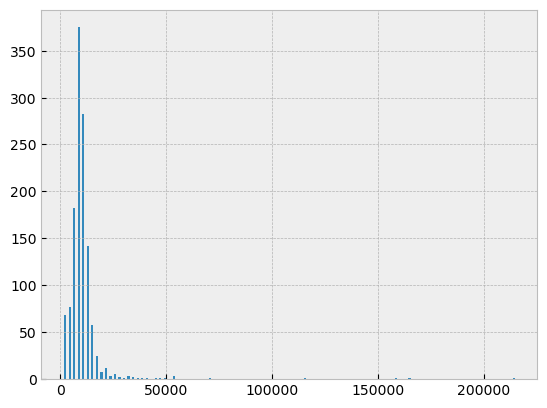

OverallQual


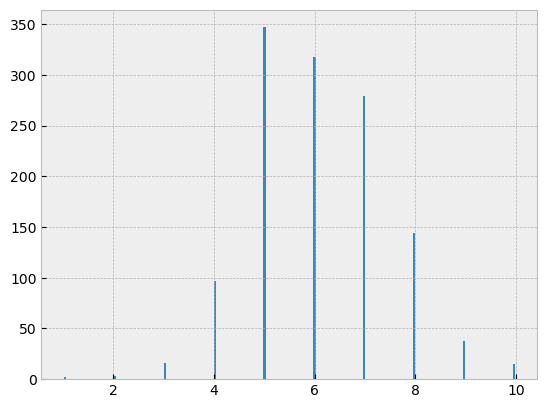

OverallCond


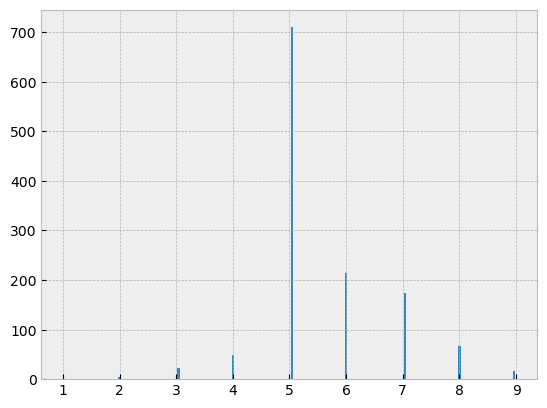

YearBuilt


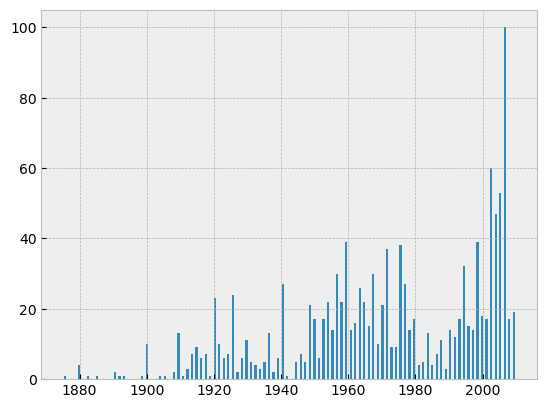

YearRemodAdd


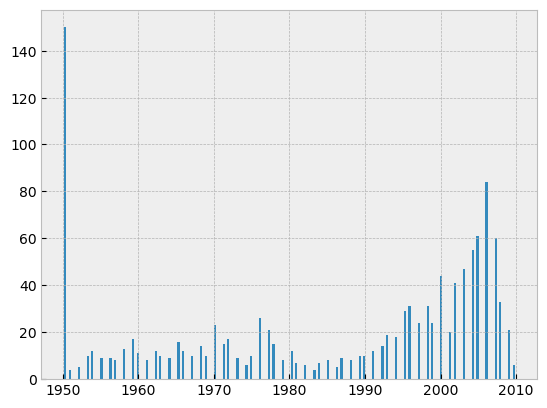

BsmtFinSF1


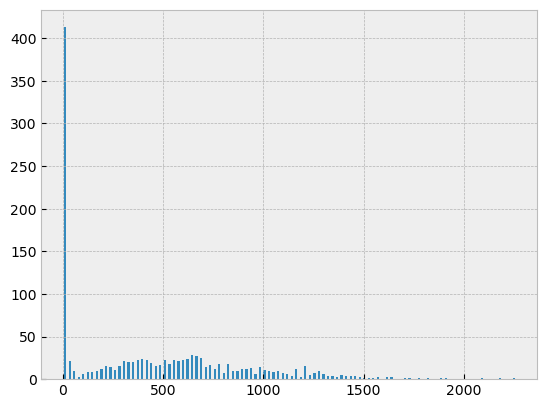

BsmtFinSF2


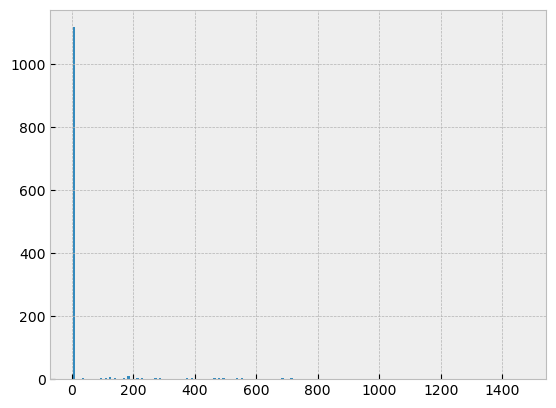

BsmtUnfSF


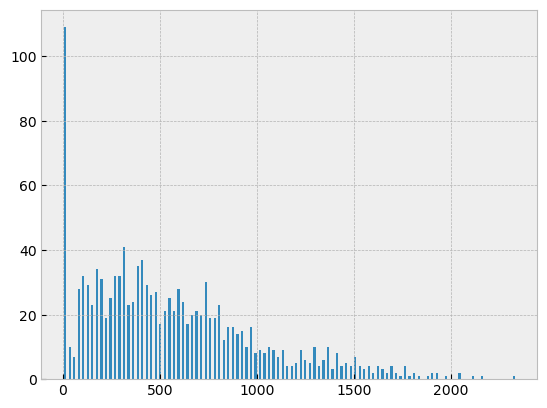

TotalBsmtSF


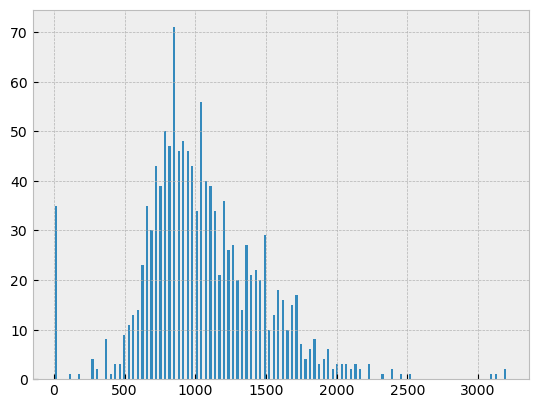

1stFlrSF


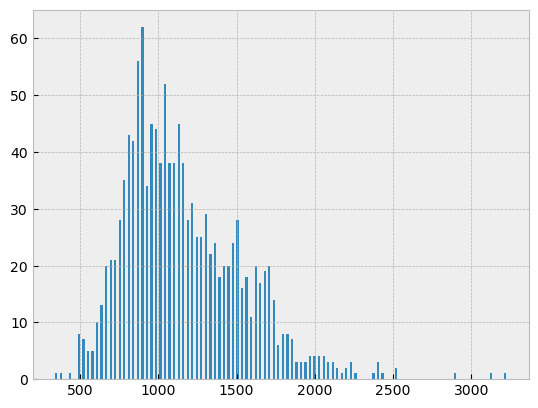

2ndFlrSF


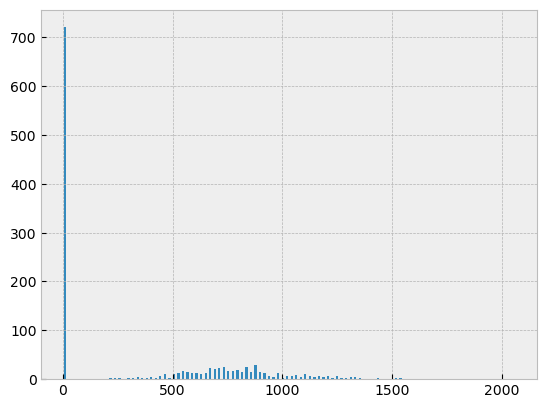

LowQualFinSF


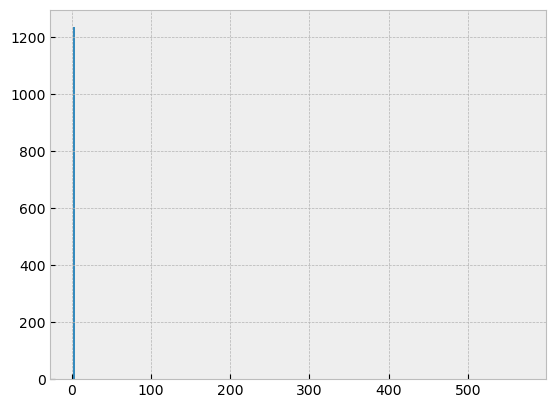

GrLivArea


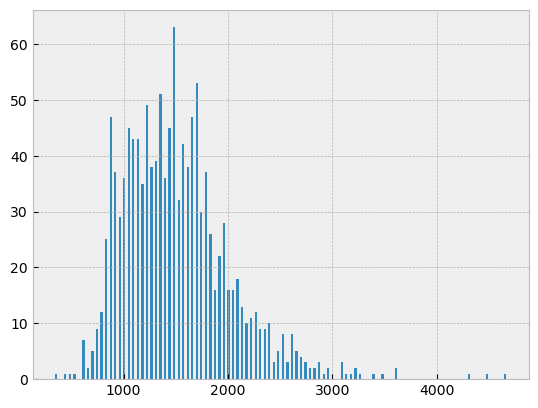

BsmtFullBath


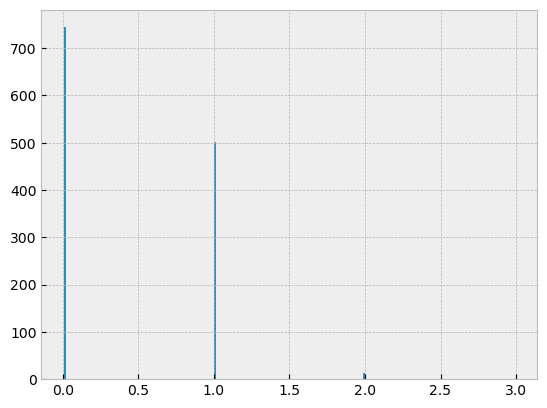

BsmtHalfBath


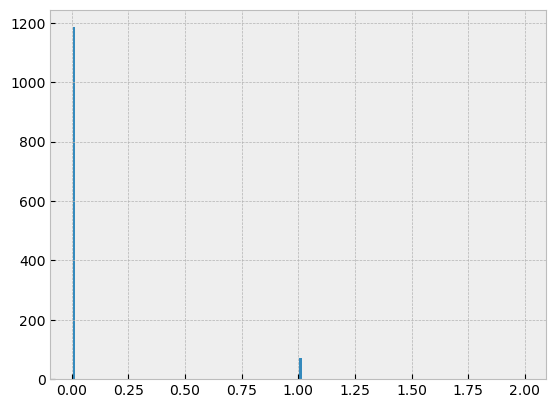

FullBath


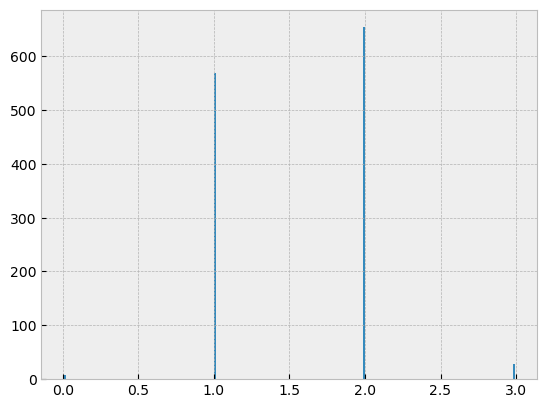

HalfBath


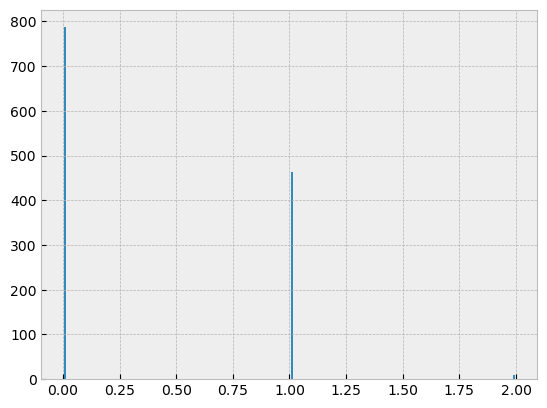

BedroomAbvGr


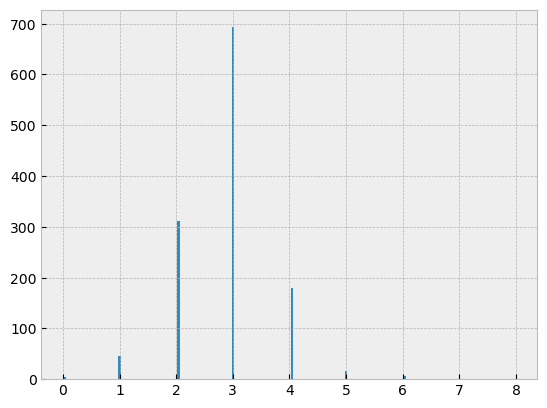

KitchenAbvGr


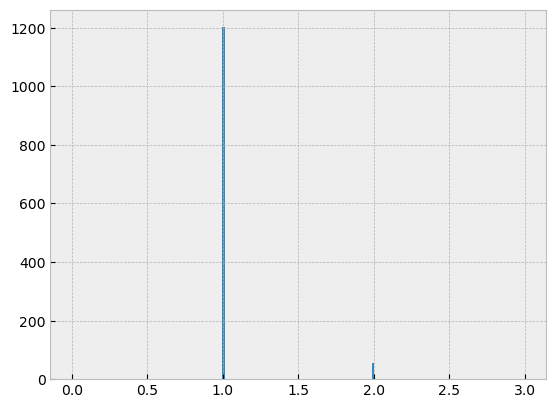

TotRmsAbvGrd


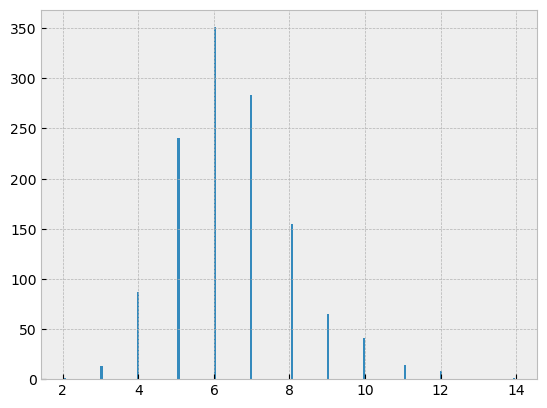

Fireplaces


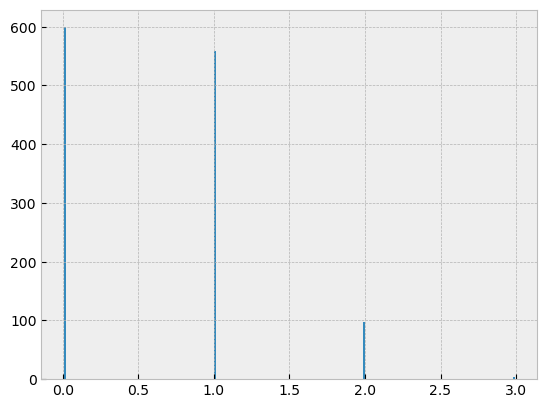

GarageCars


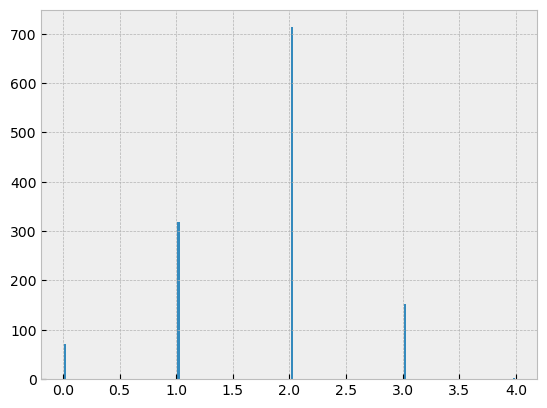

GarageArea


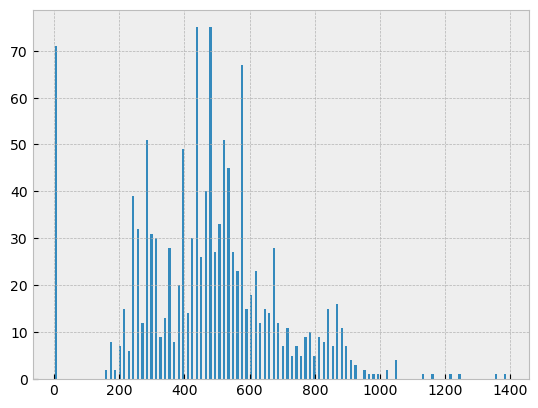

WoodDeckSF


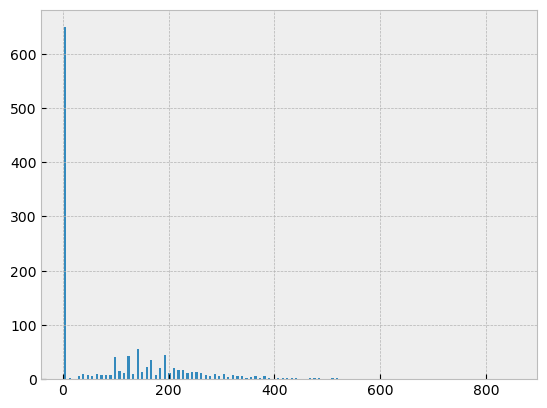

OpenPorchSF


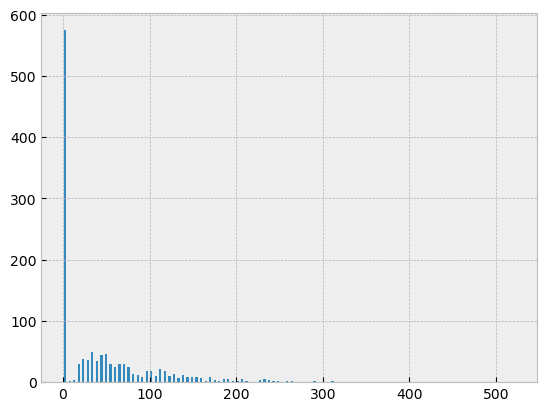

EnclosedPorch


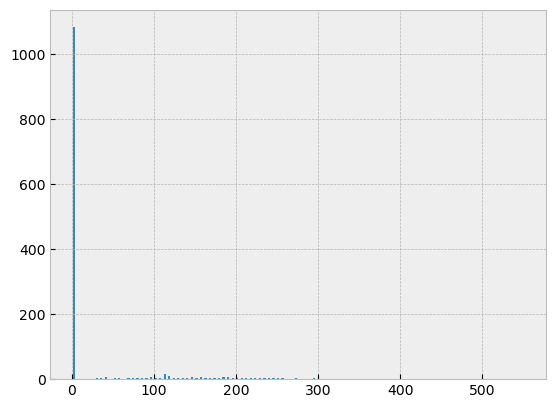

3SsnPorch


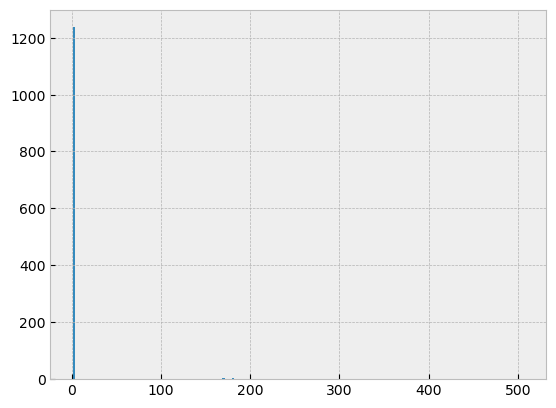

ScreenPorch


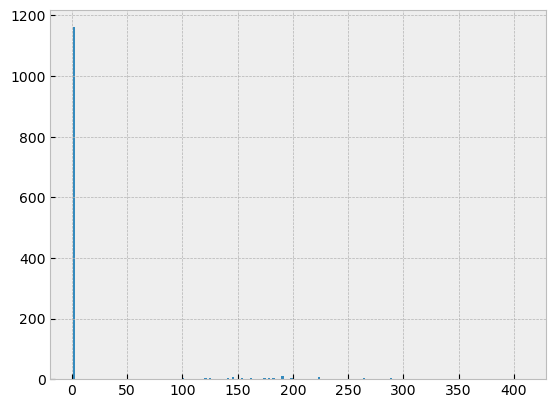

PoolArea


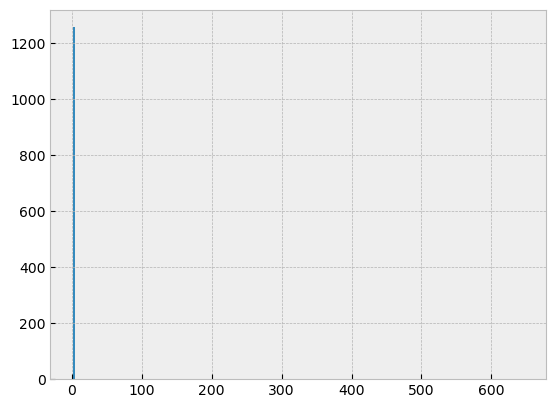

MiscVal


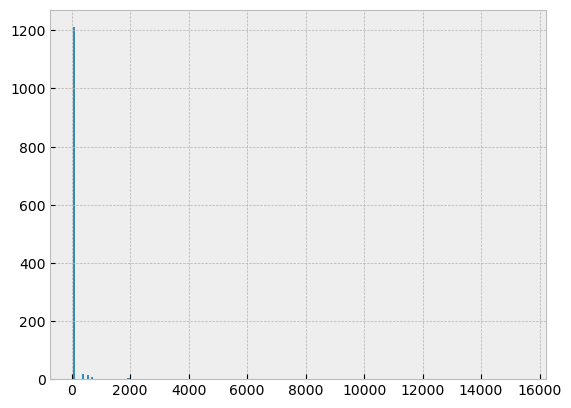

MoSold


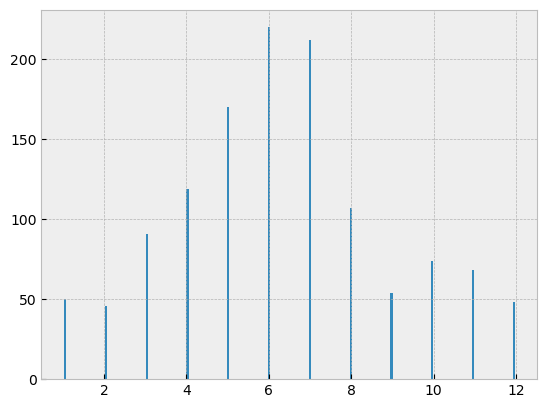

YrSold


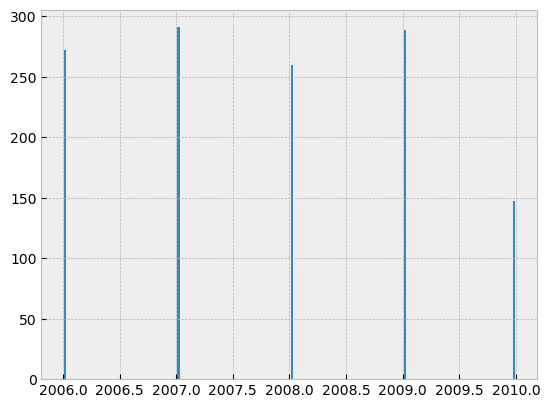

SalePrice


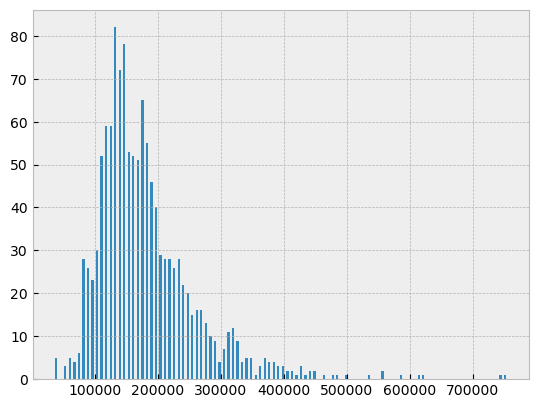

In [11]:
for col in df.select_dtypes('int'):
    print(col)
    plt.figure()
    df[col].hist(bins=100,rwidth = 0.5)
    plt.show()

##### Conclusions  : 
    
- From previouse cell i observed that most houses are in range beween 100,000 and 250,000 .
- from the previous plots i realised that most of the houses where sold in the summer months 6 and 7 .
- Feature Scaling imporant ! 

LotFrontage


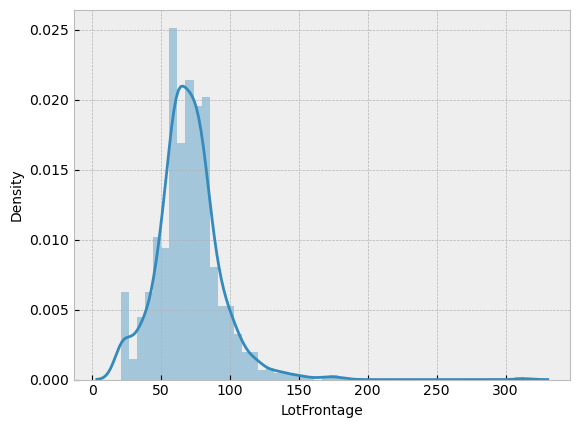

MasVnrArea


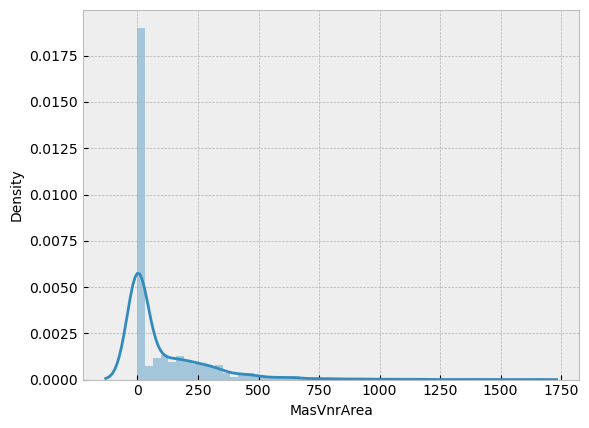

GarageYrBlt


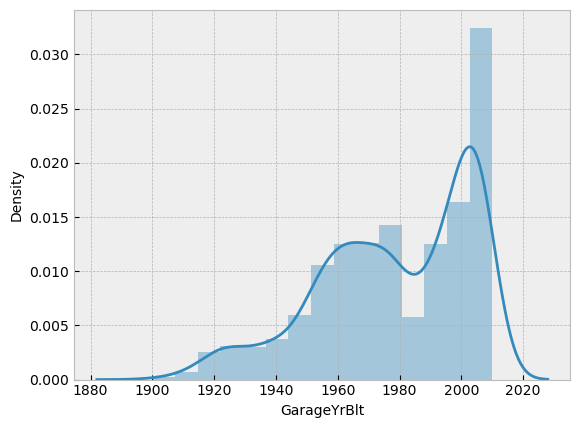

In [12]:
for col in df.select_dtypes('float'):
    print(col)
    plt.figure()
    sns.distplot(df[col])
    plt.show()

##### Conclusions  : 
    
- The two features { MasVnrArea , GarageYrBlt } are skewed one for the right and the other to the left so i decided to fill its missing values using the median
- The feature LotFrontage follow a normal distribution so i decided to fill its missing values using the mean . 

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street-------------------------------------------- ['Pave' 'Grvl']
Alley--------------------------------------------- [nan 'Grvl' 'Pave']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa']
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RR

##### Conclusions : 

- Feature imputation for MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, and GarageCond .

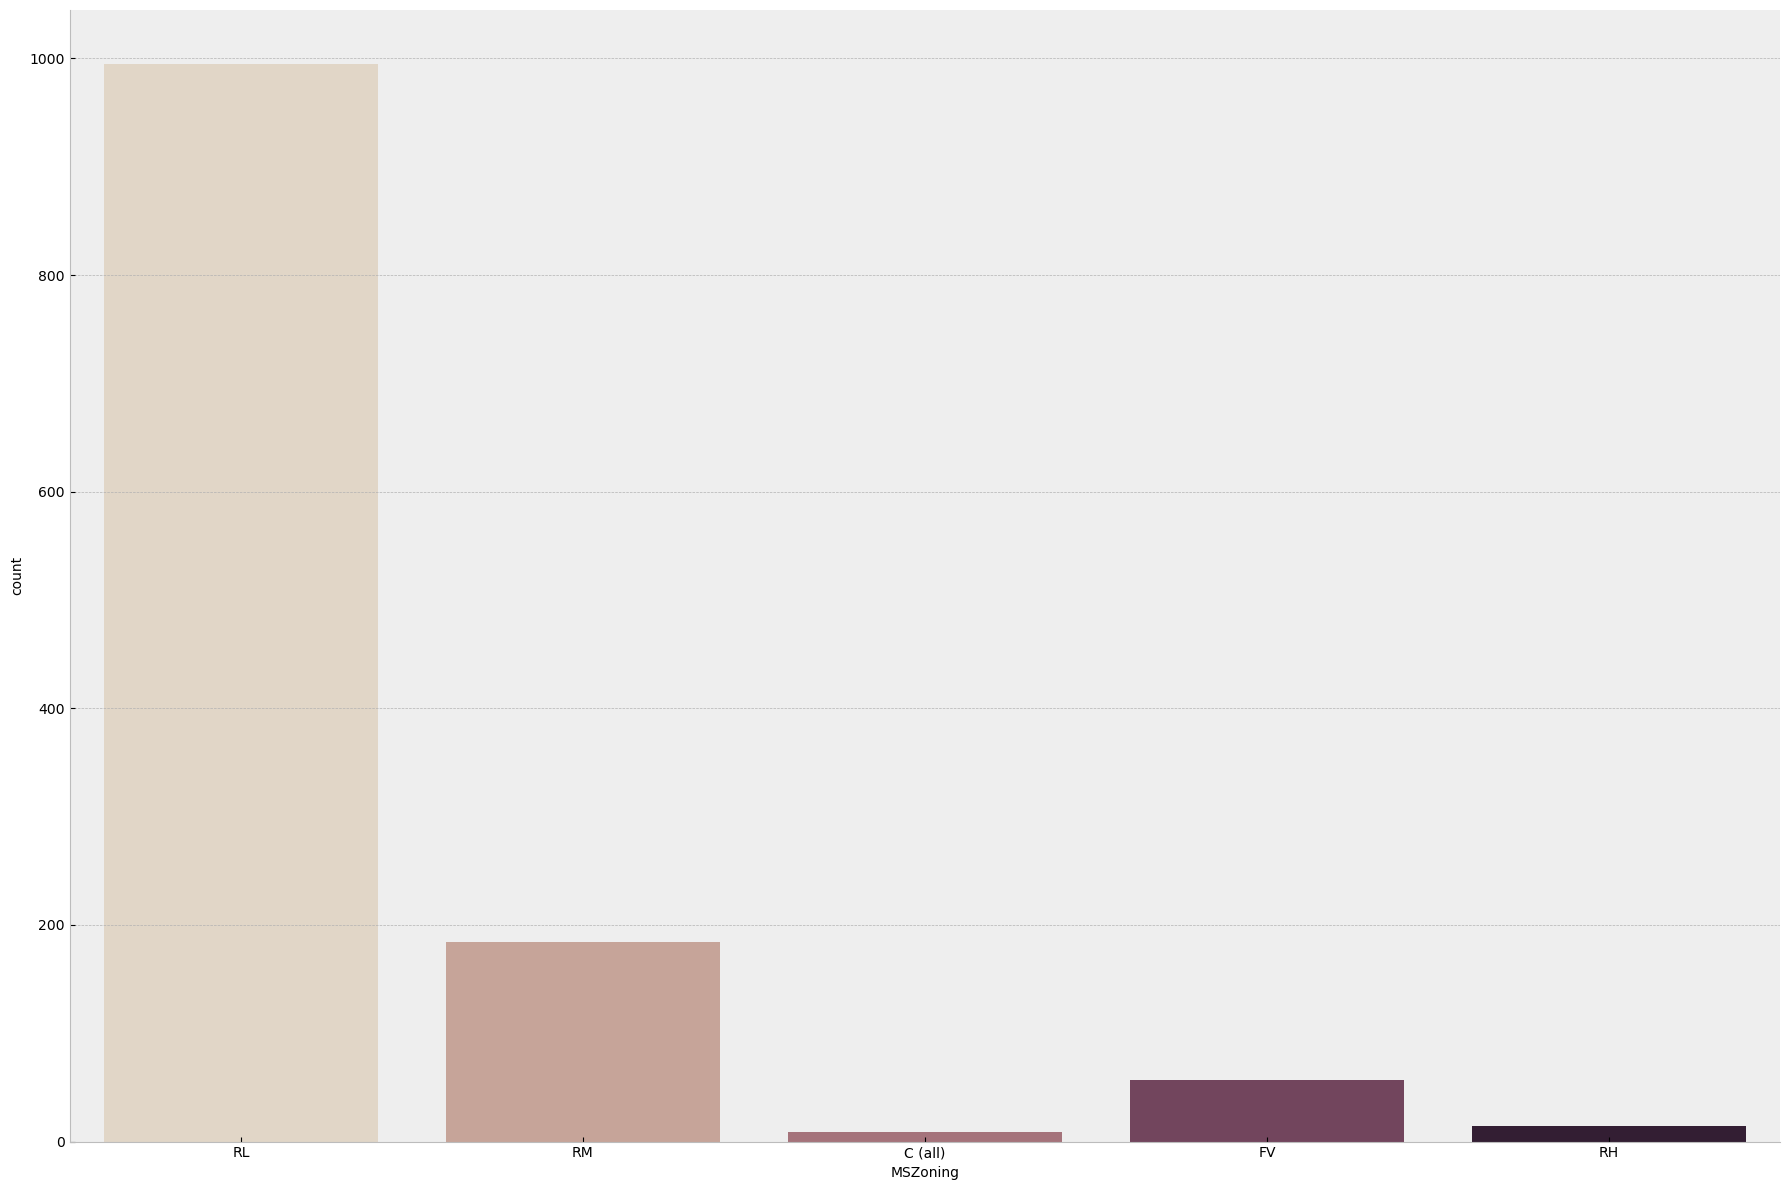

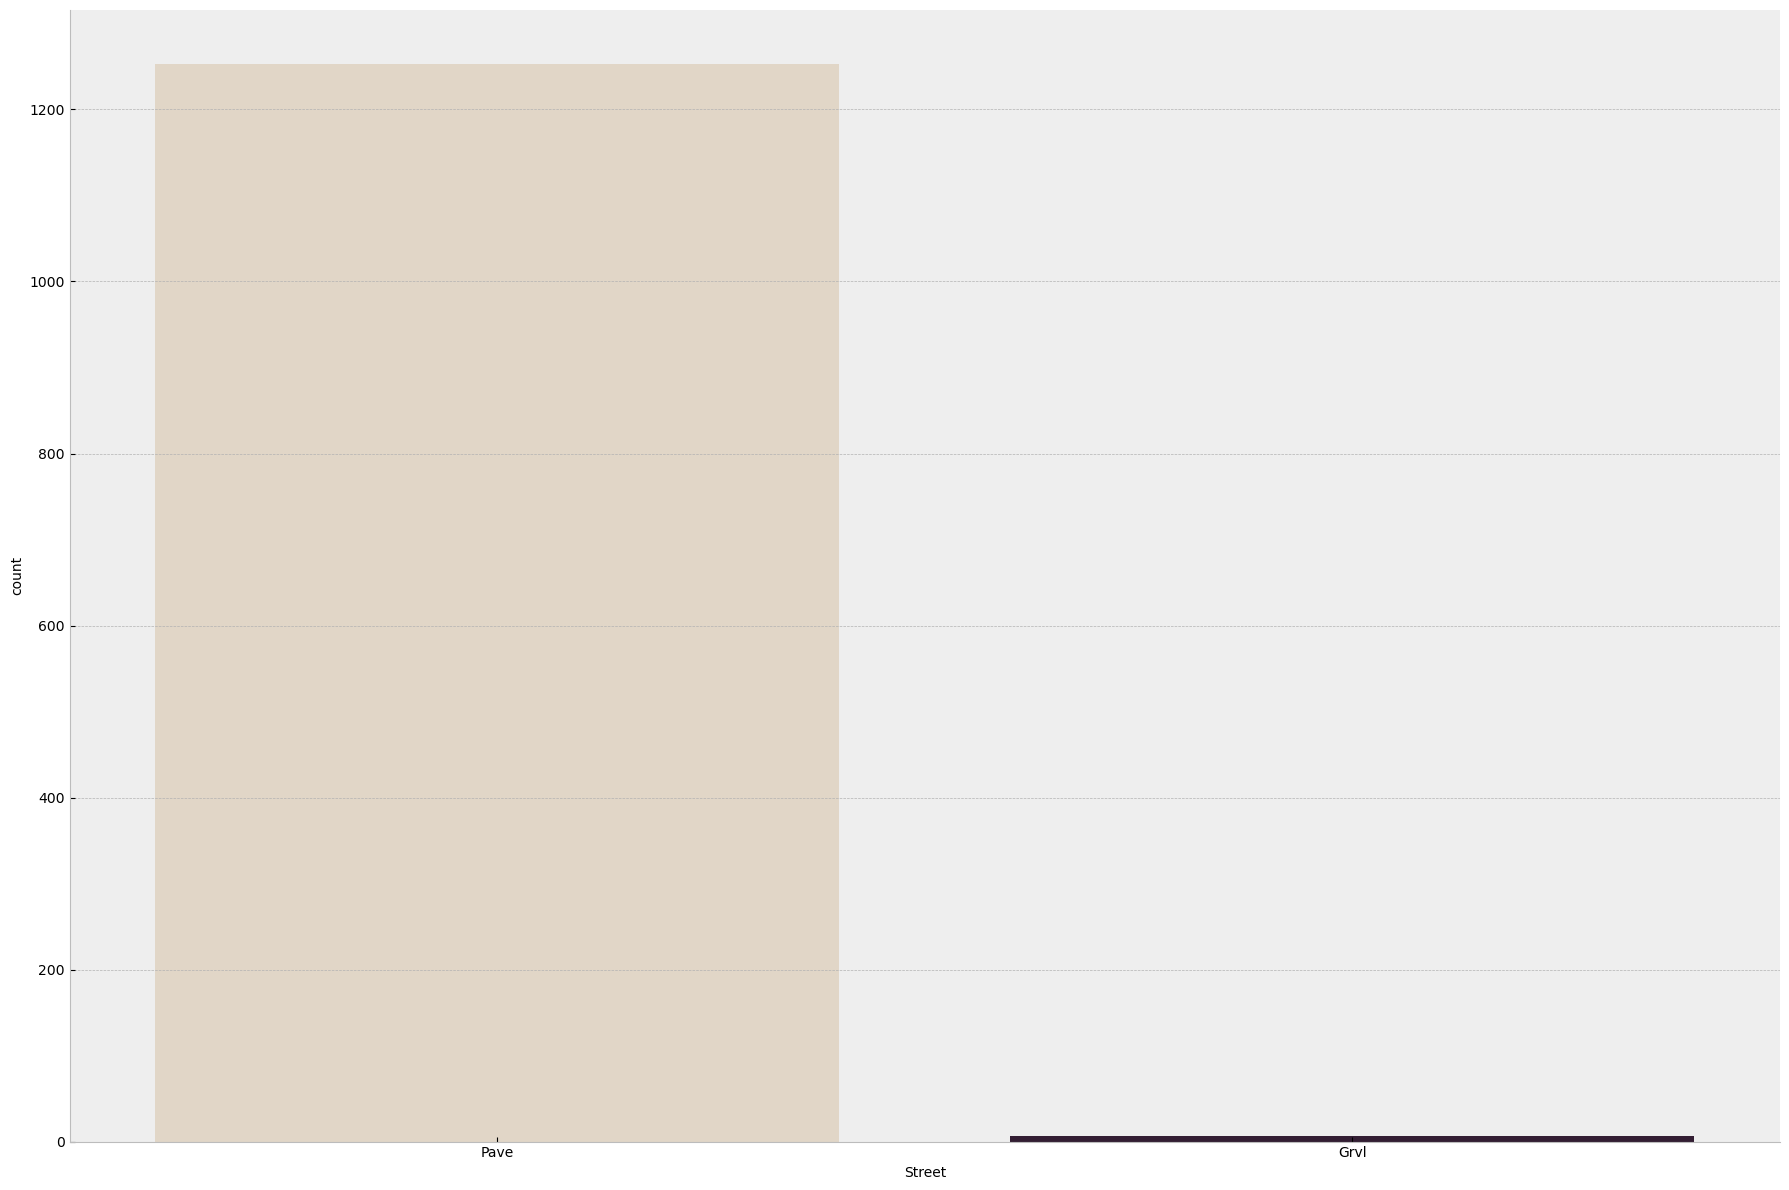

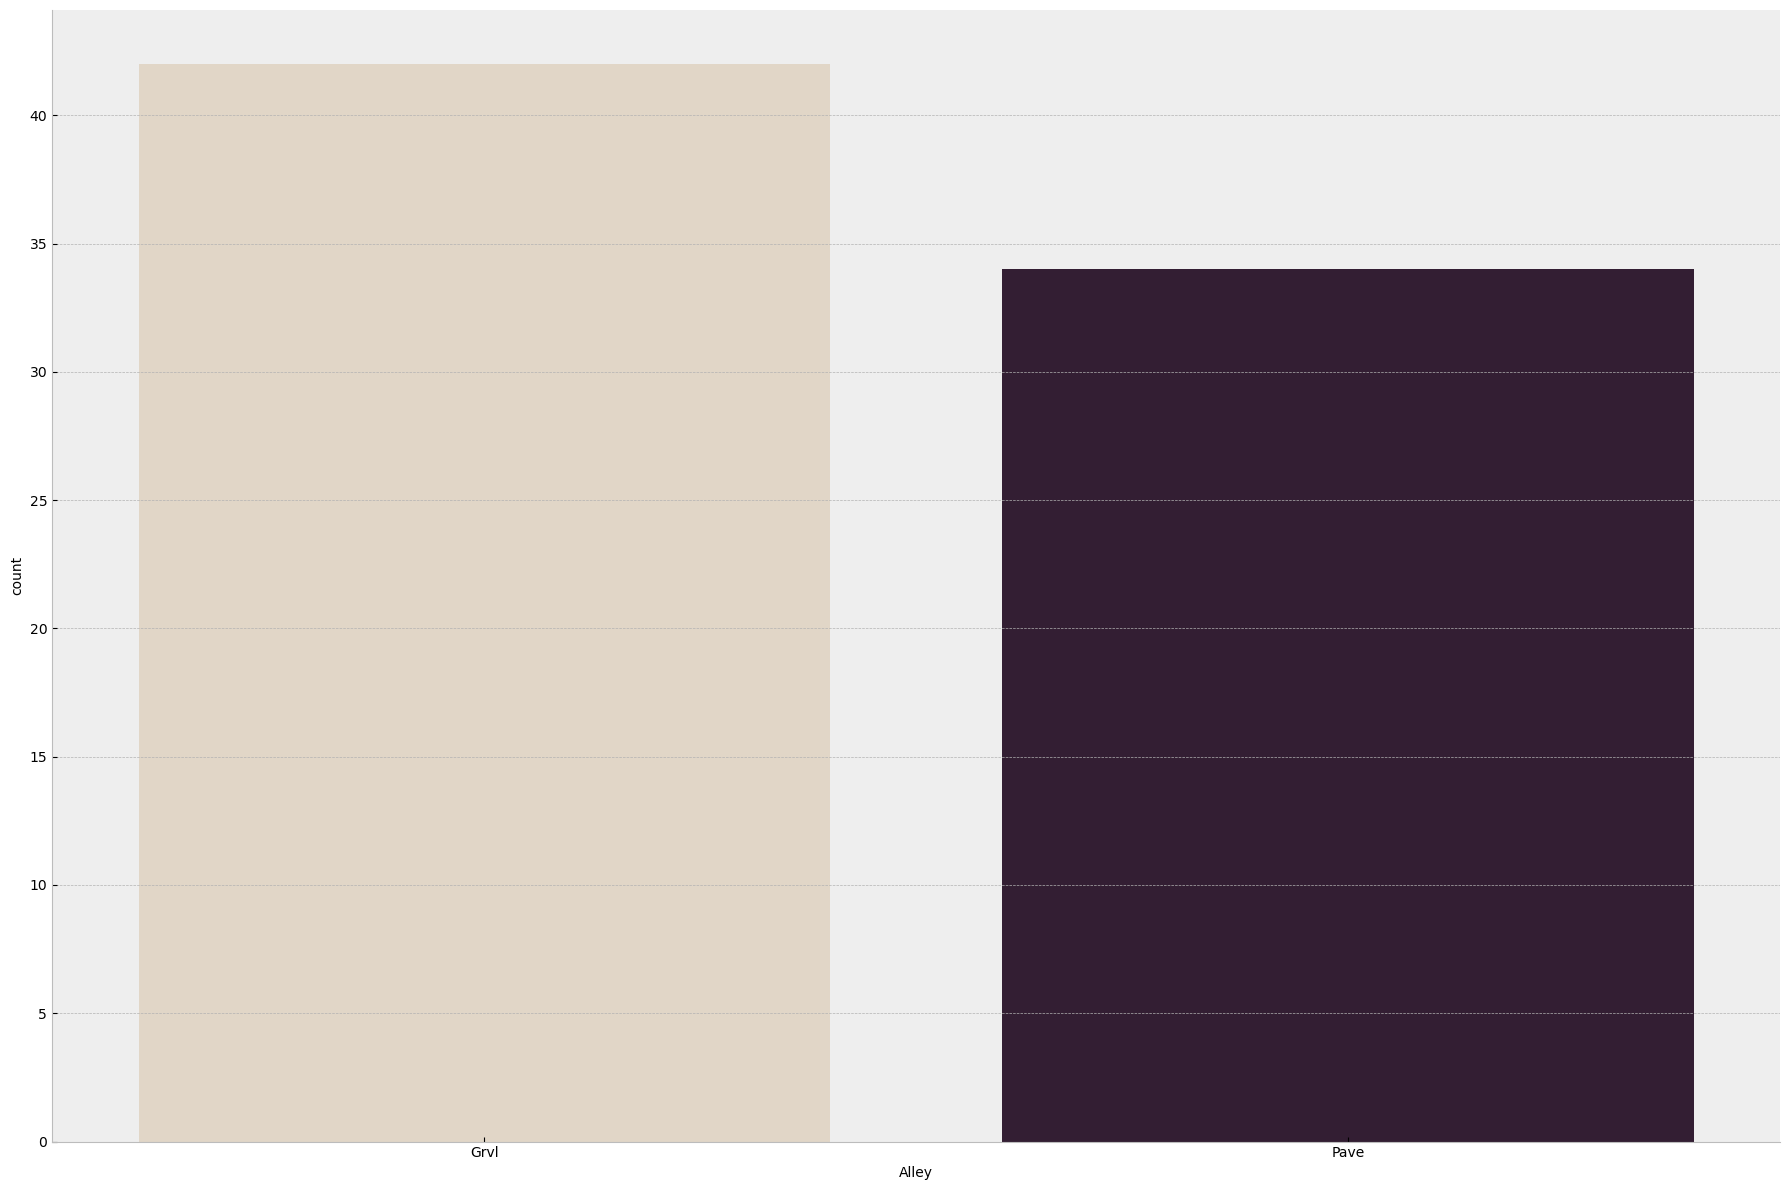

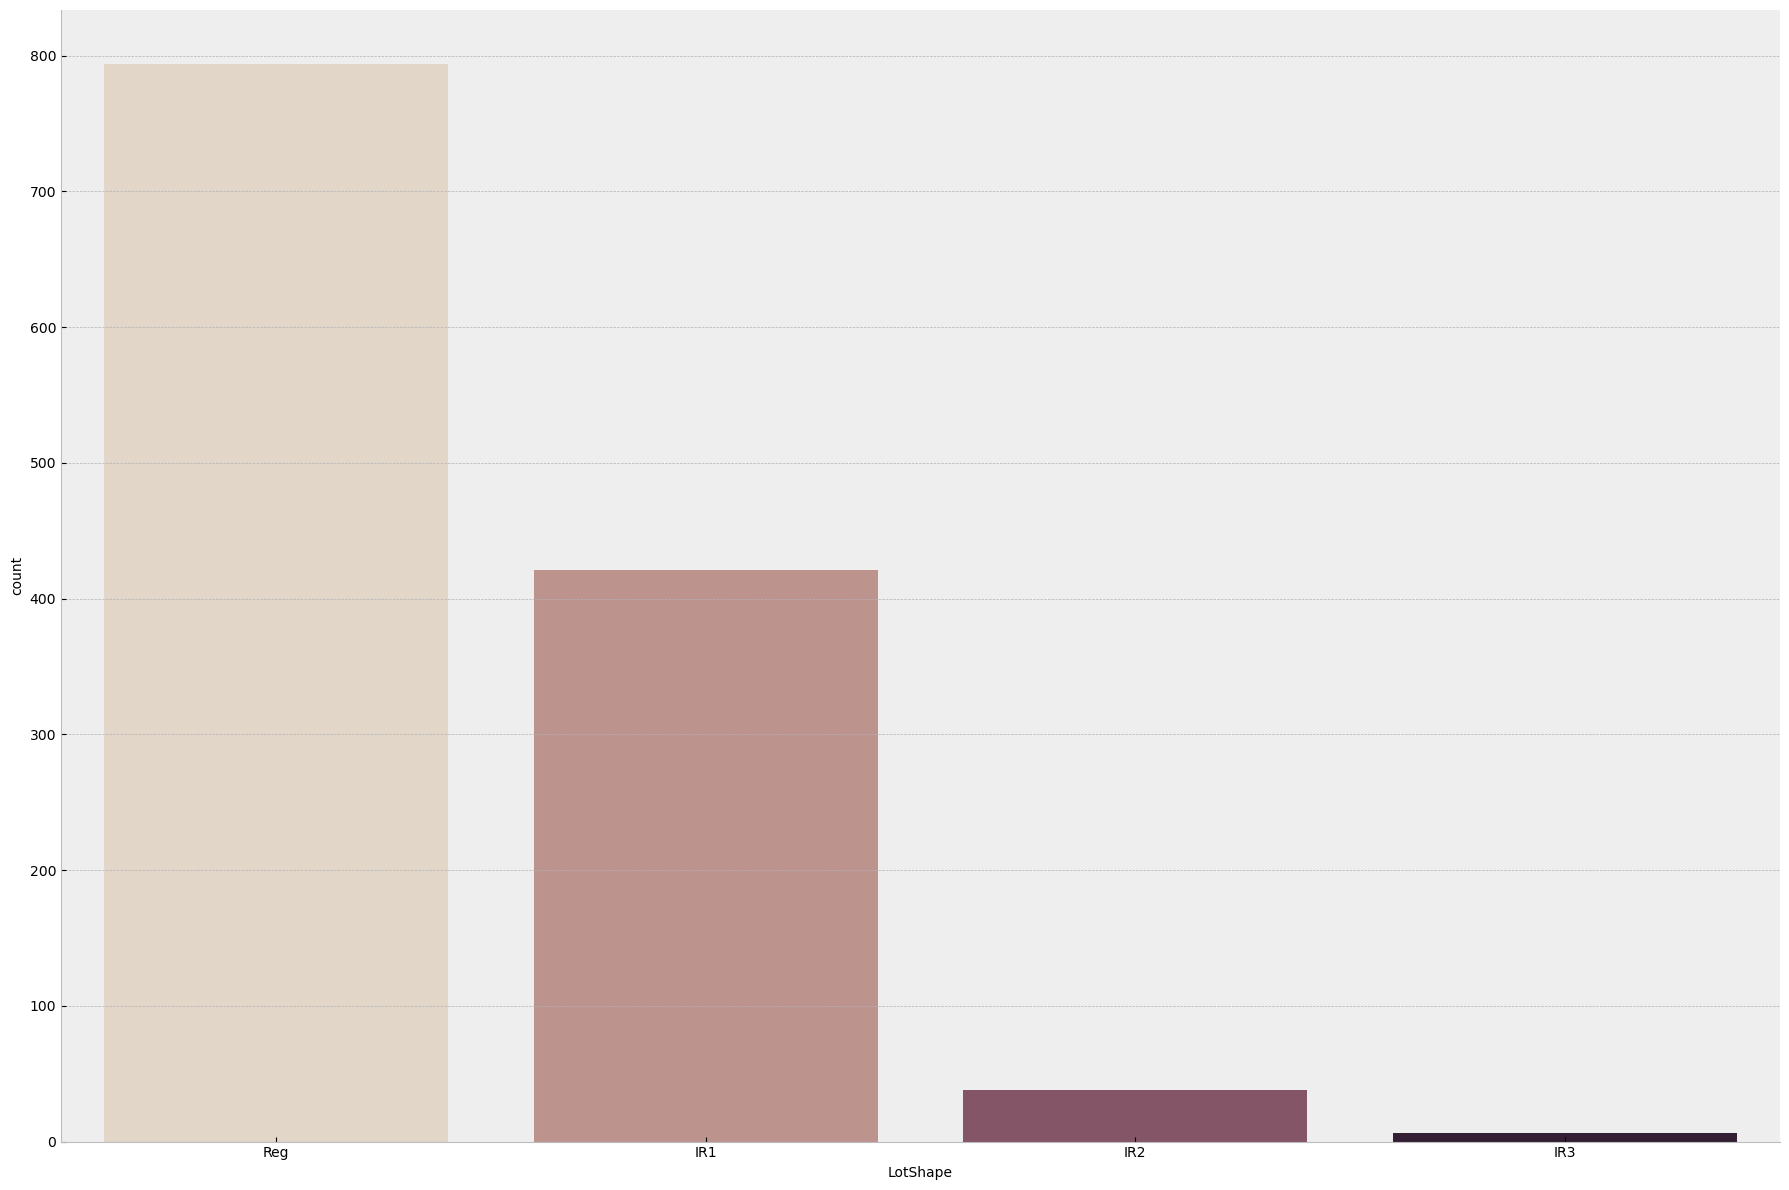

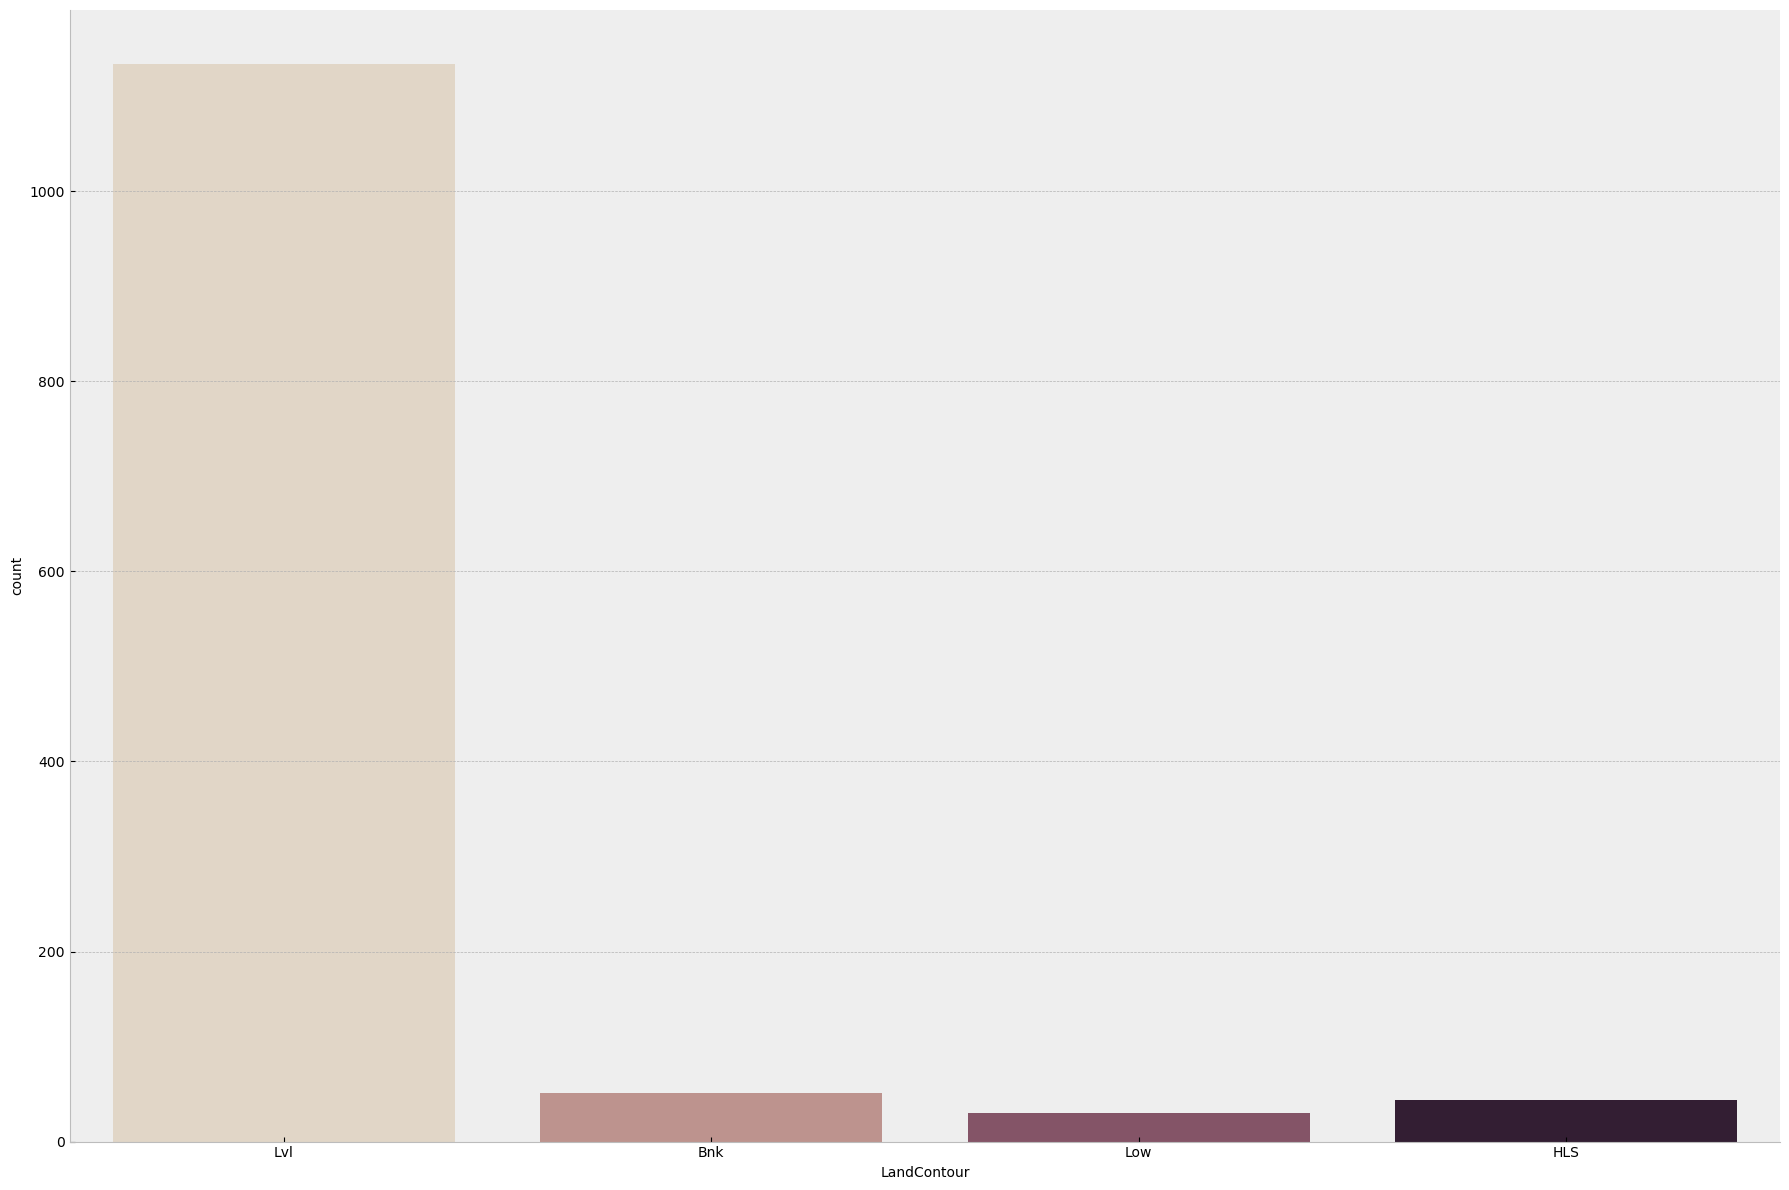

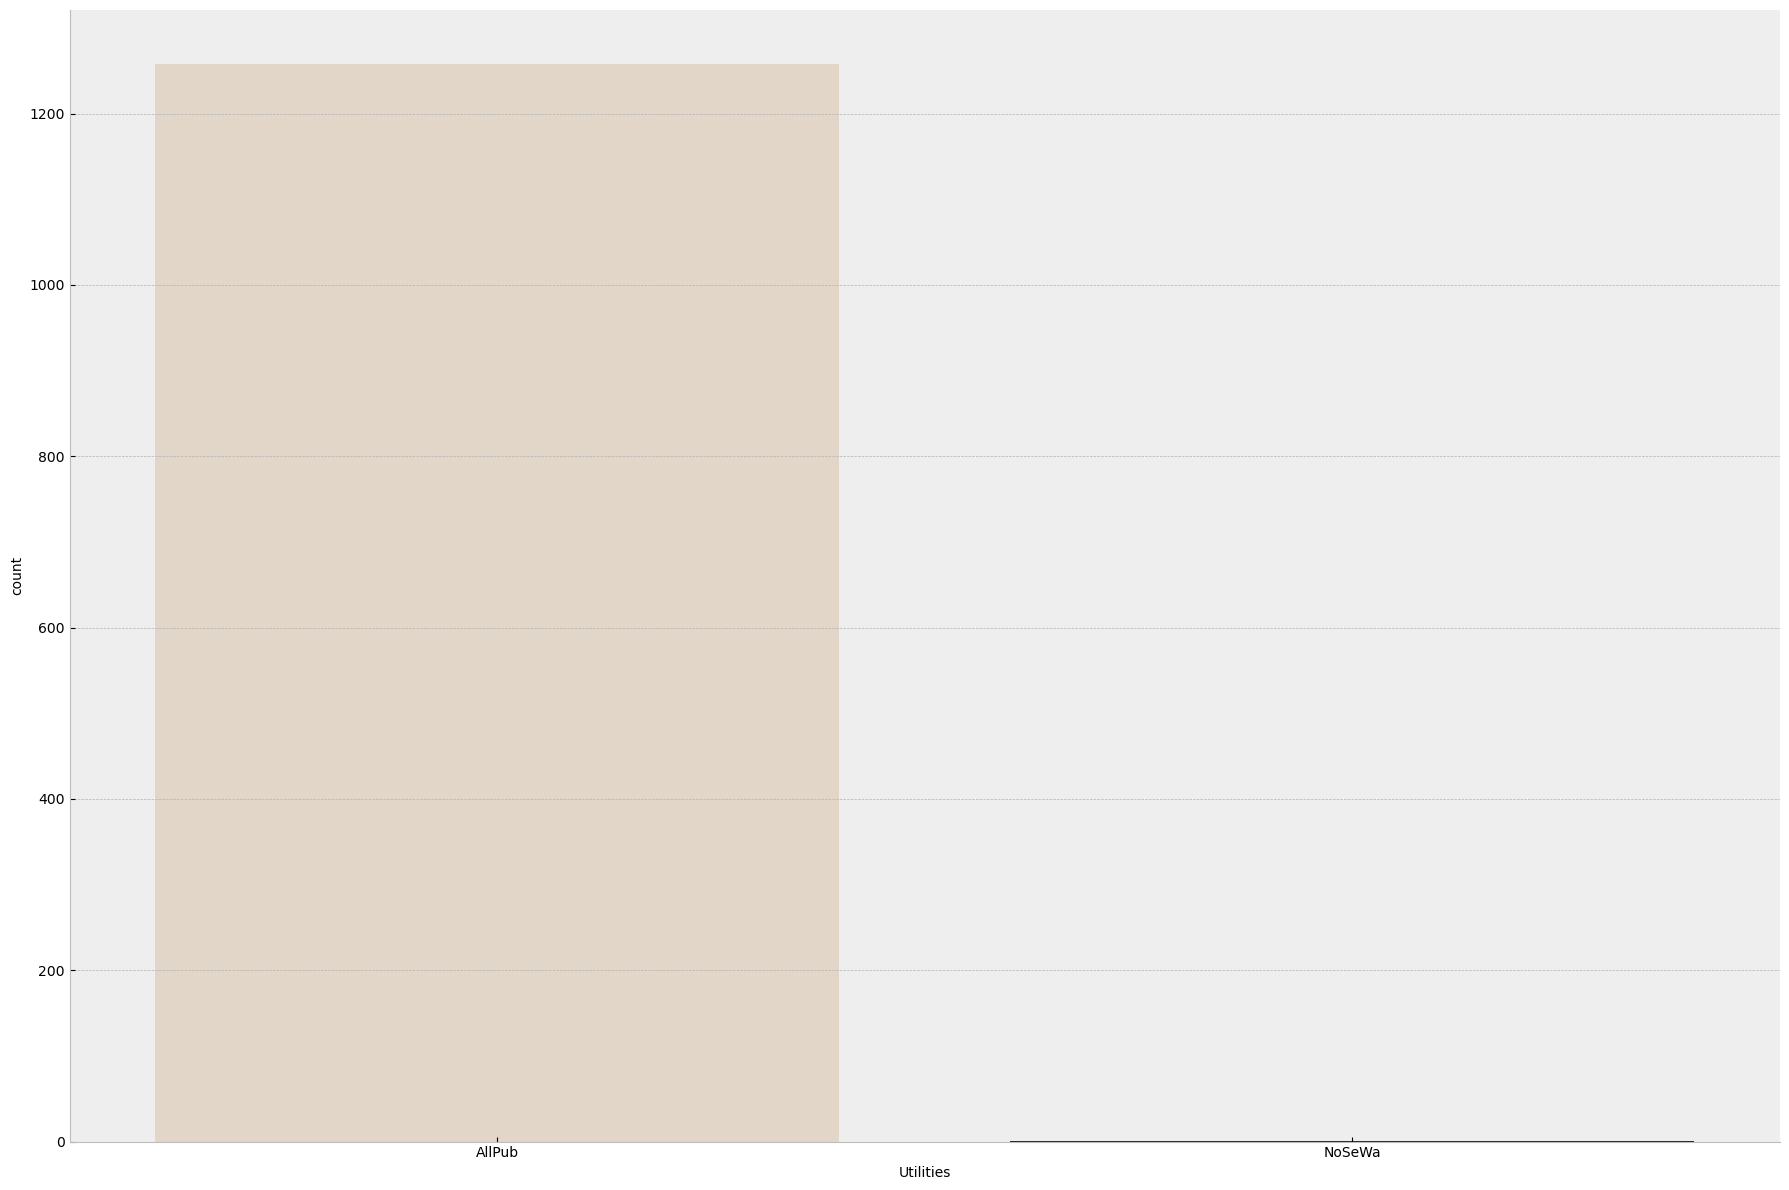

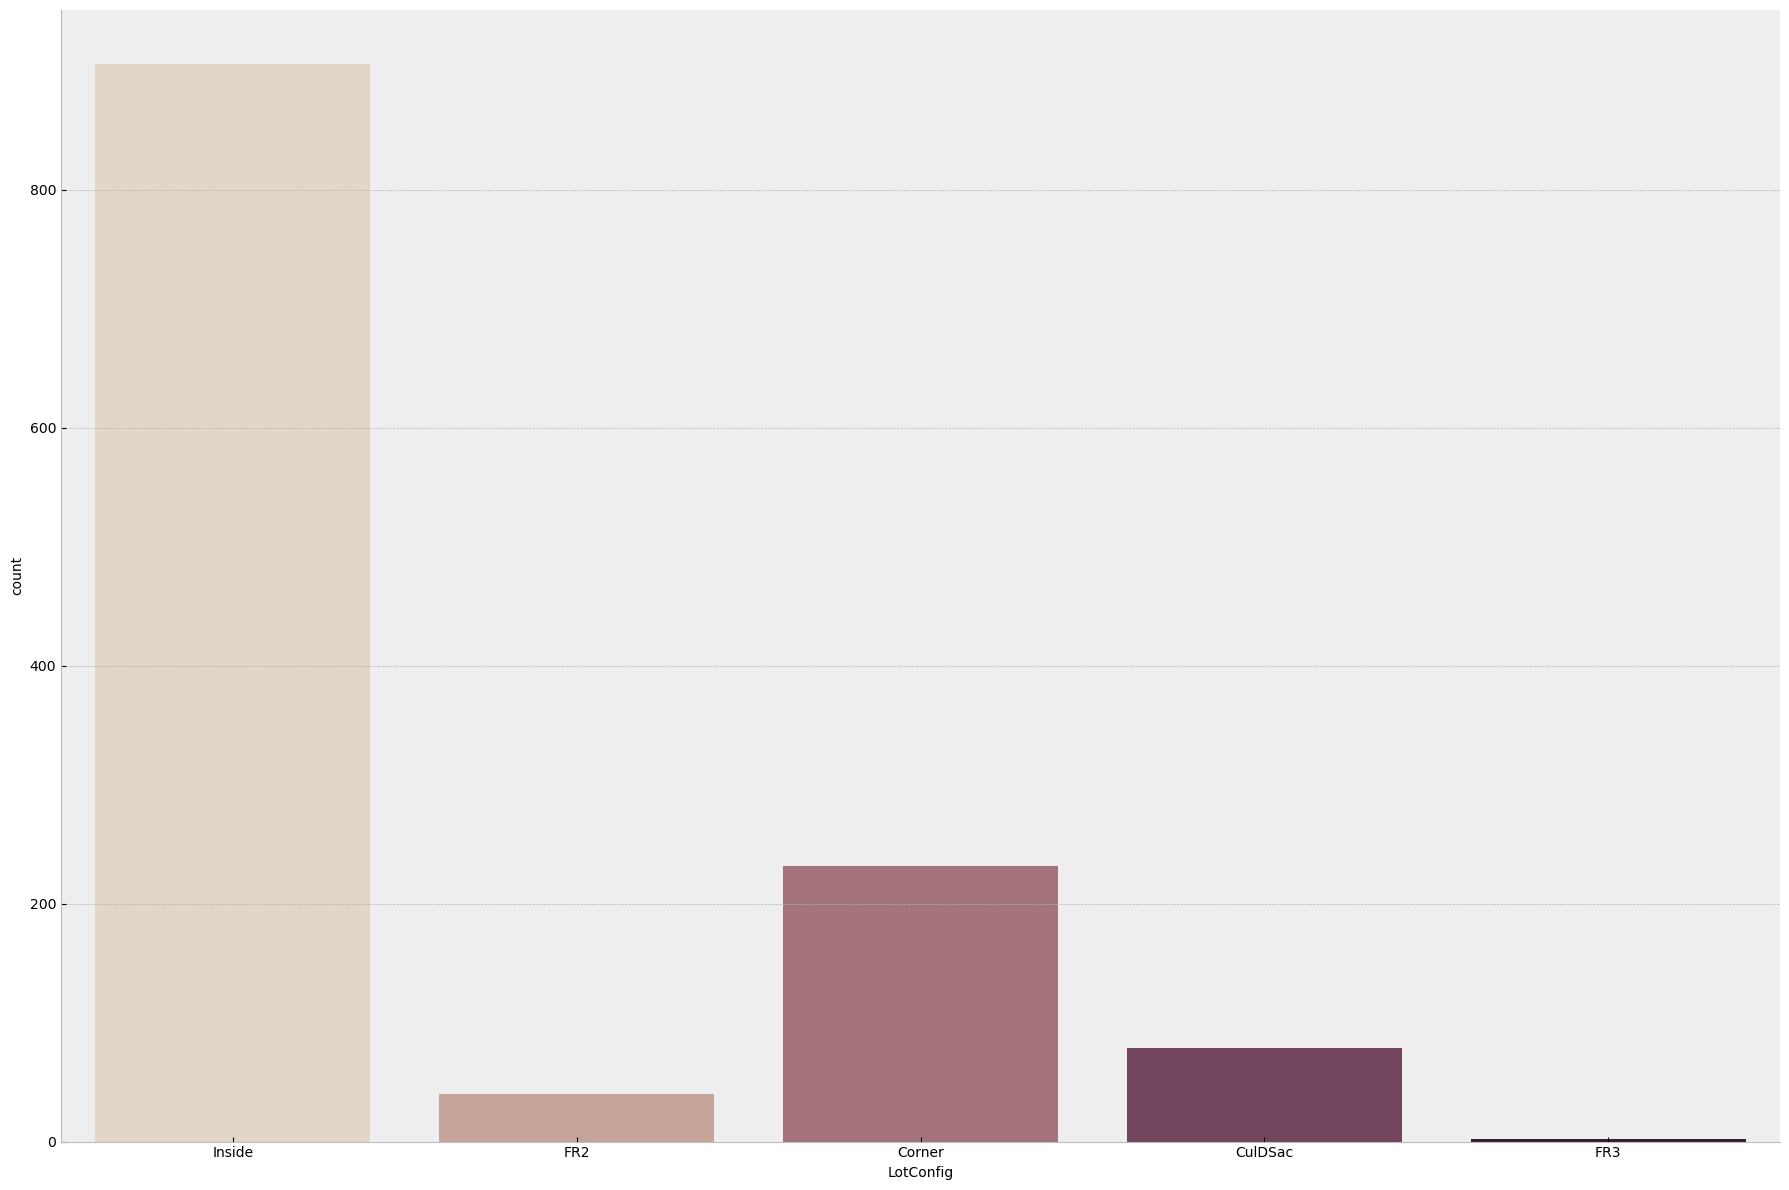

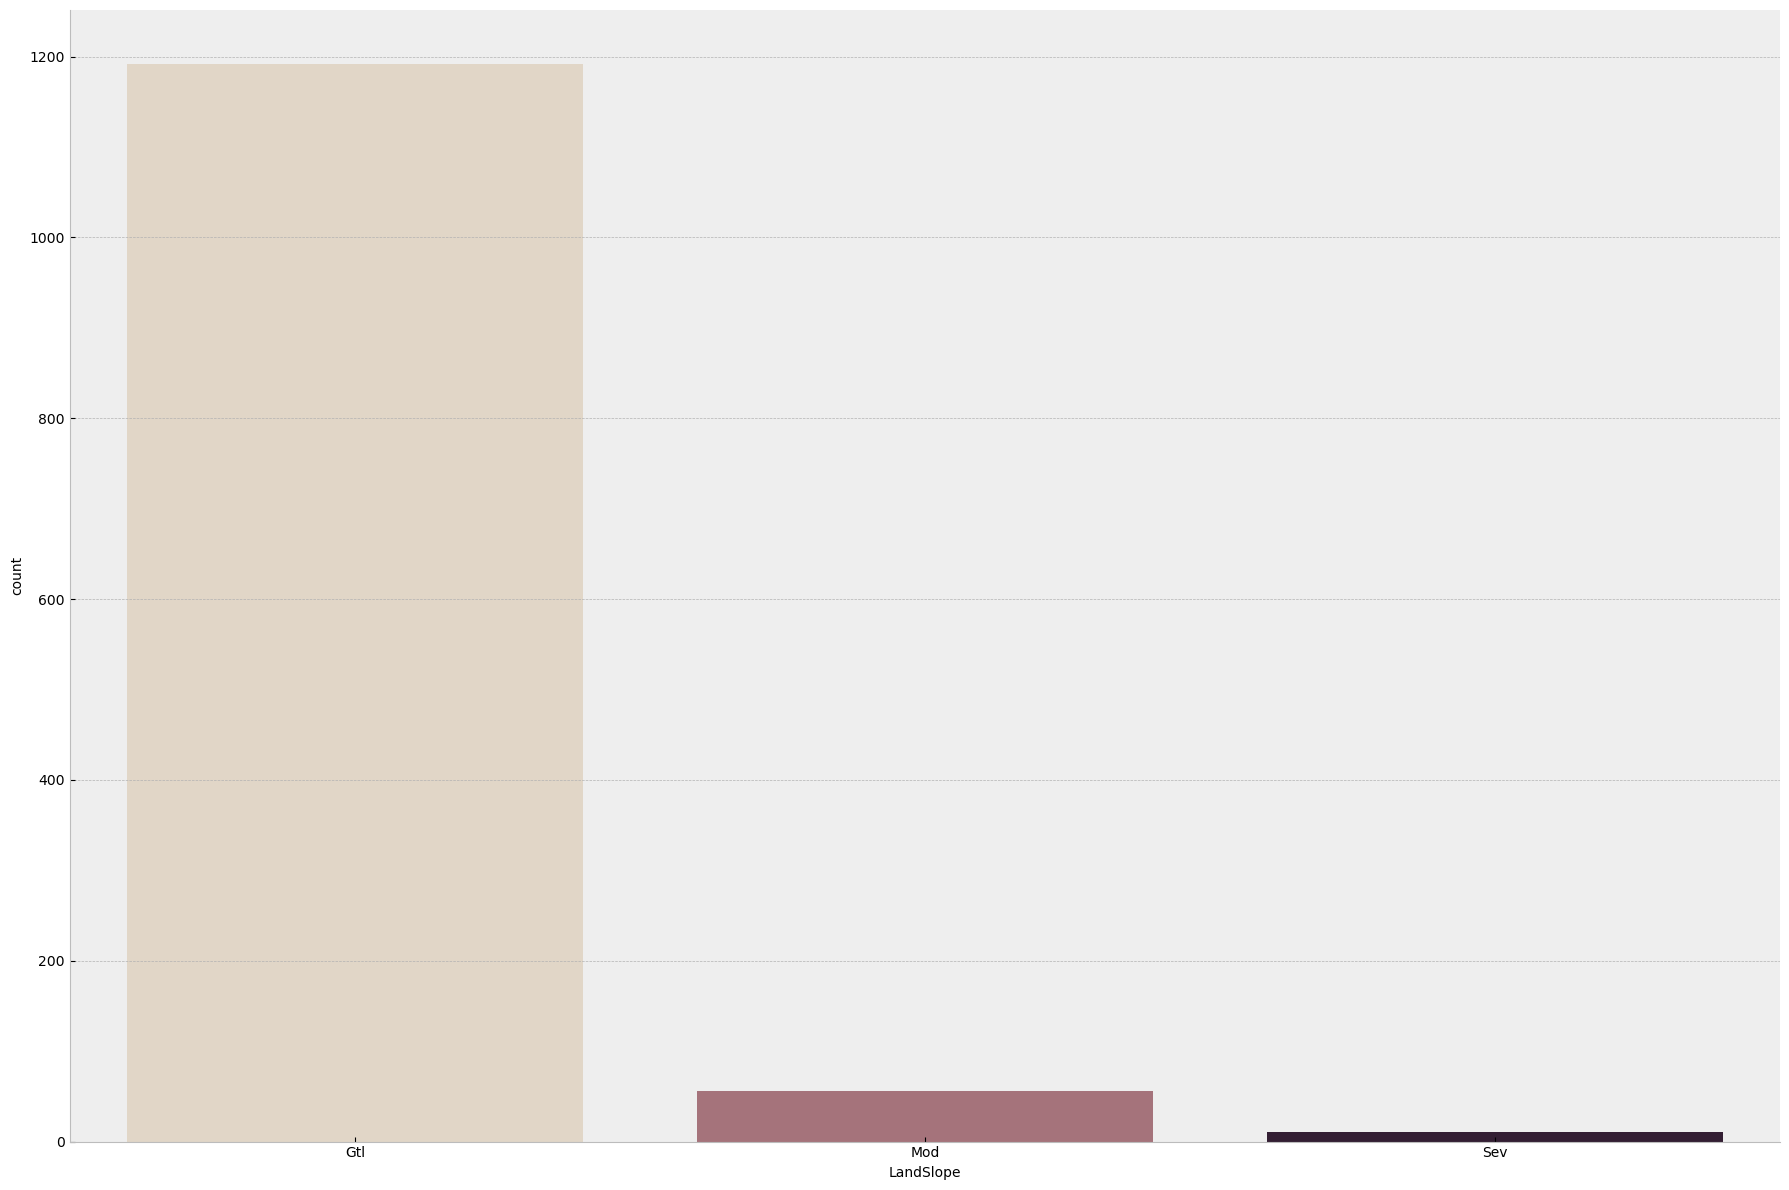

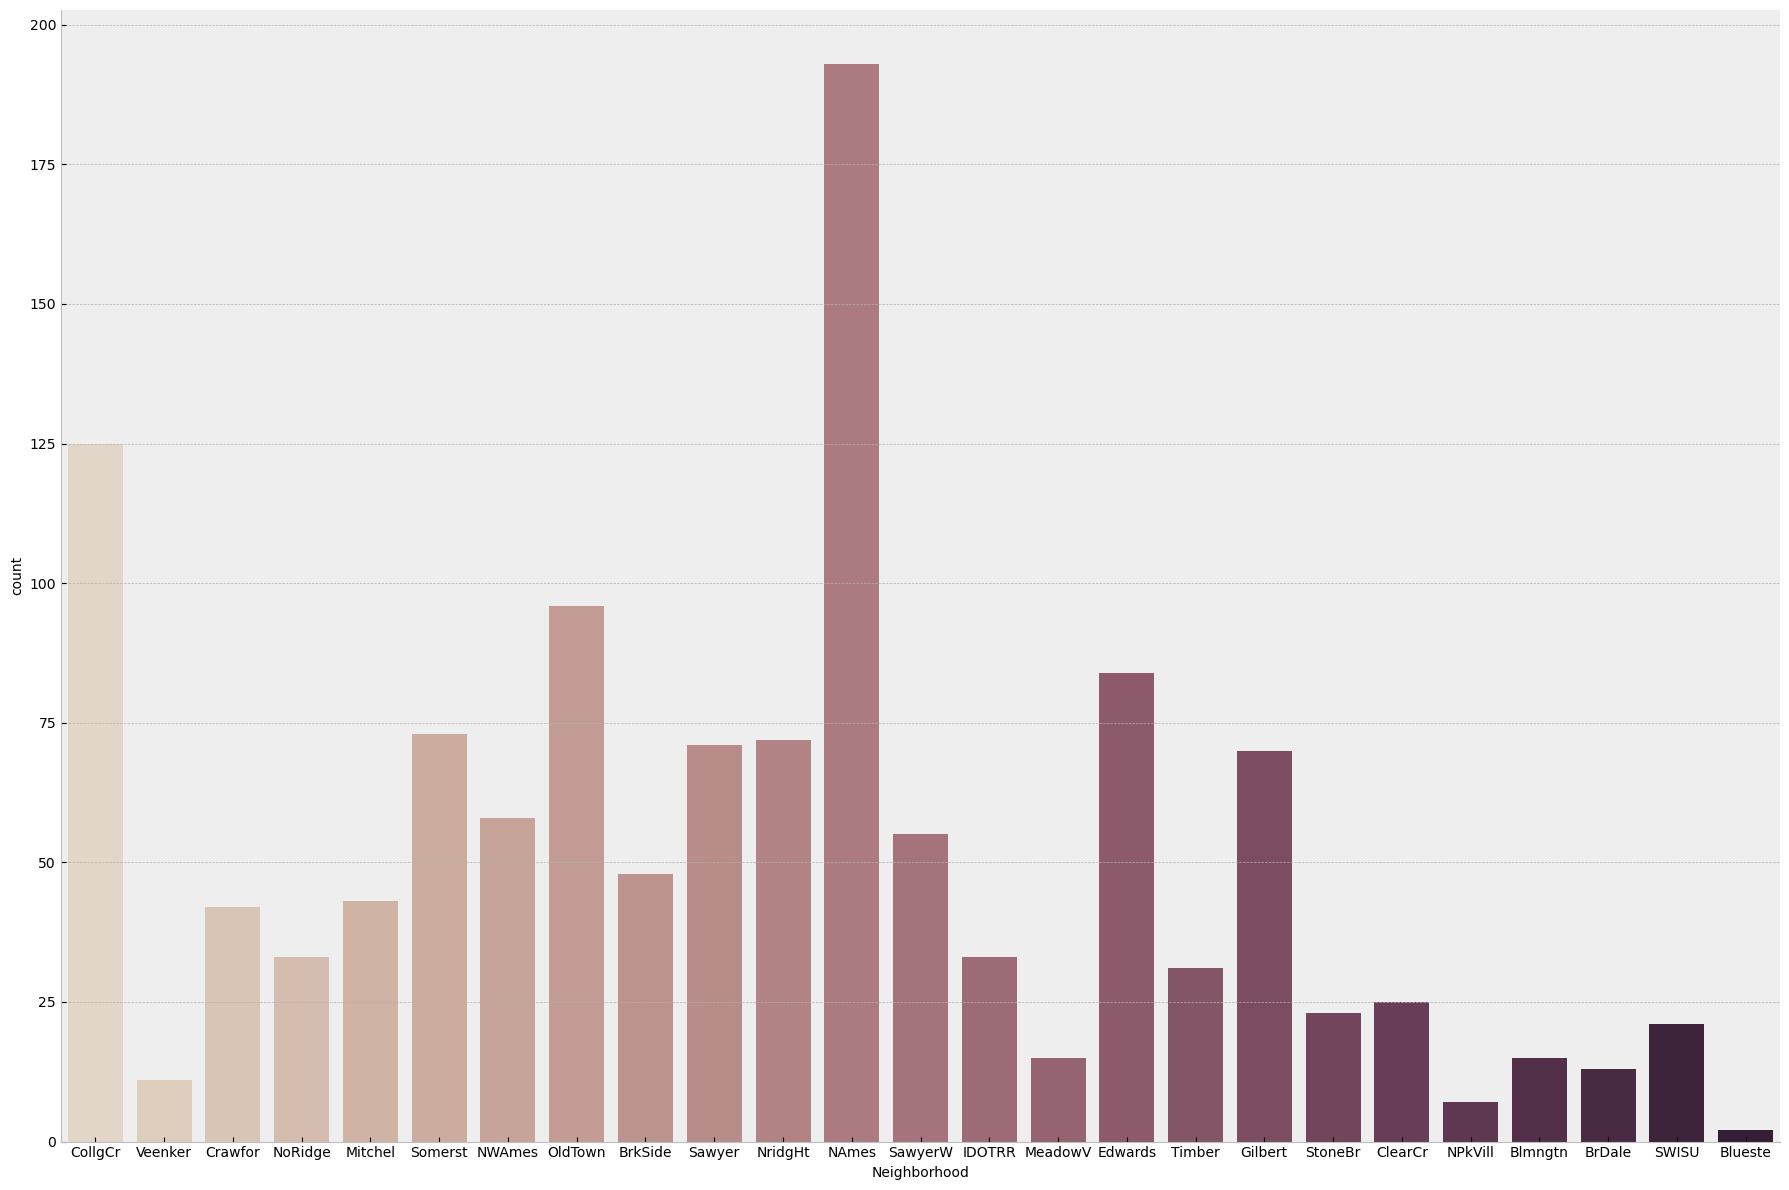

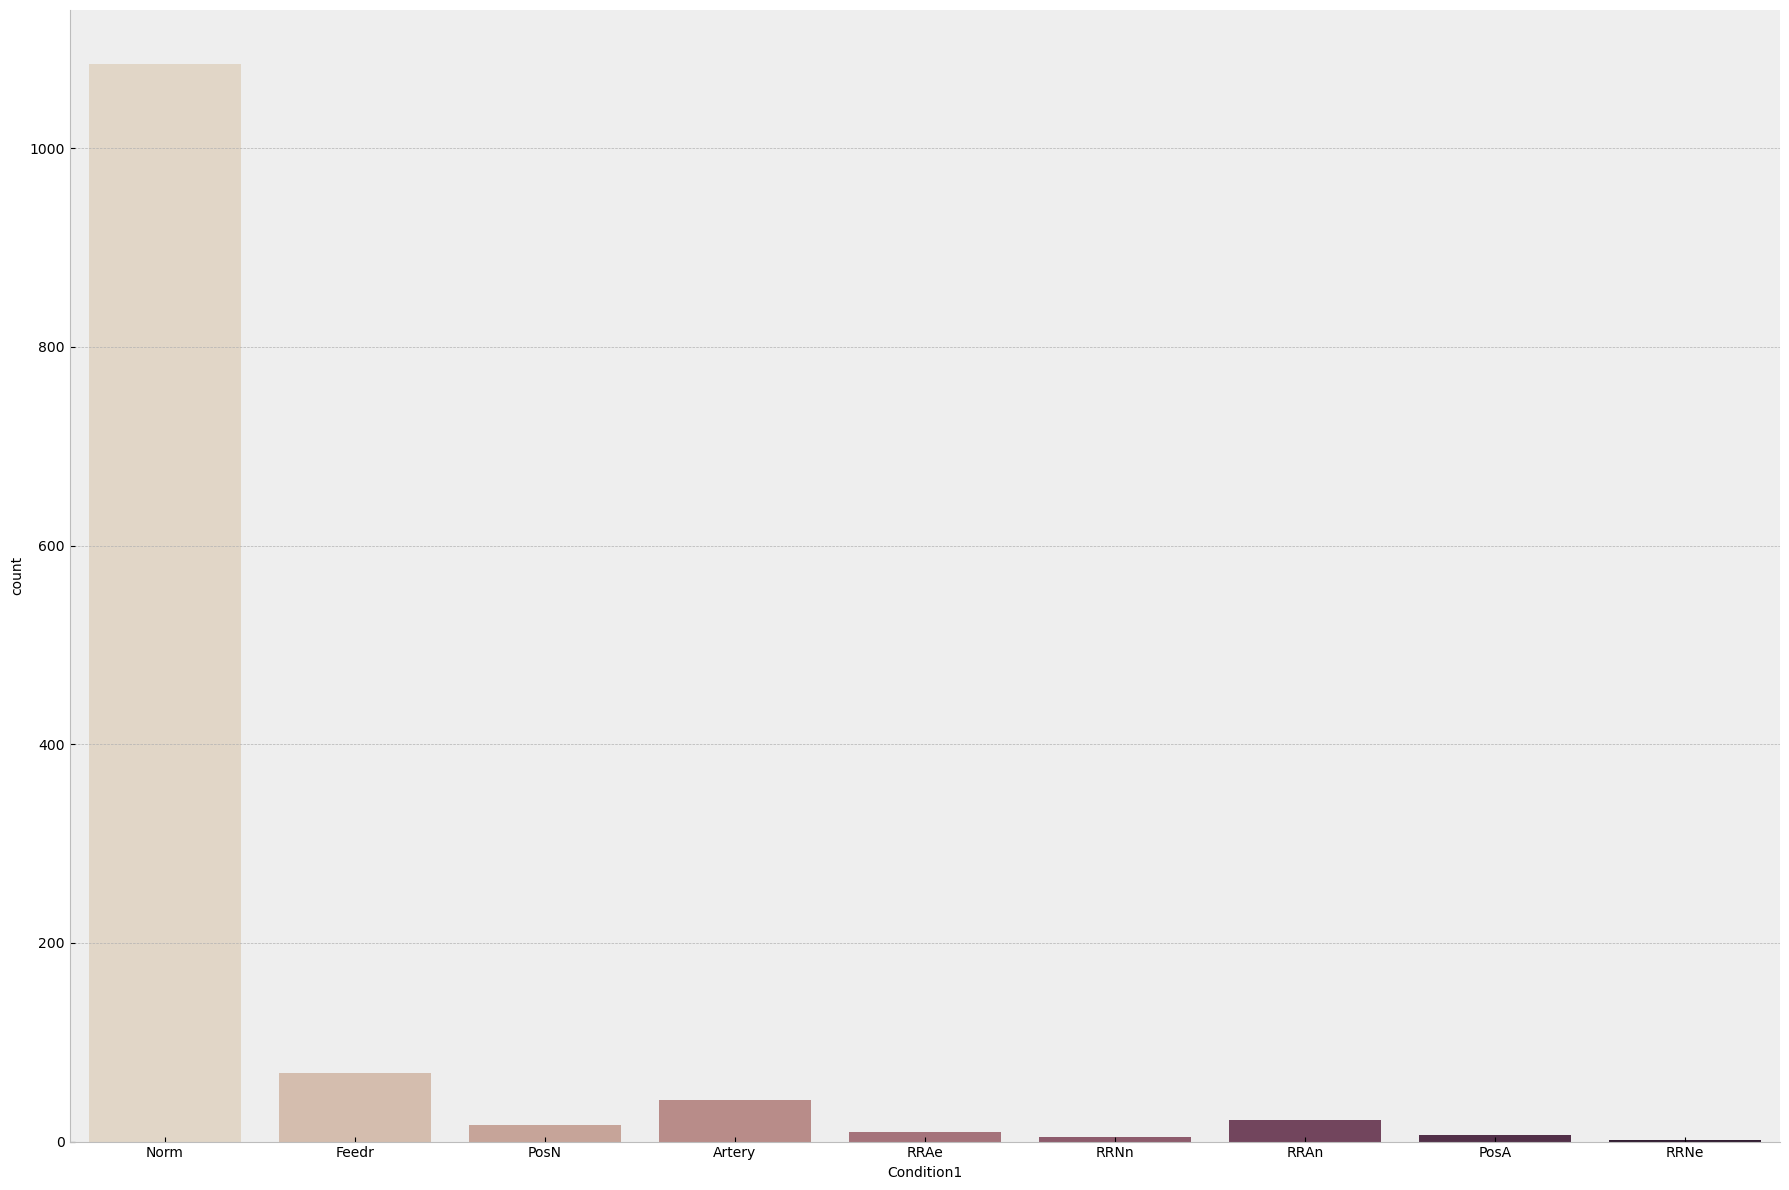

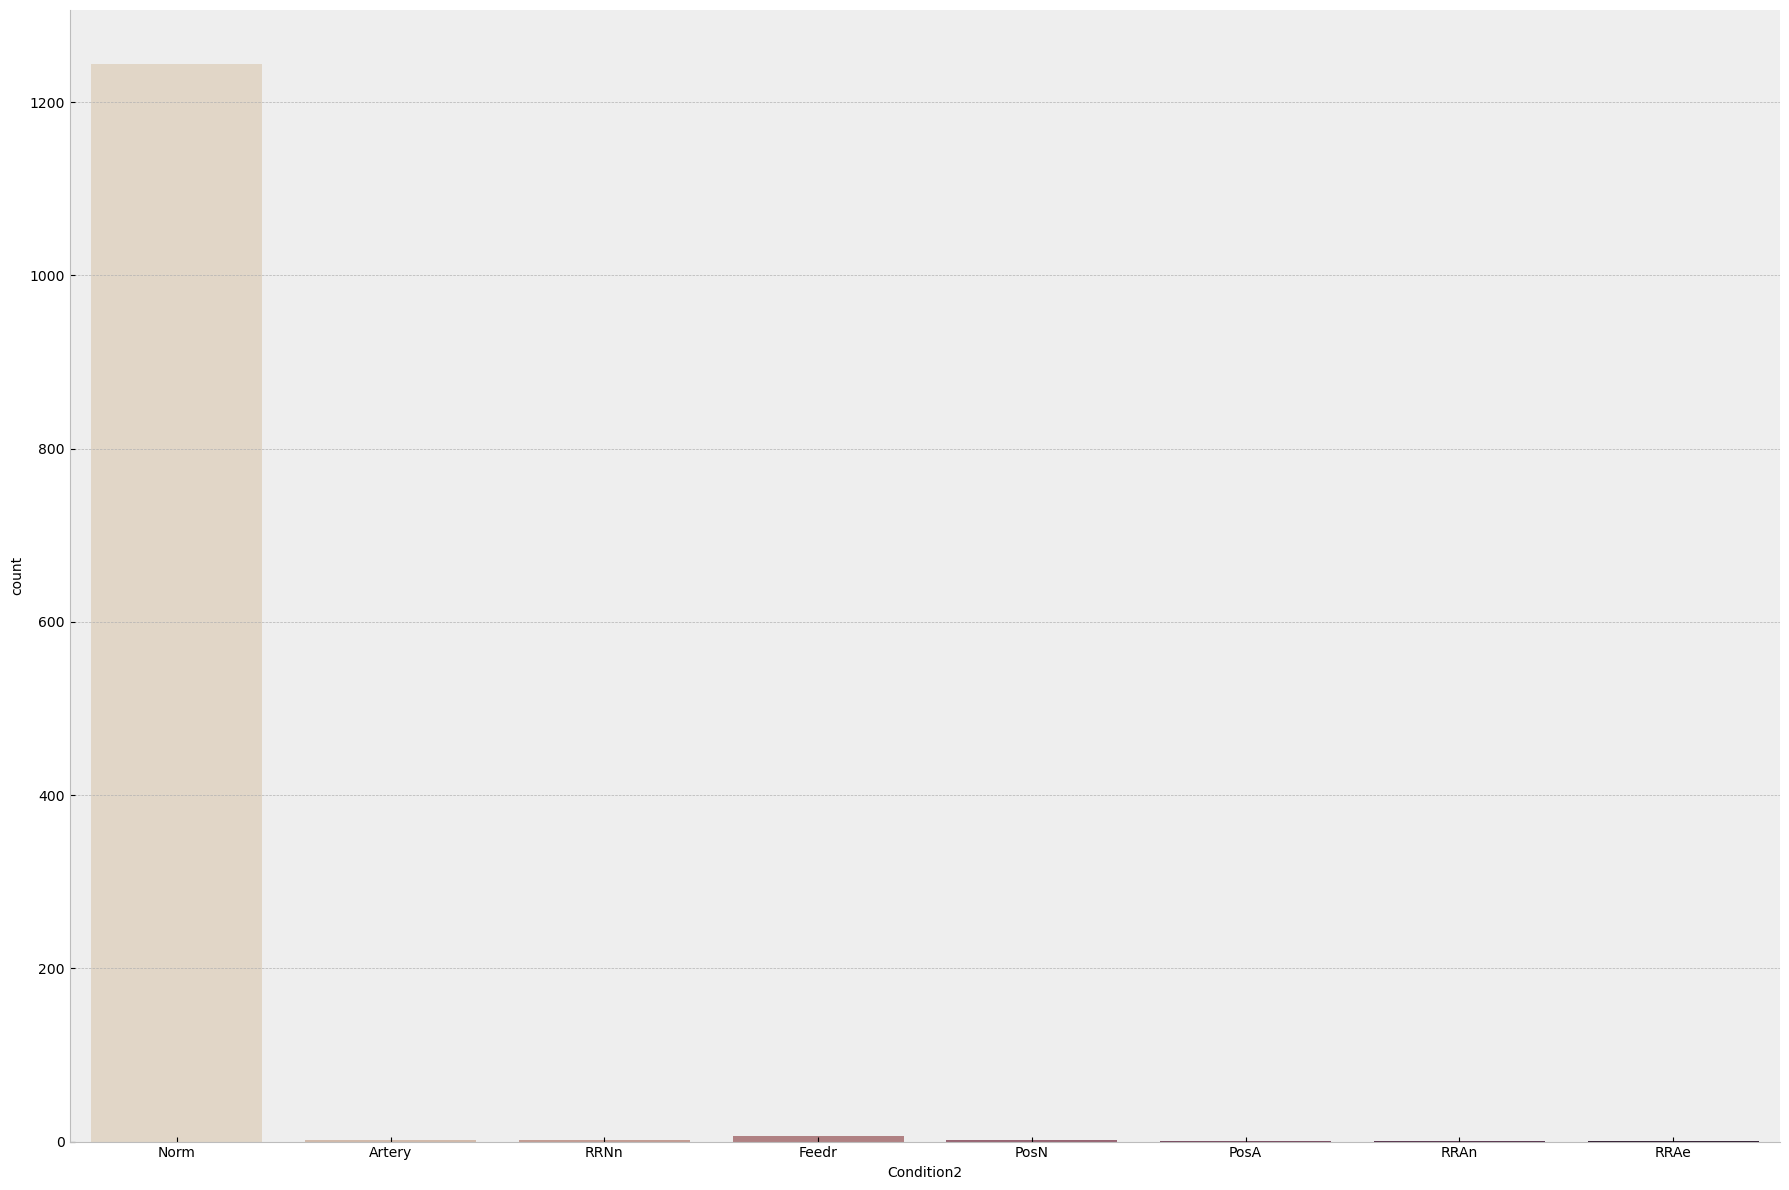

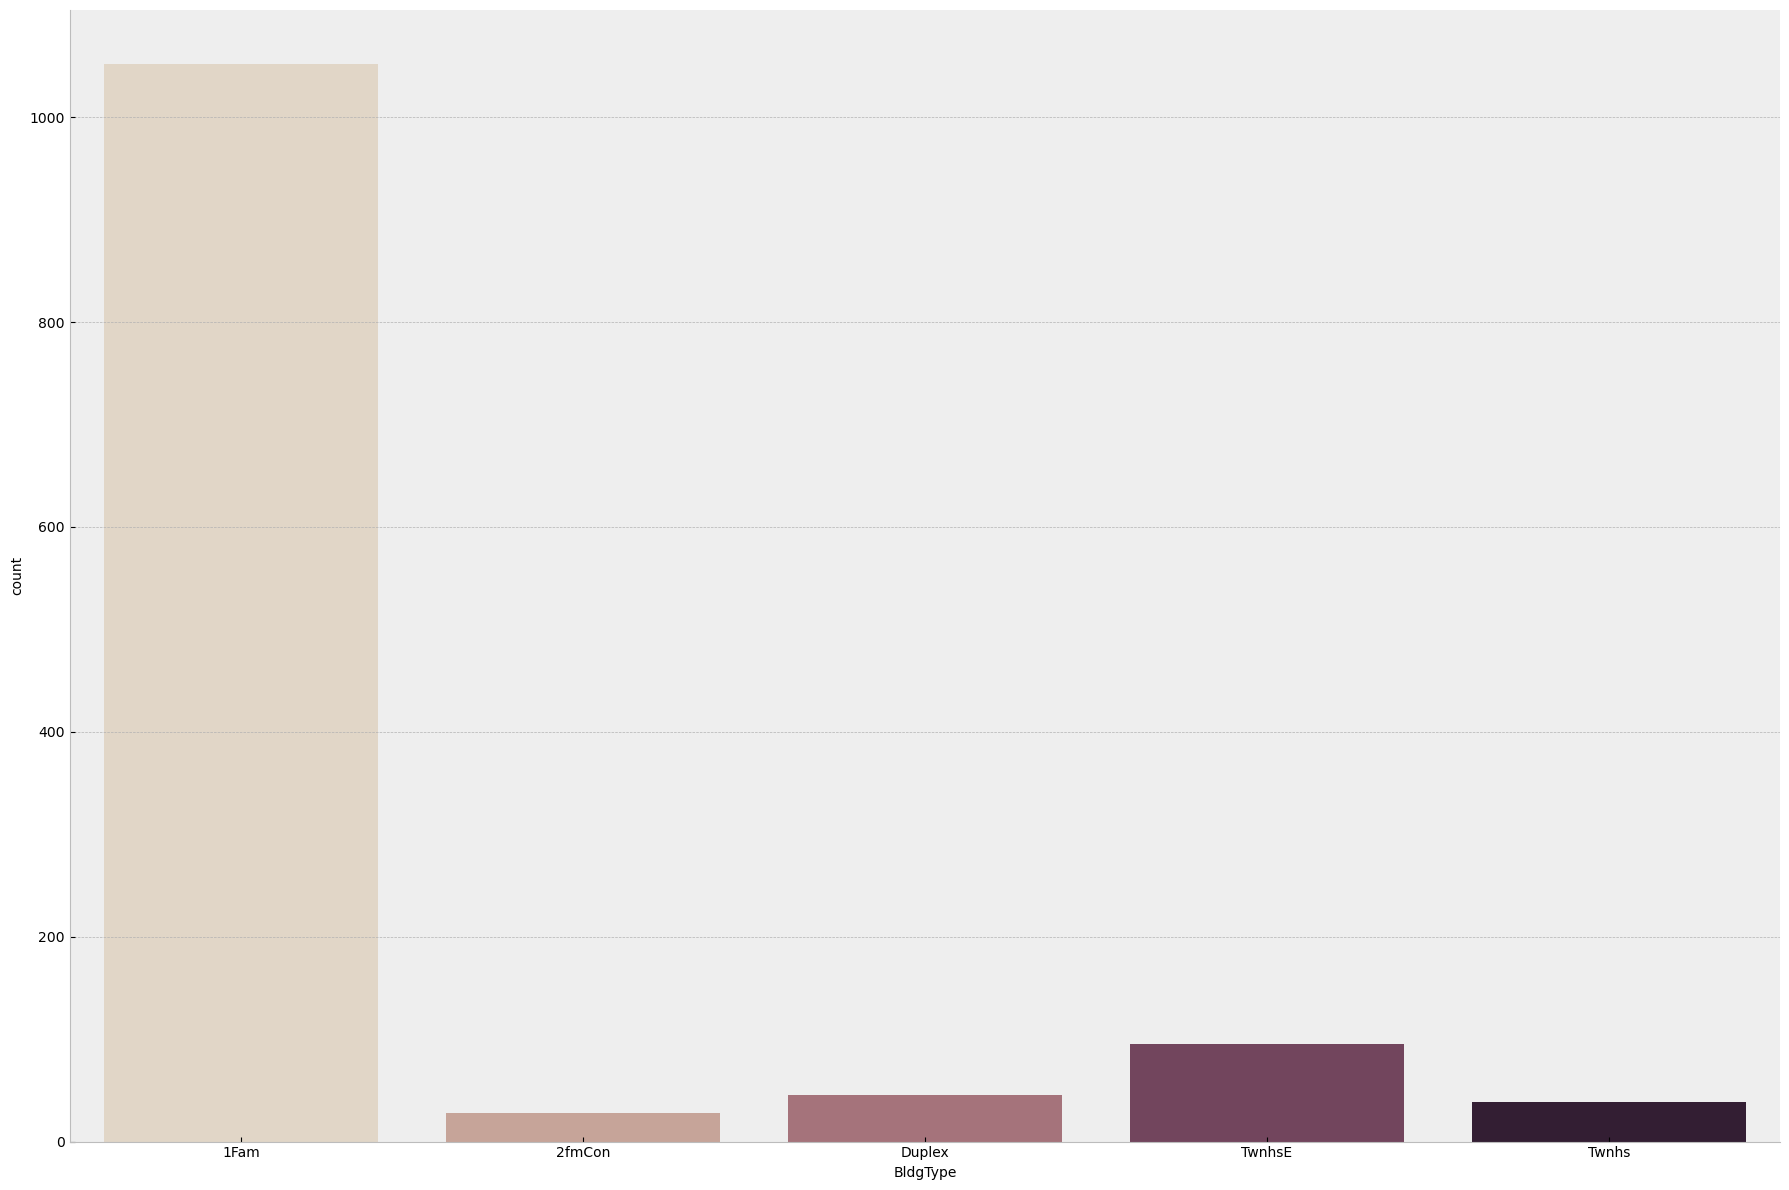

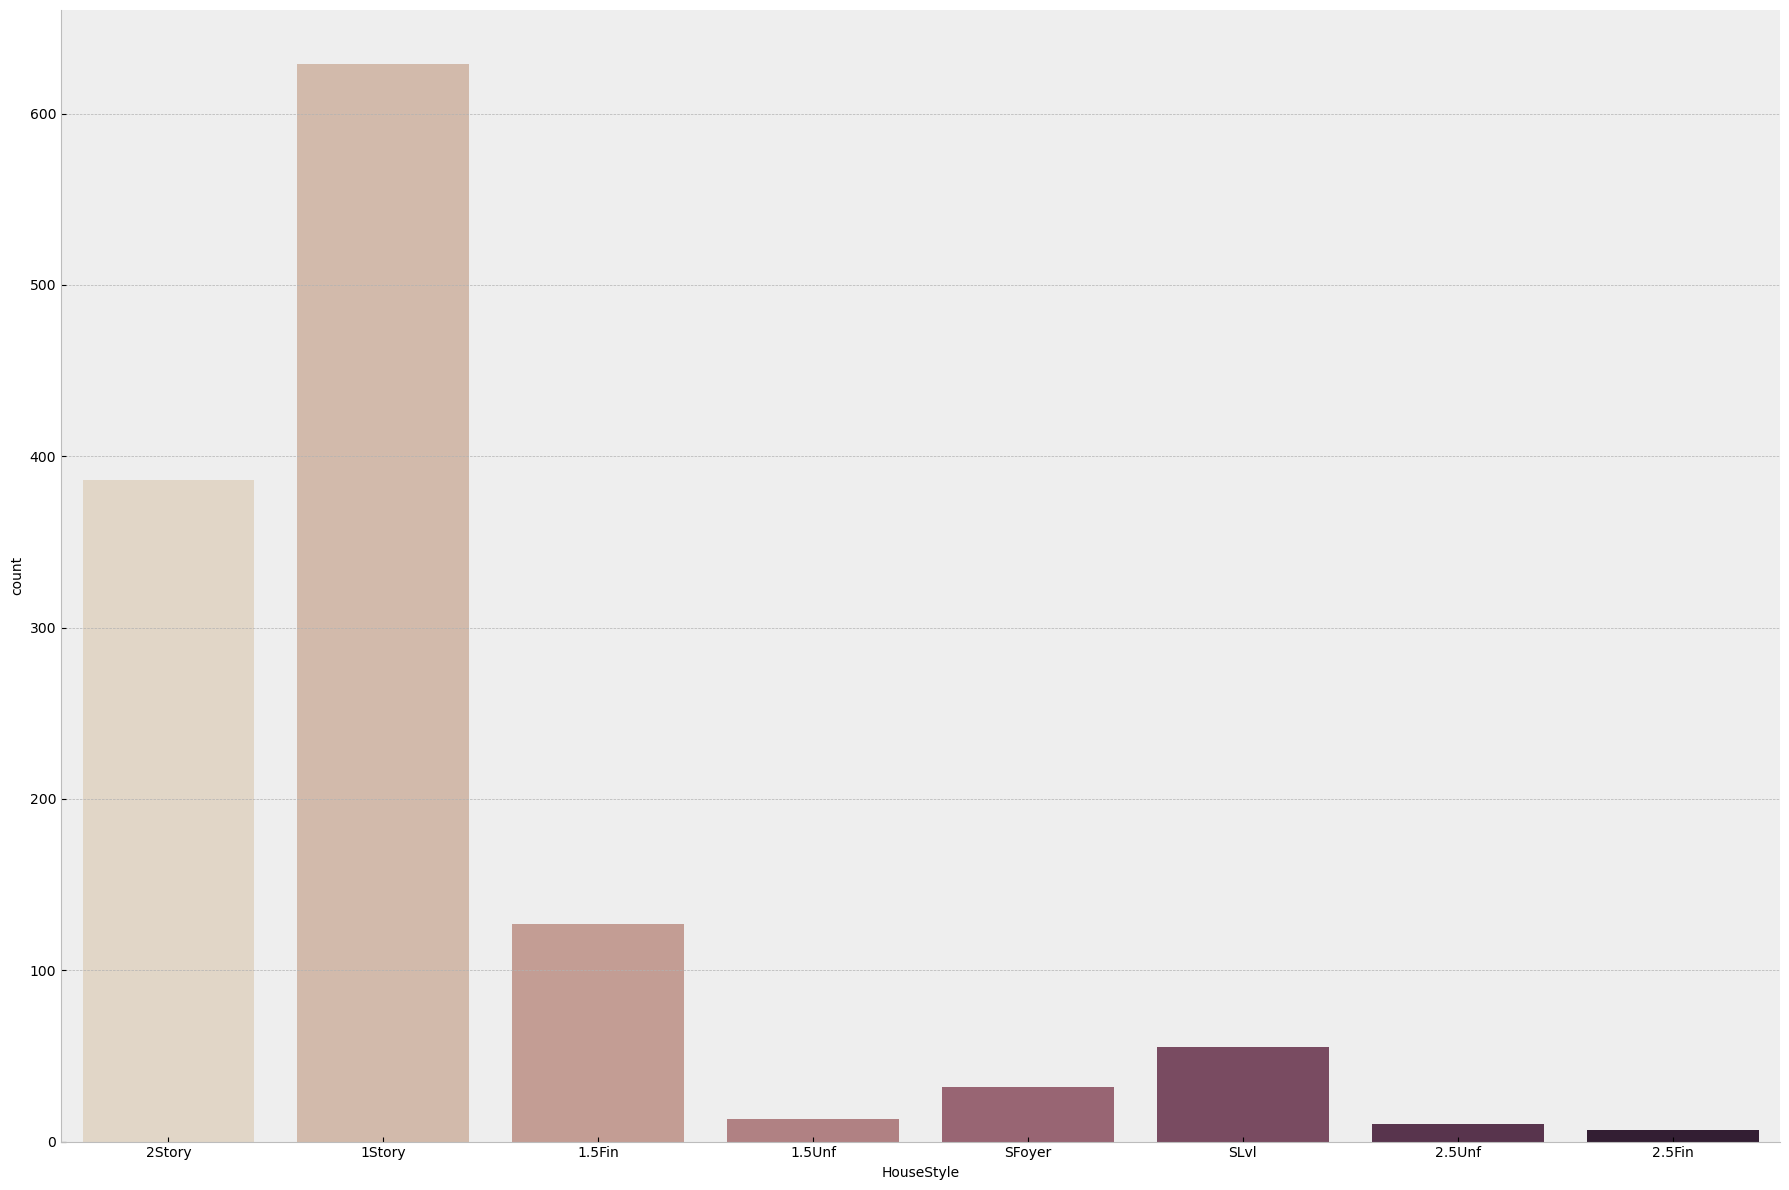

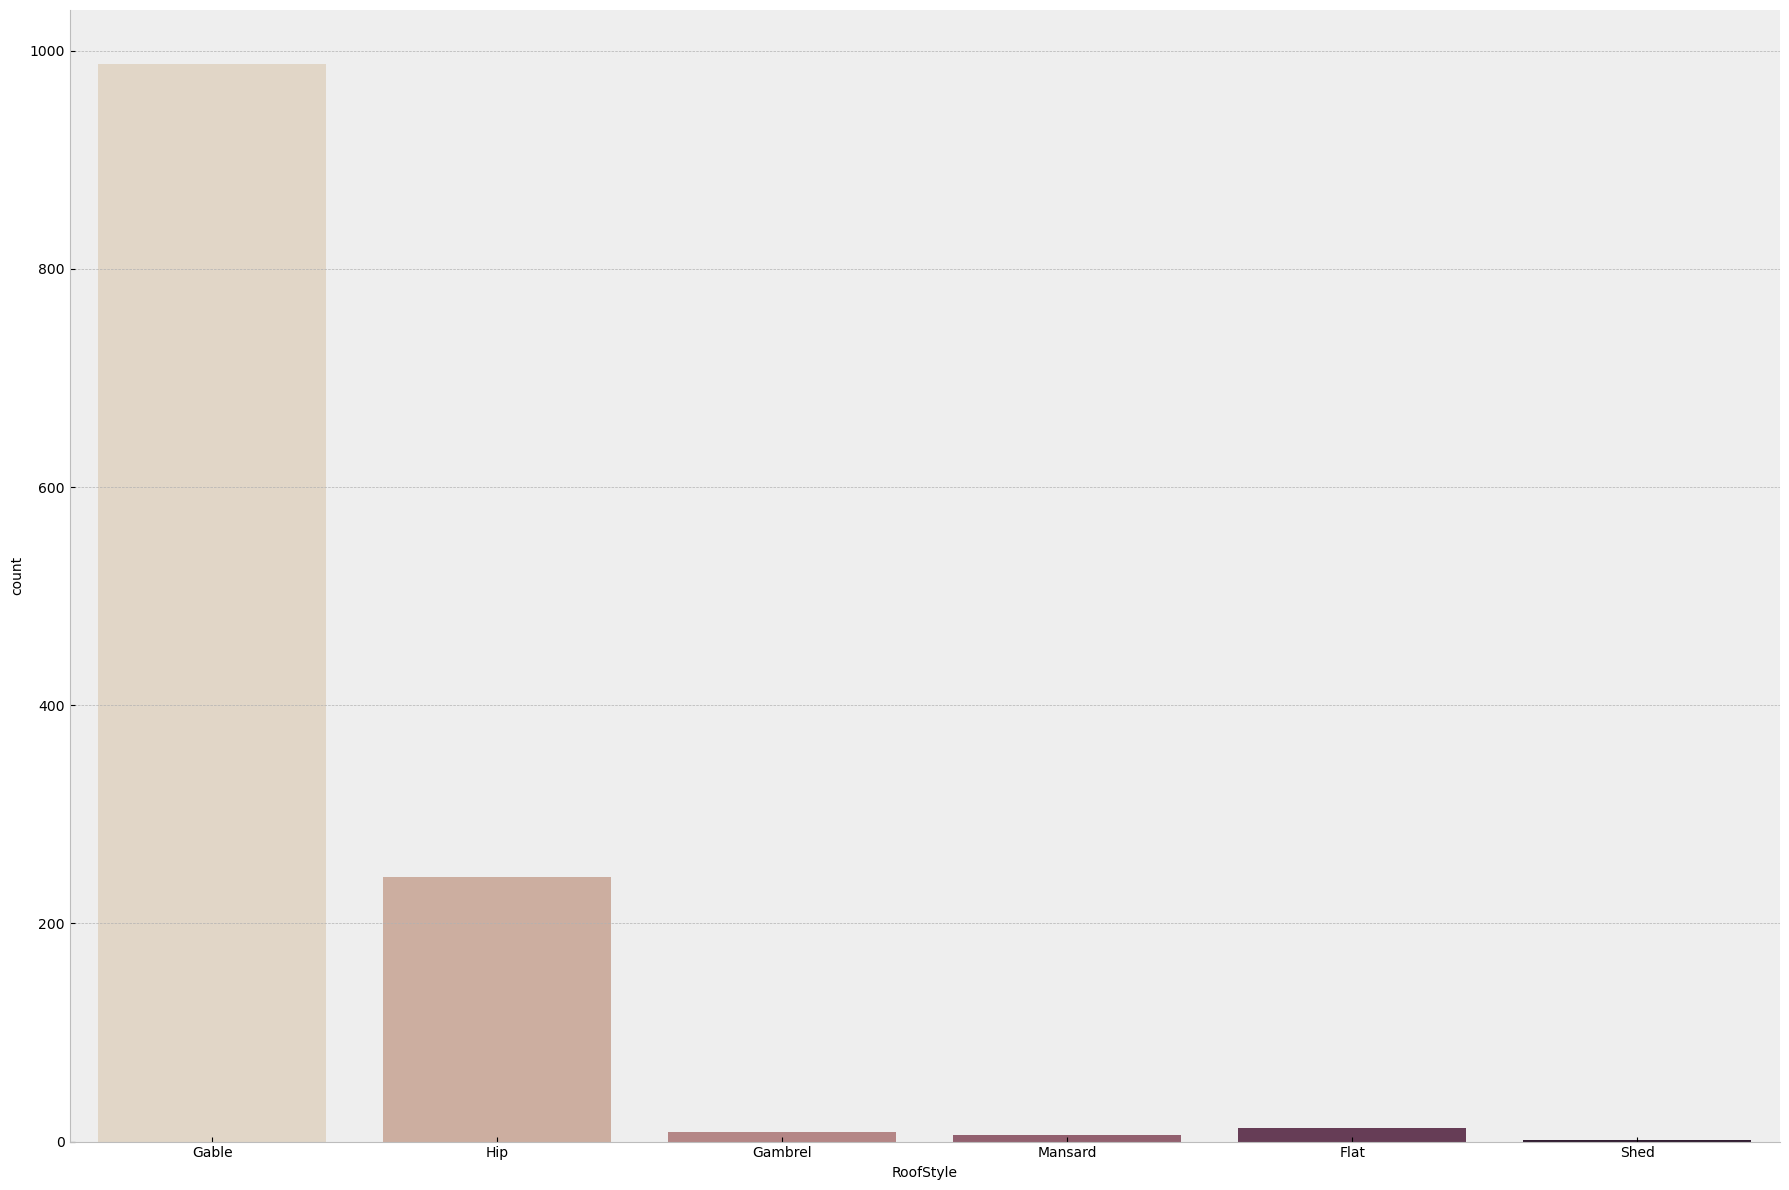

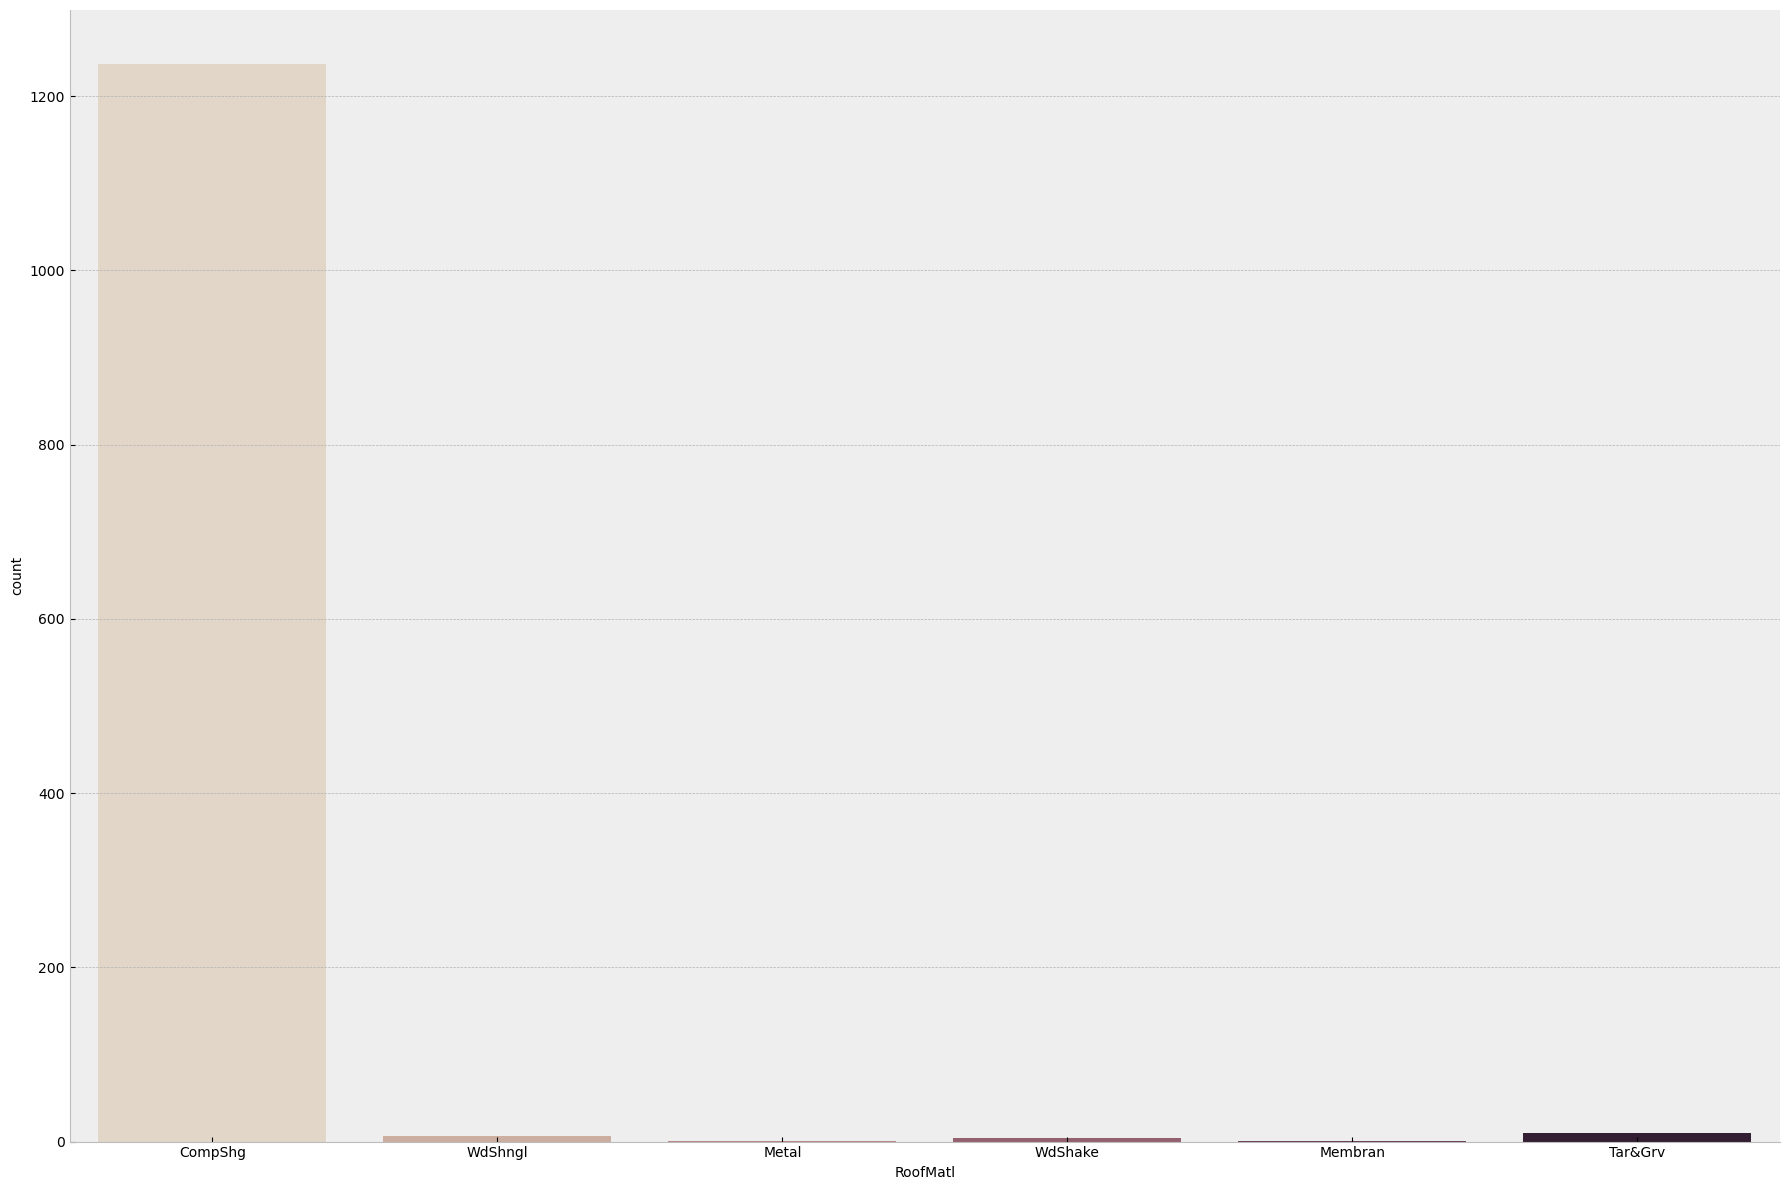

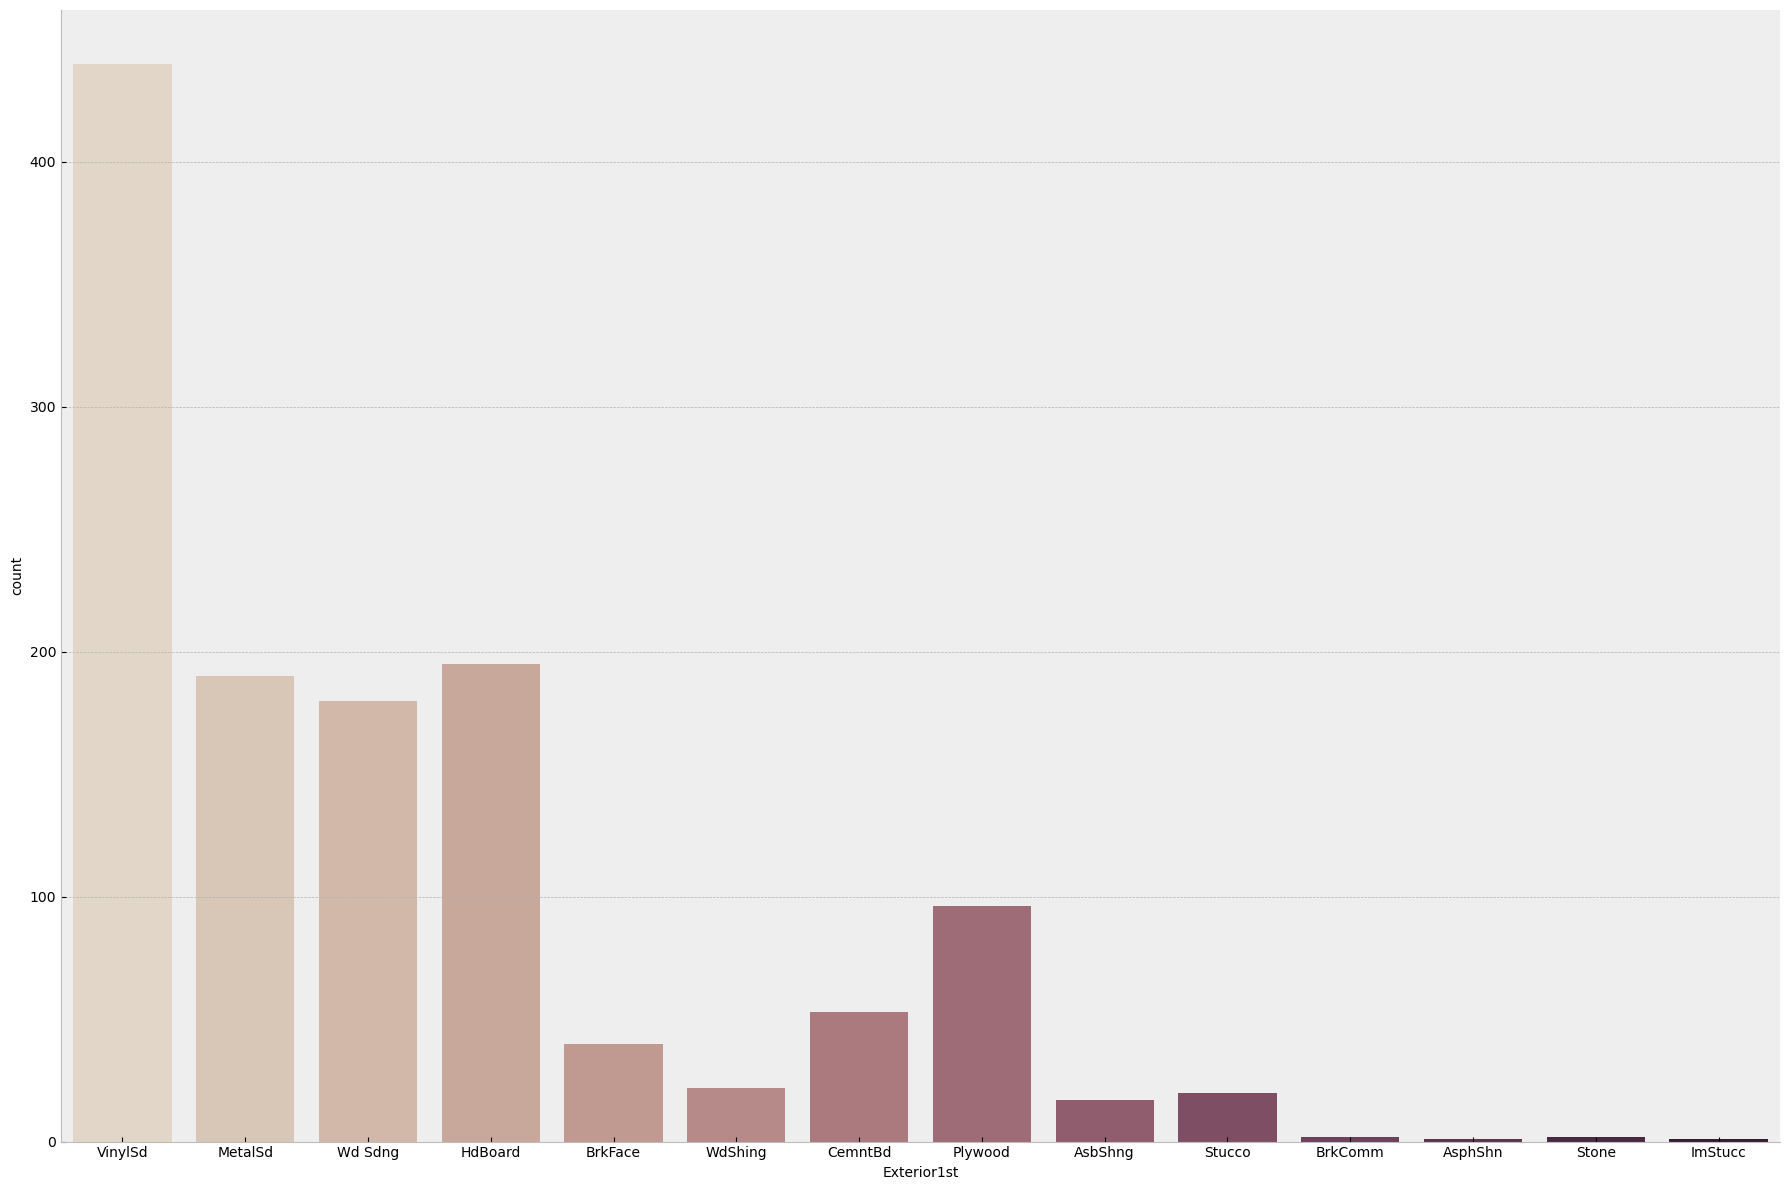

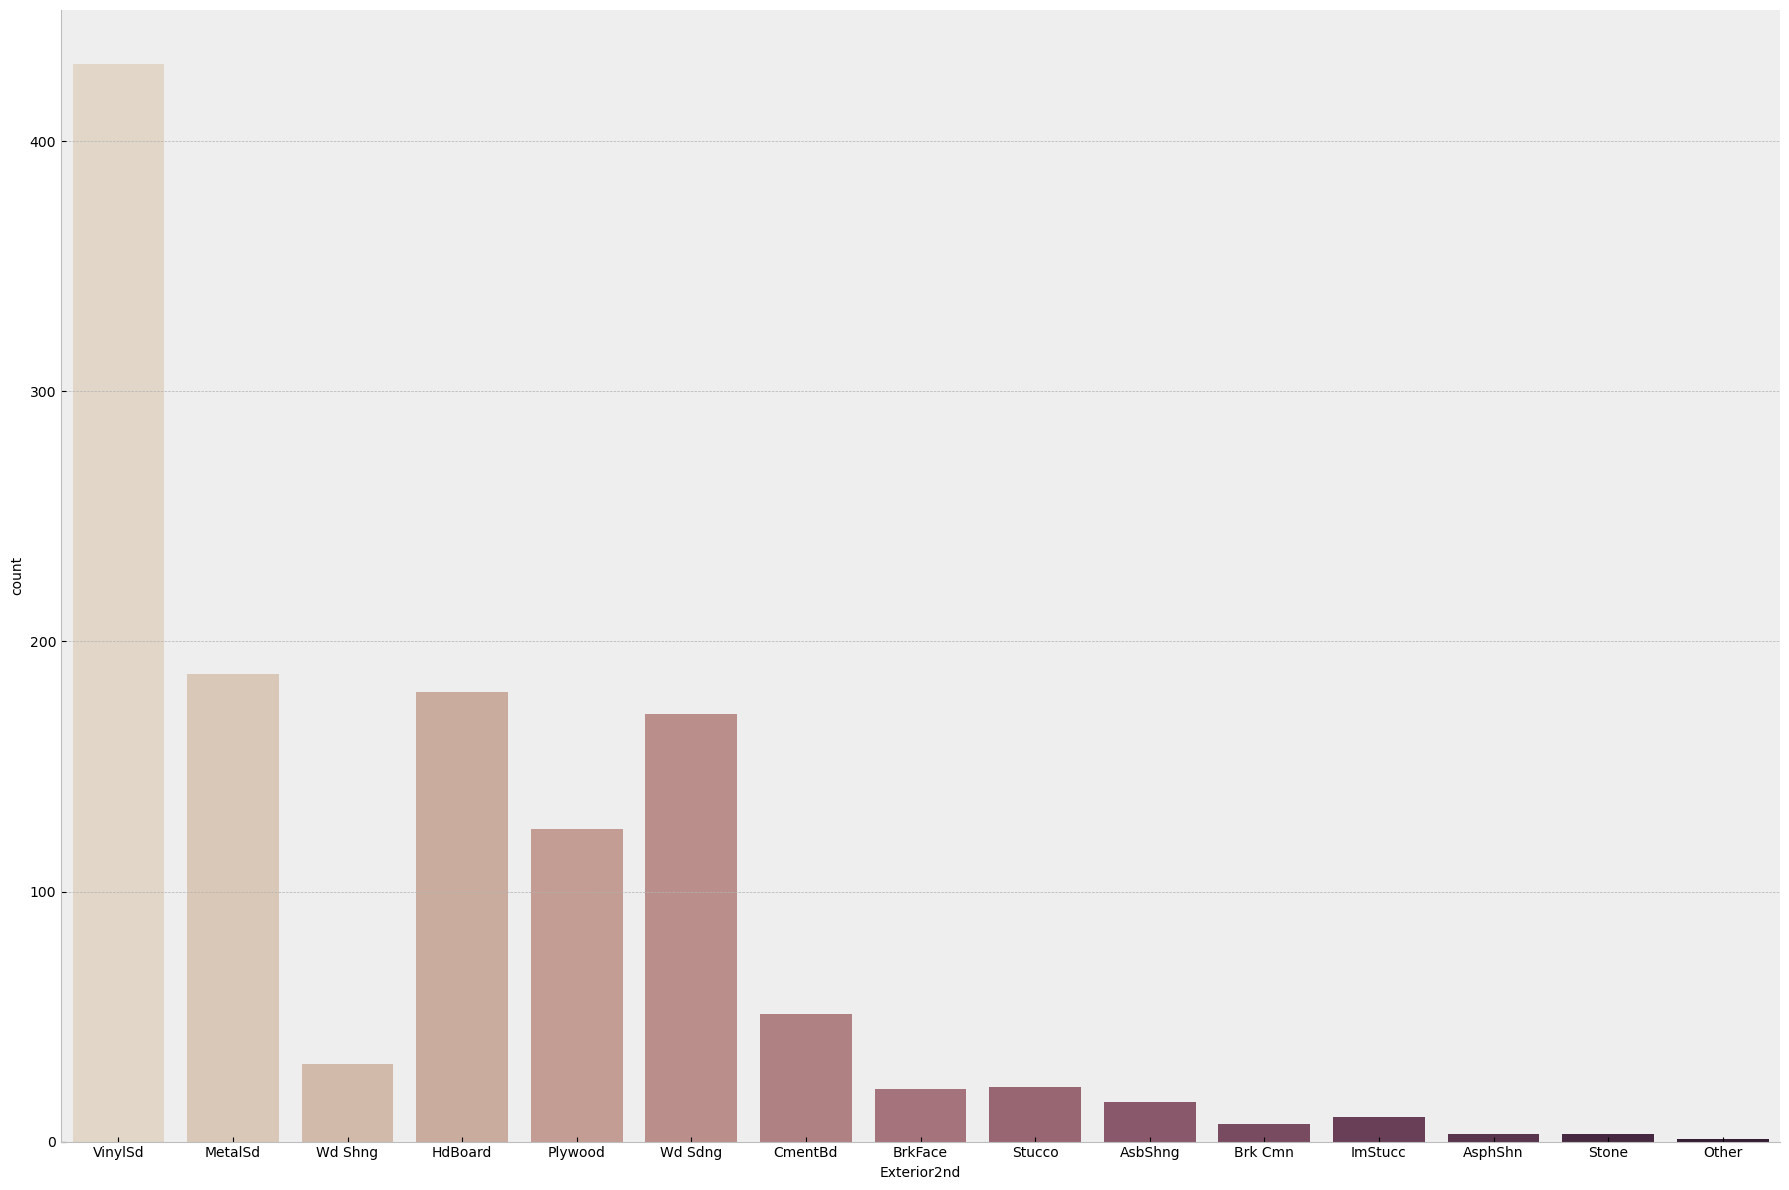

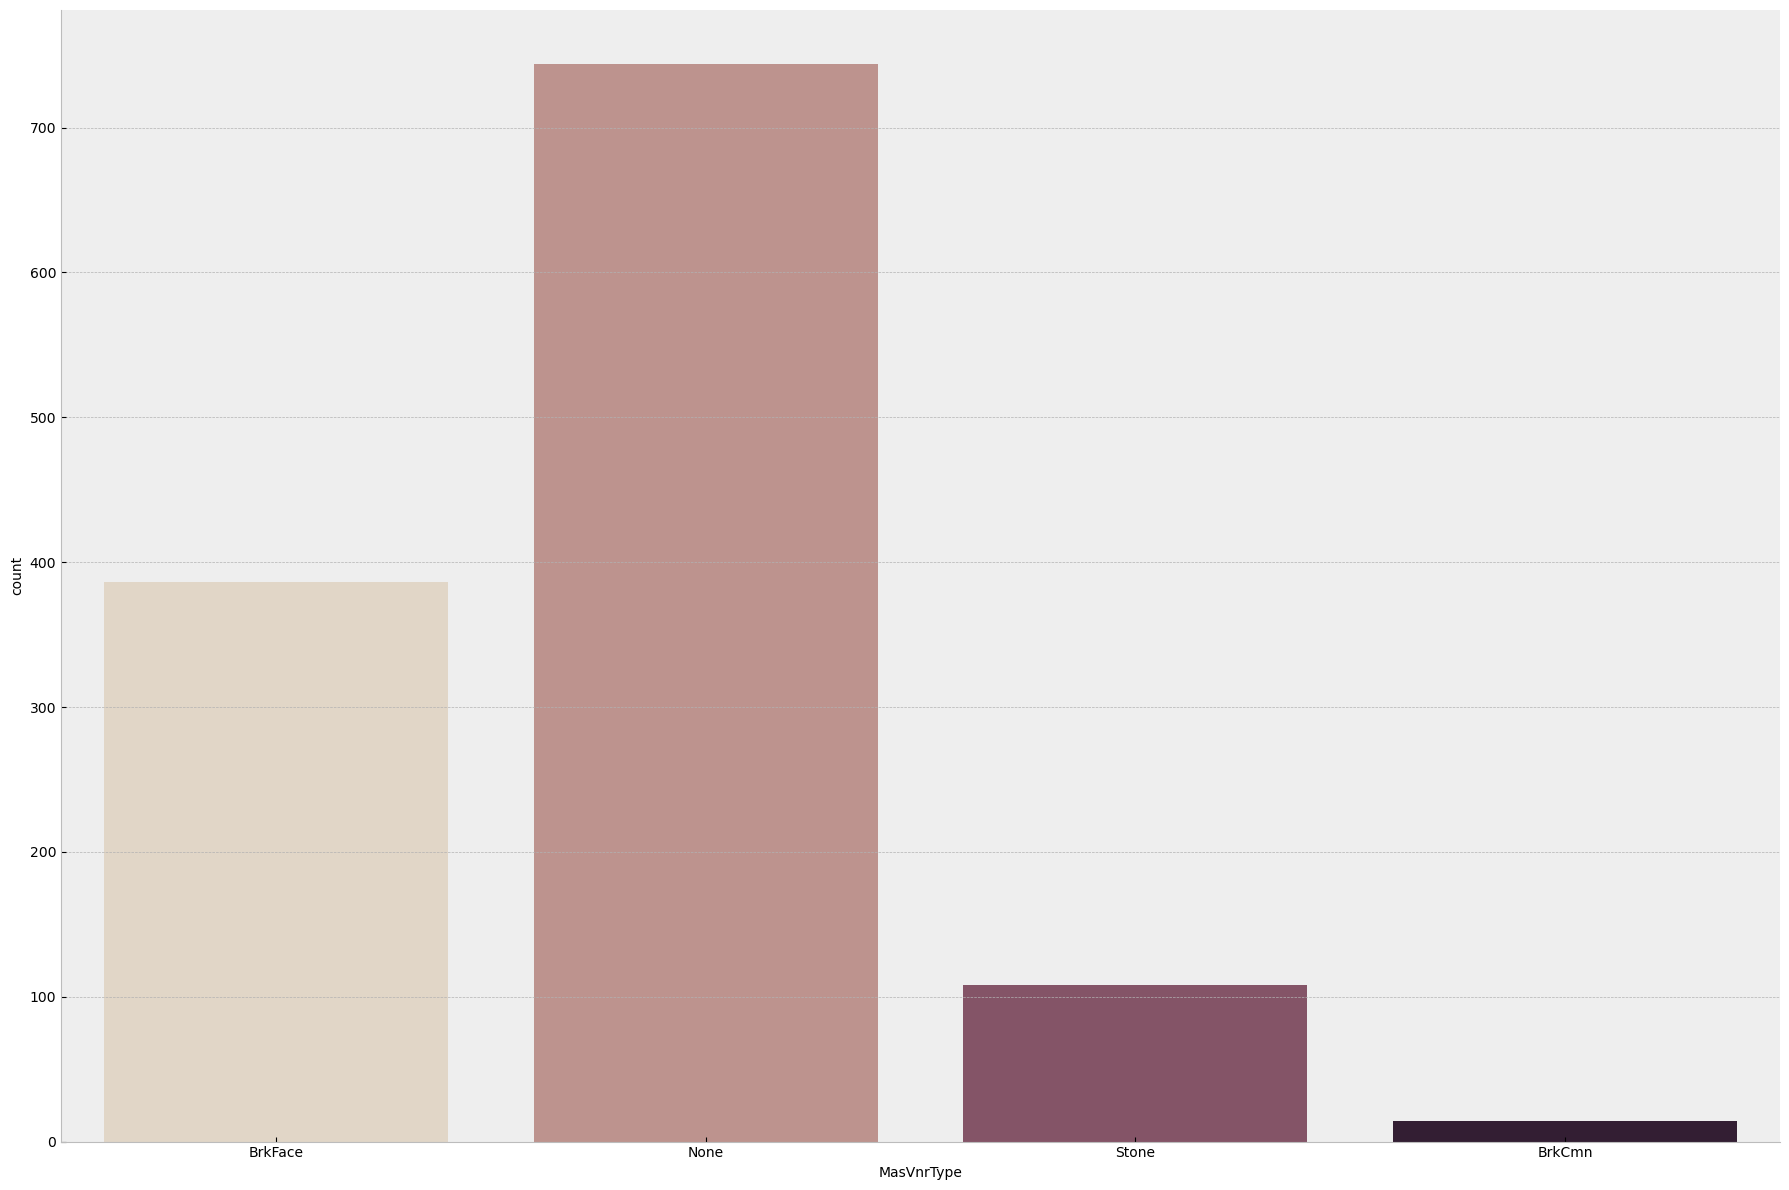

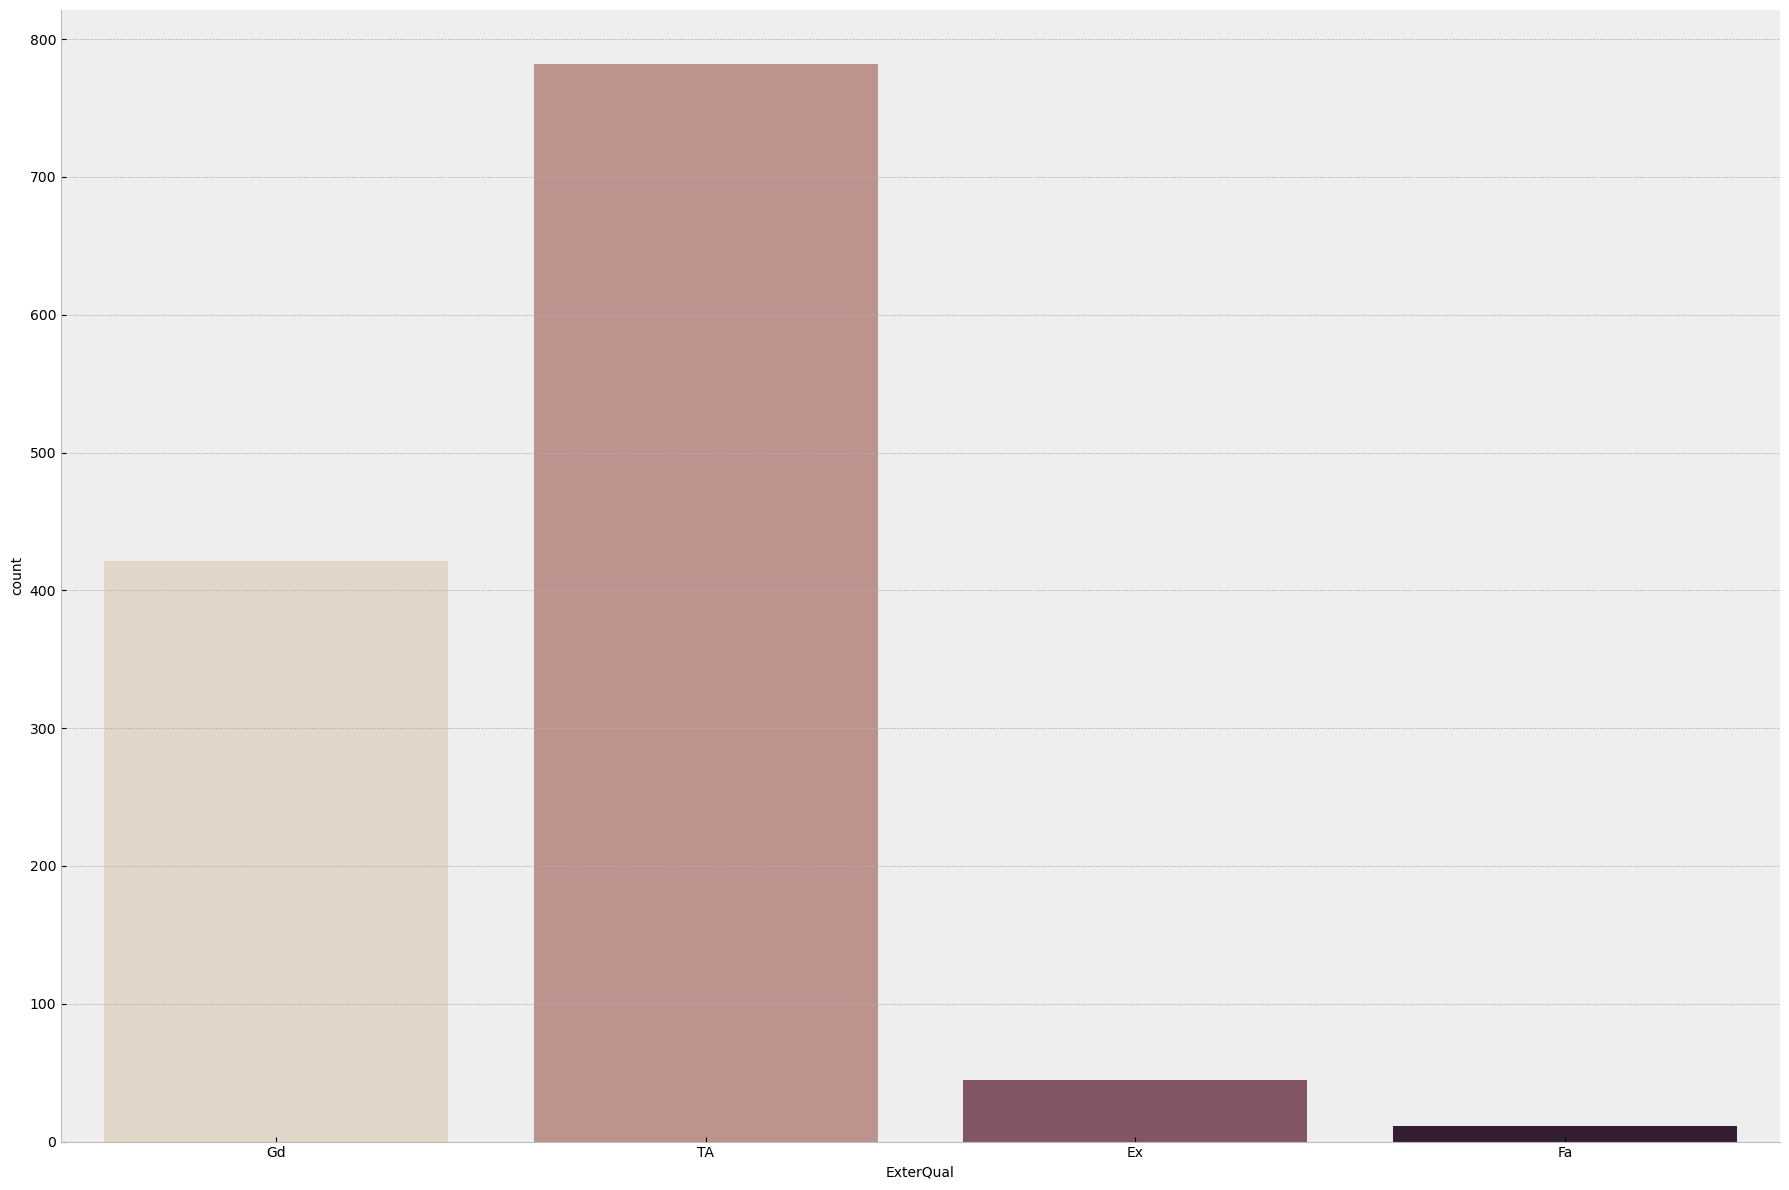

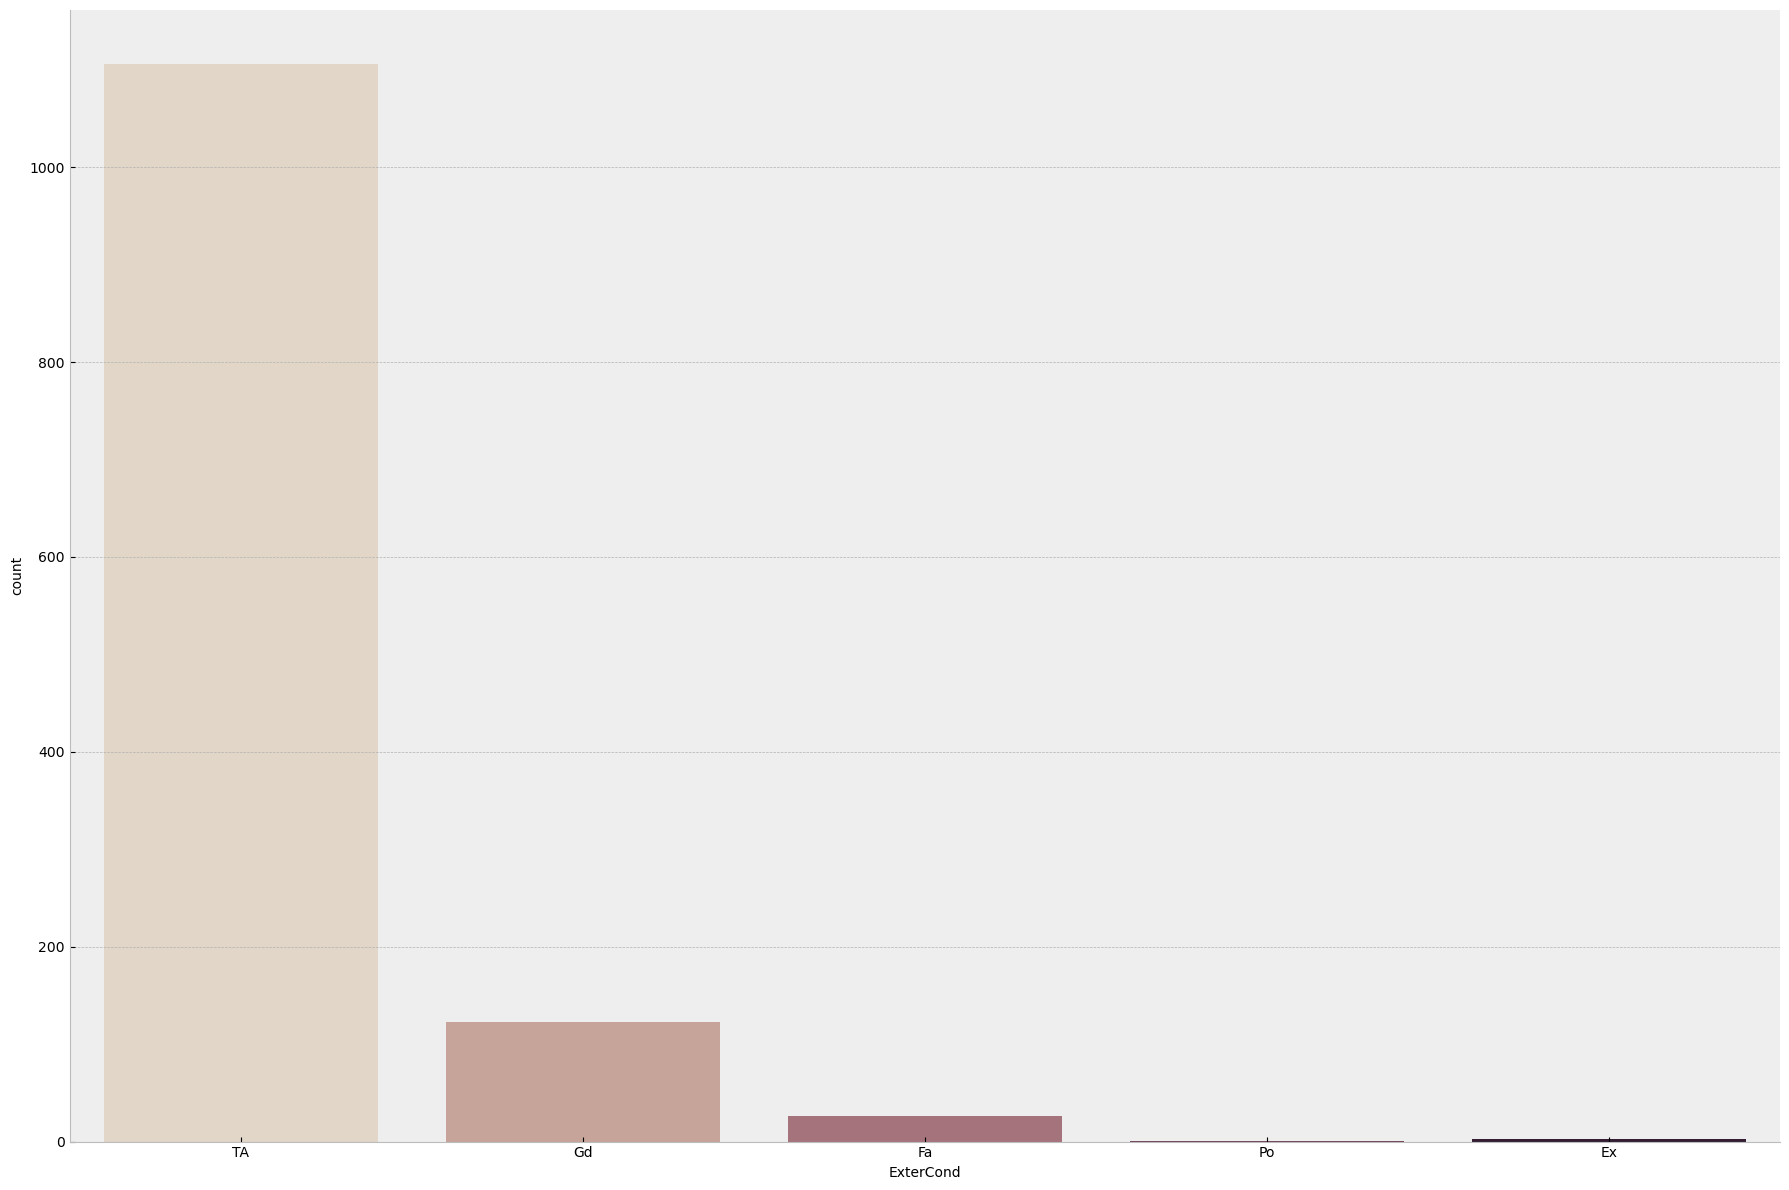

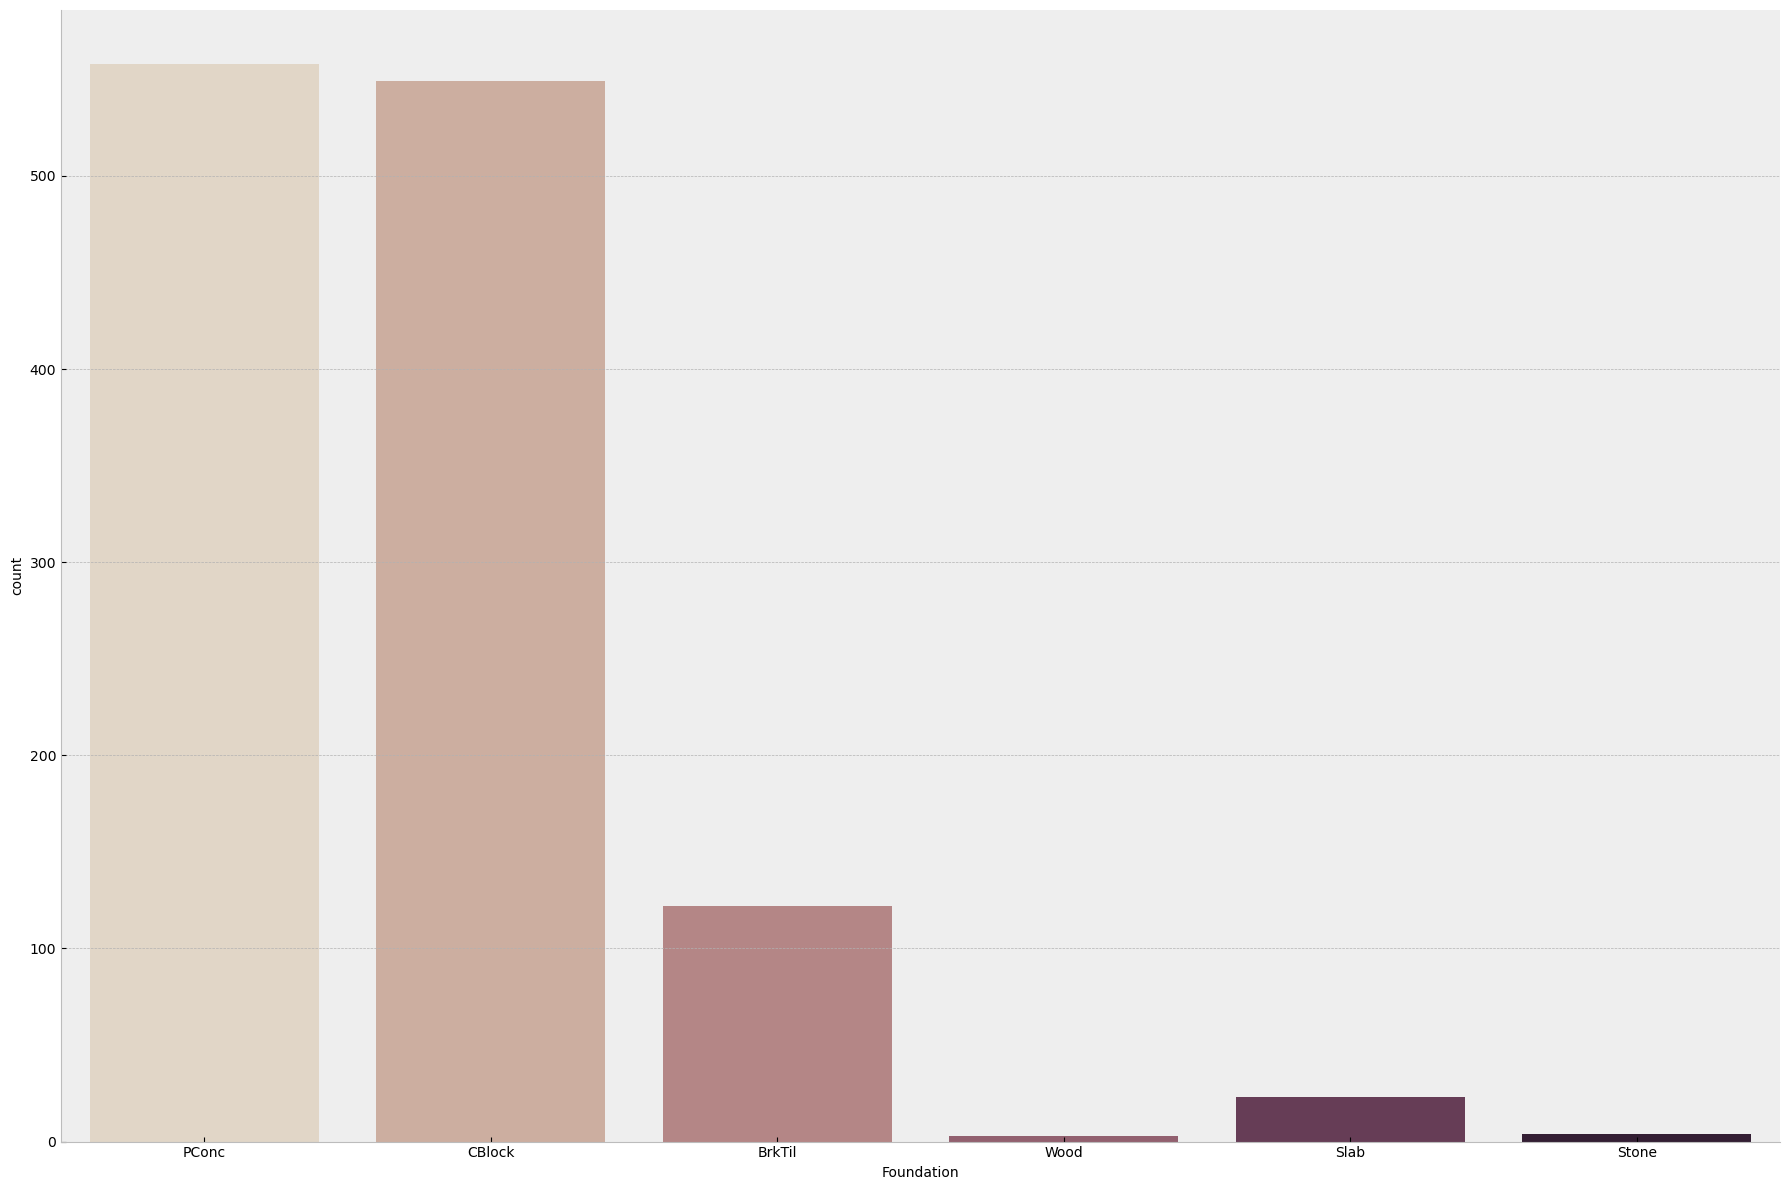

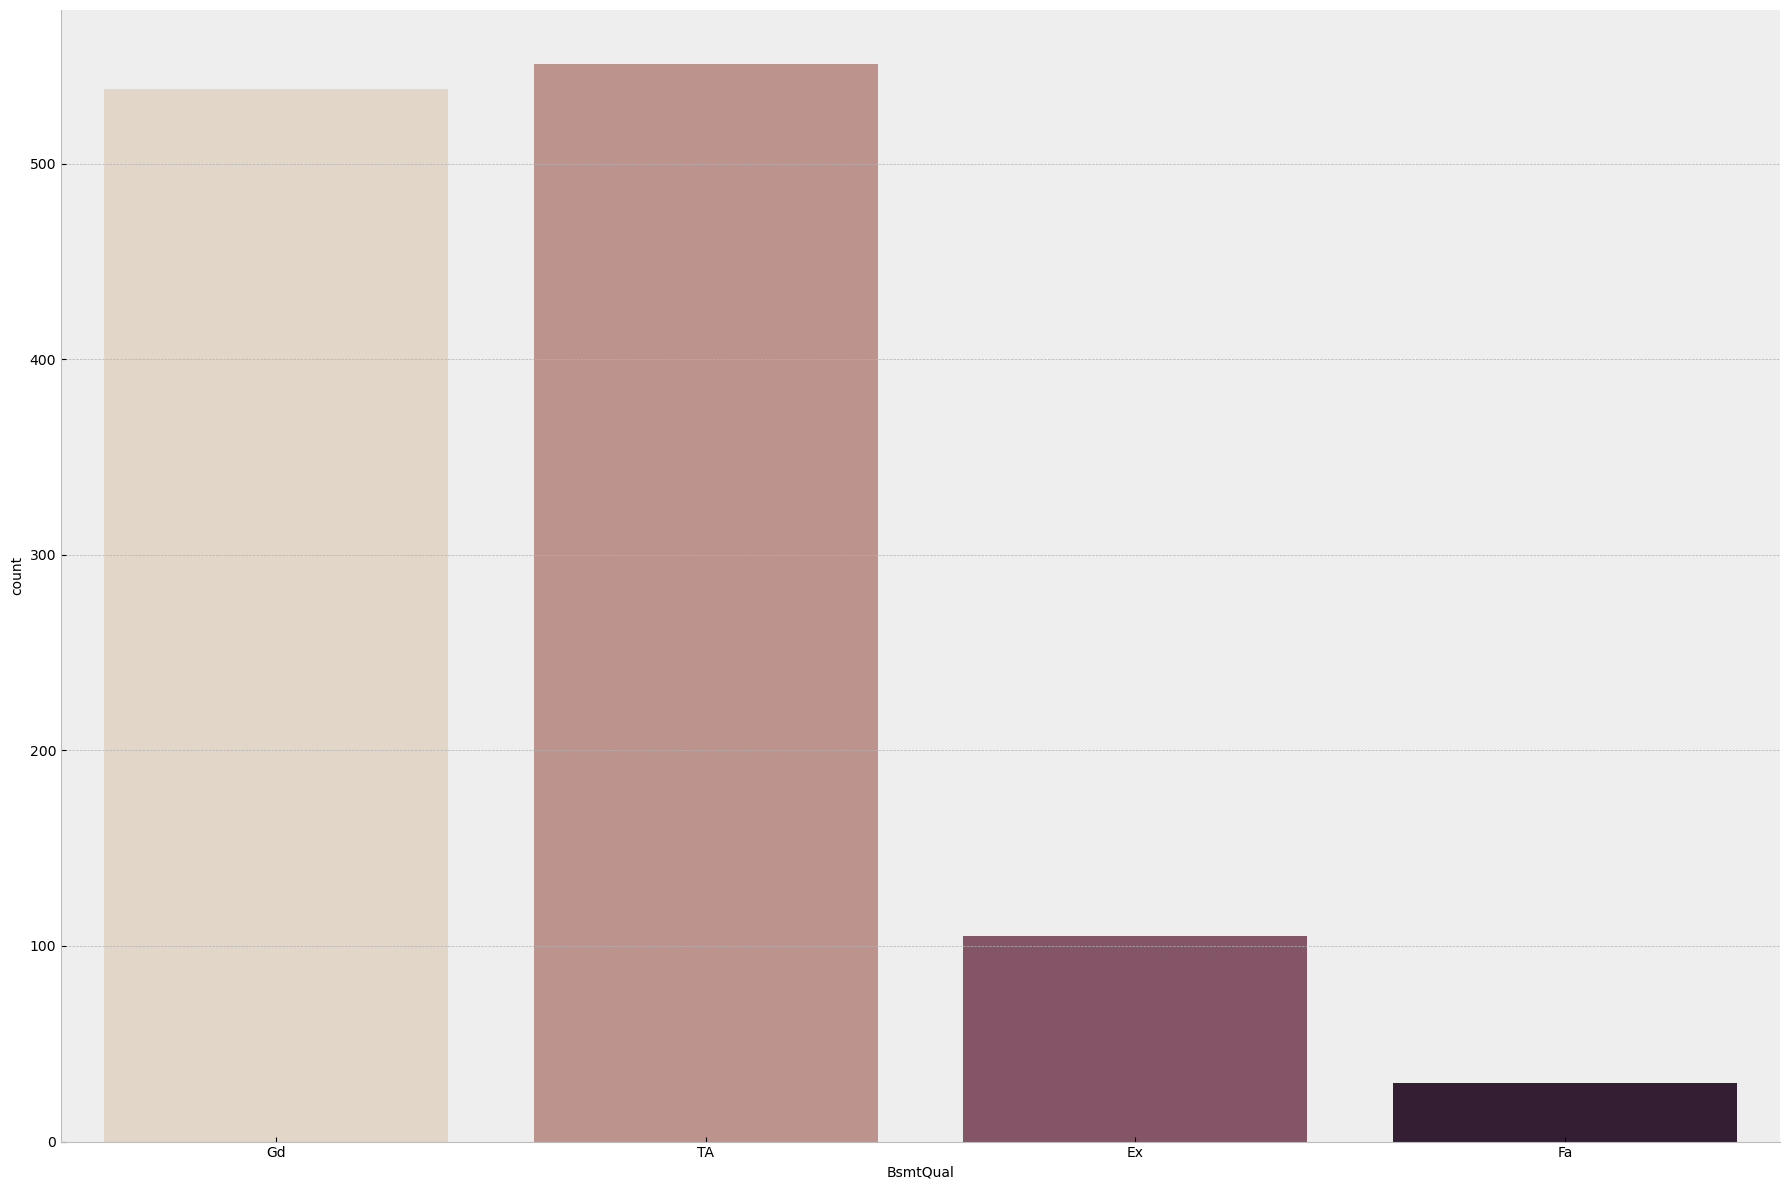

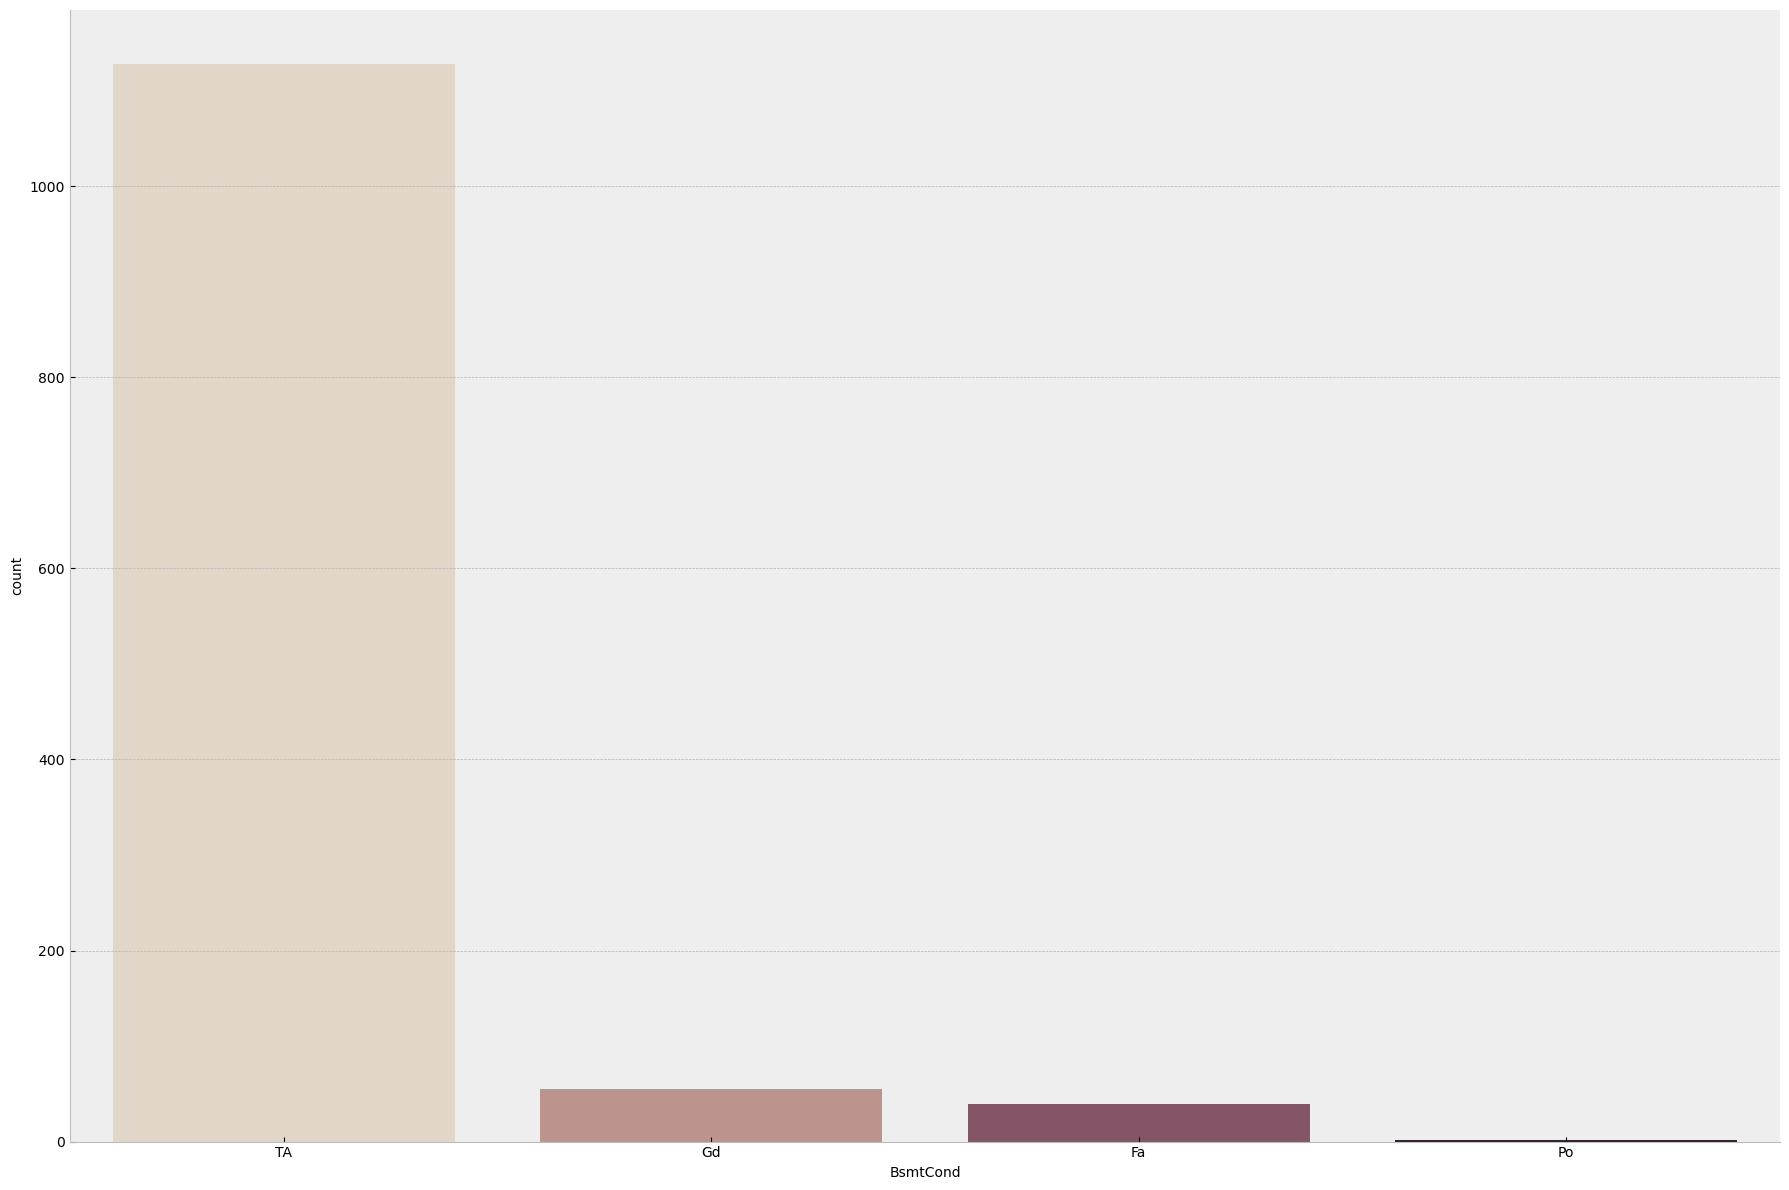

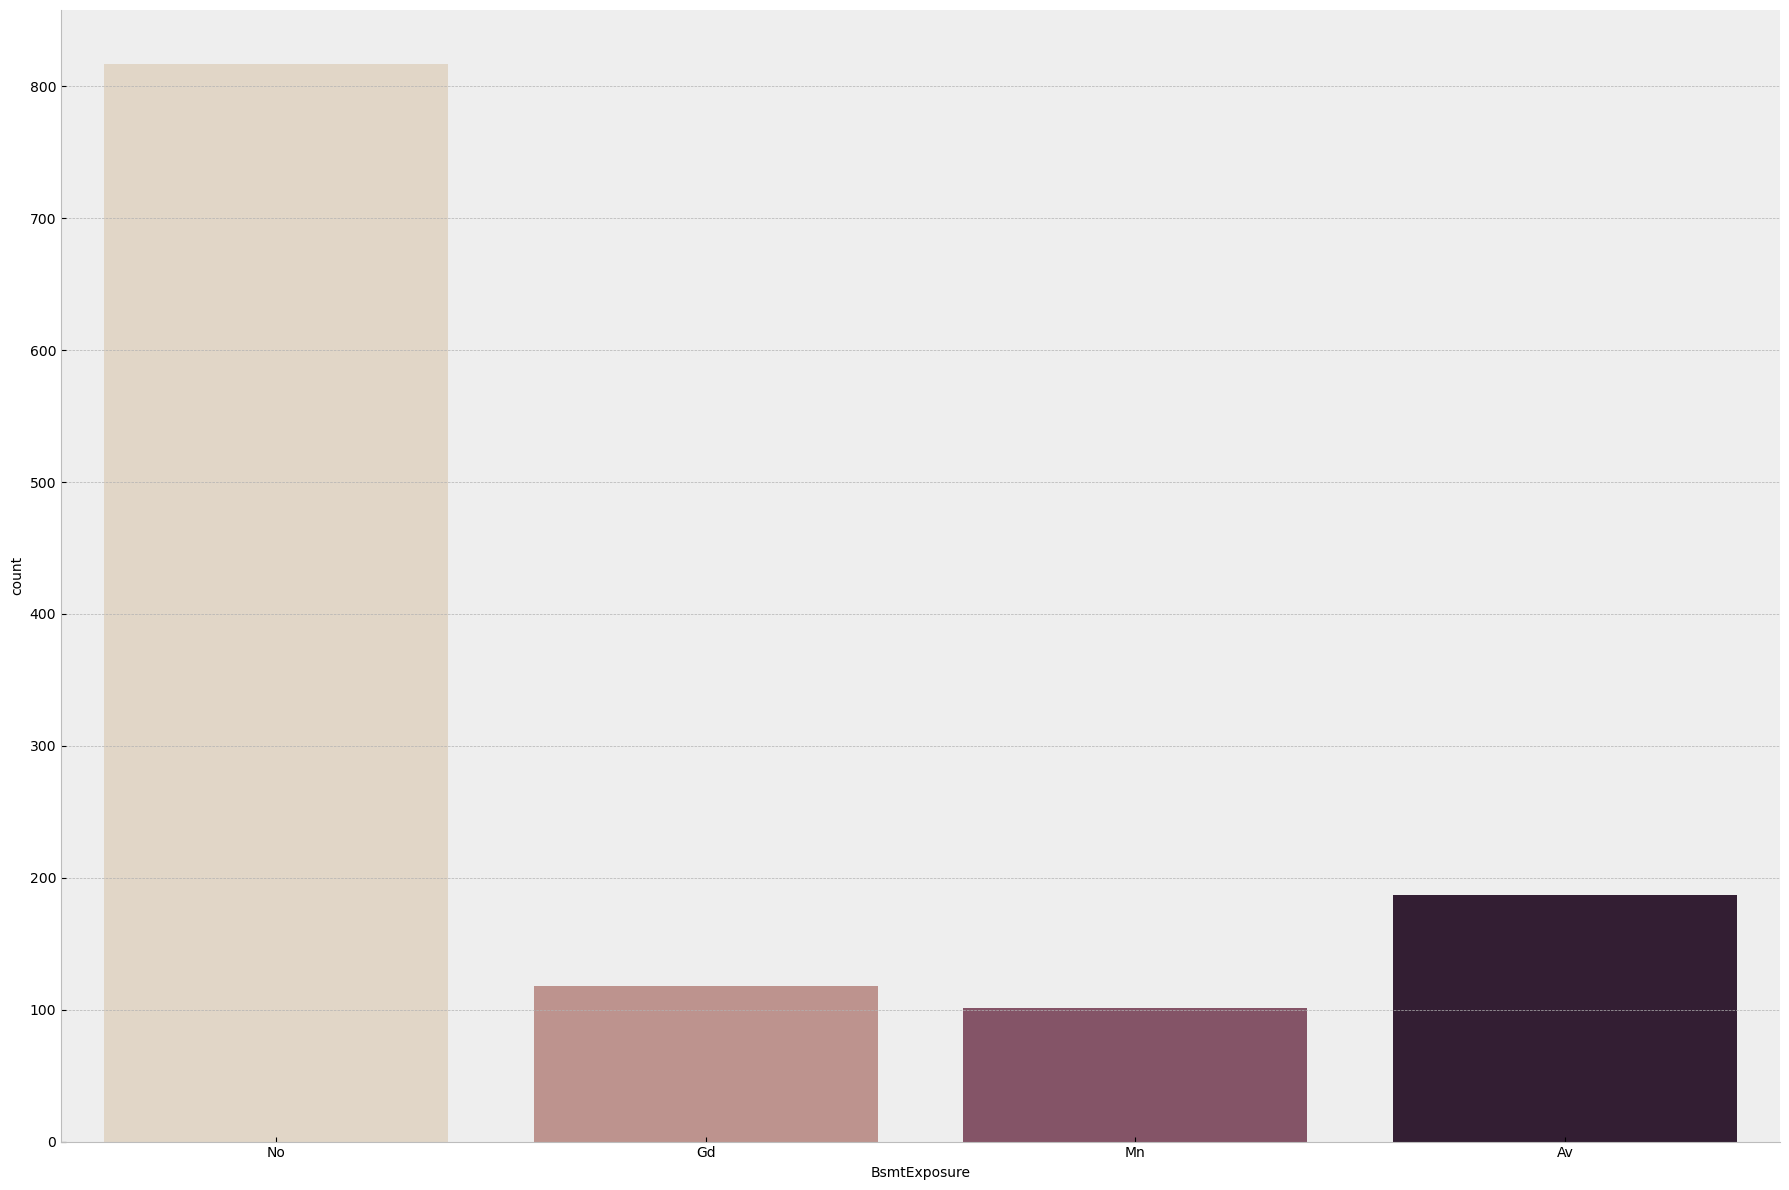

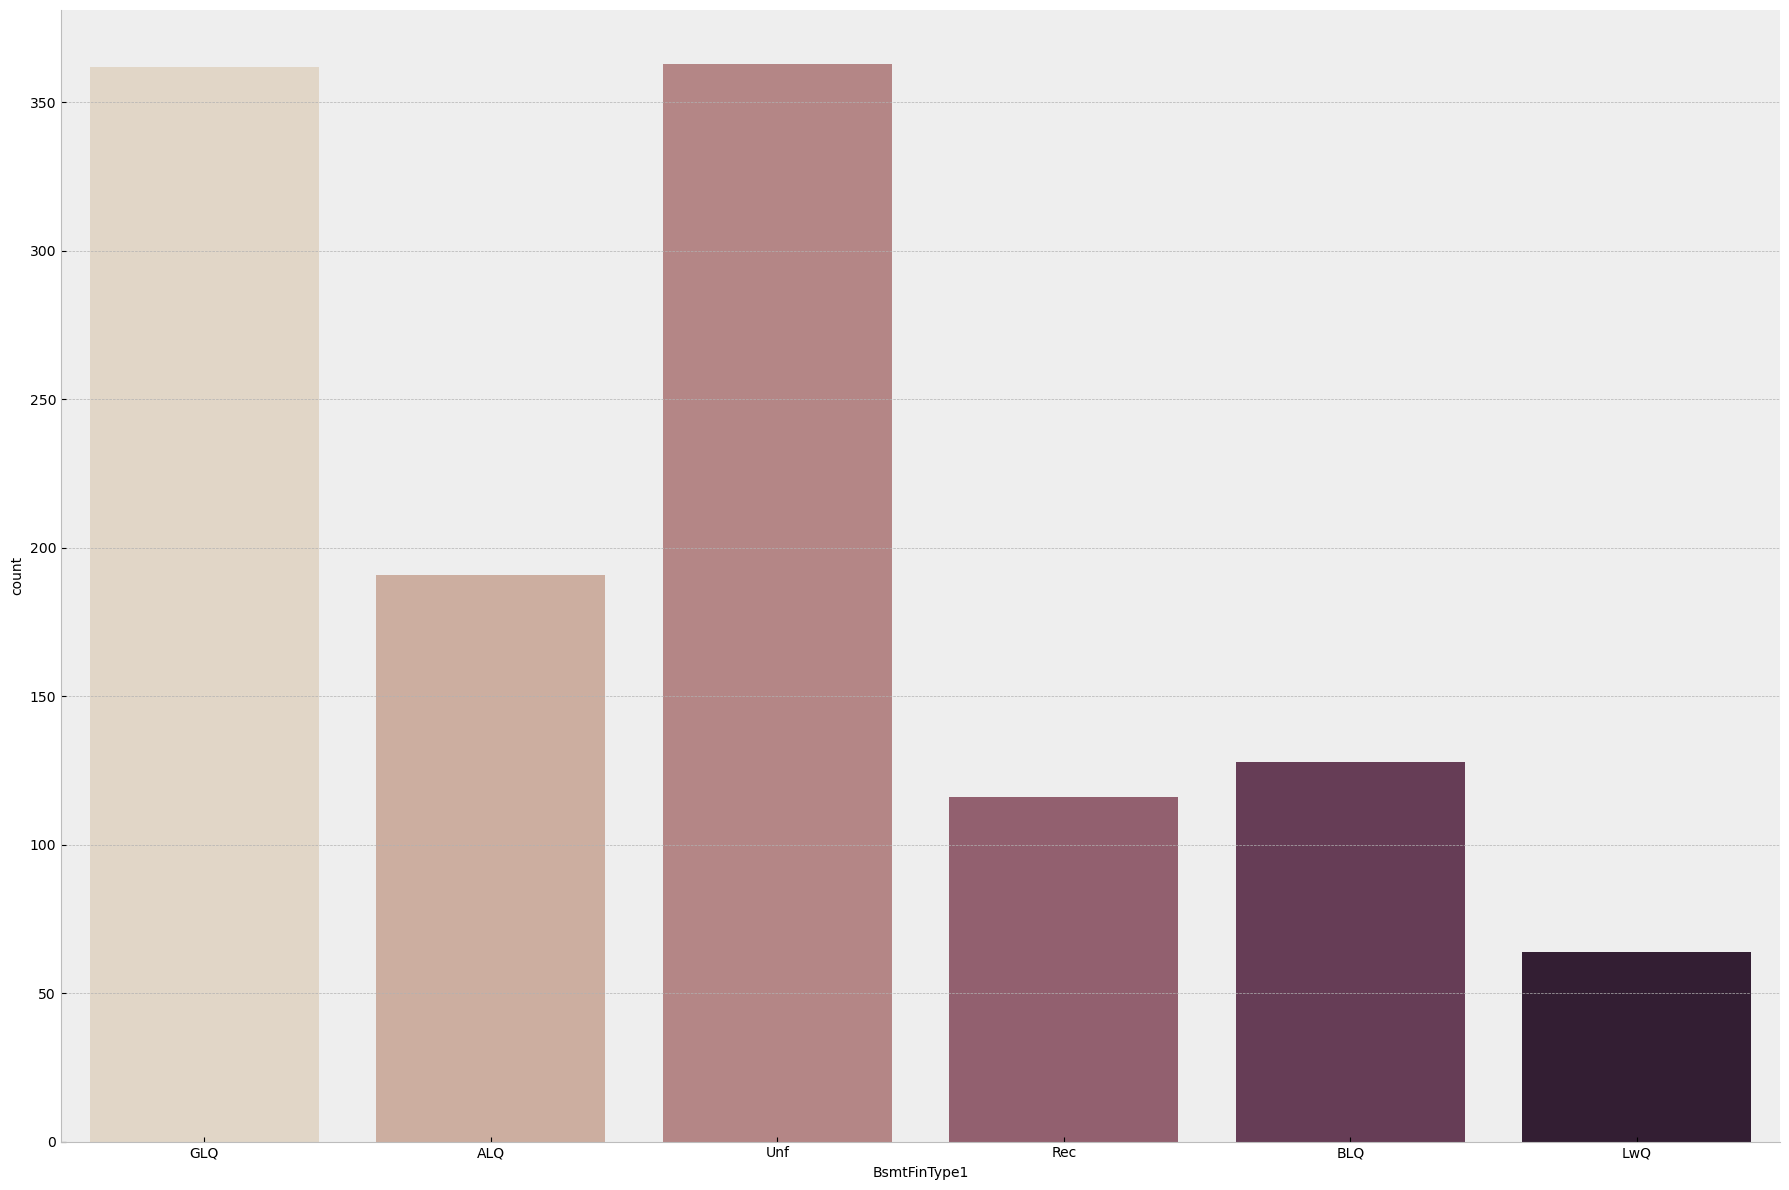

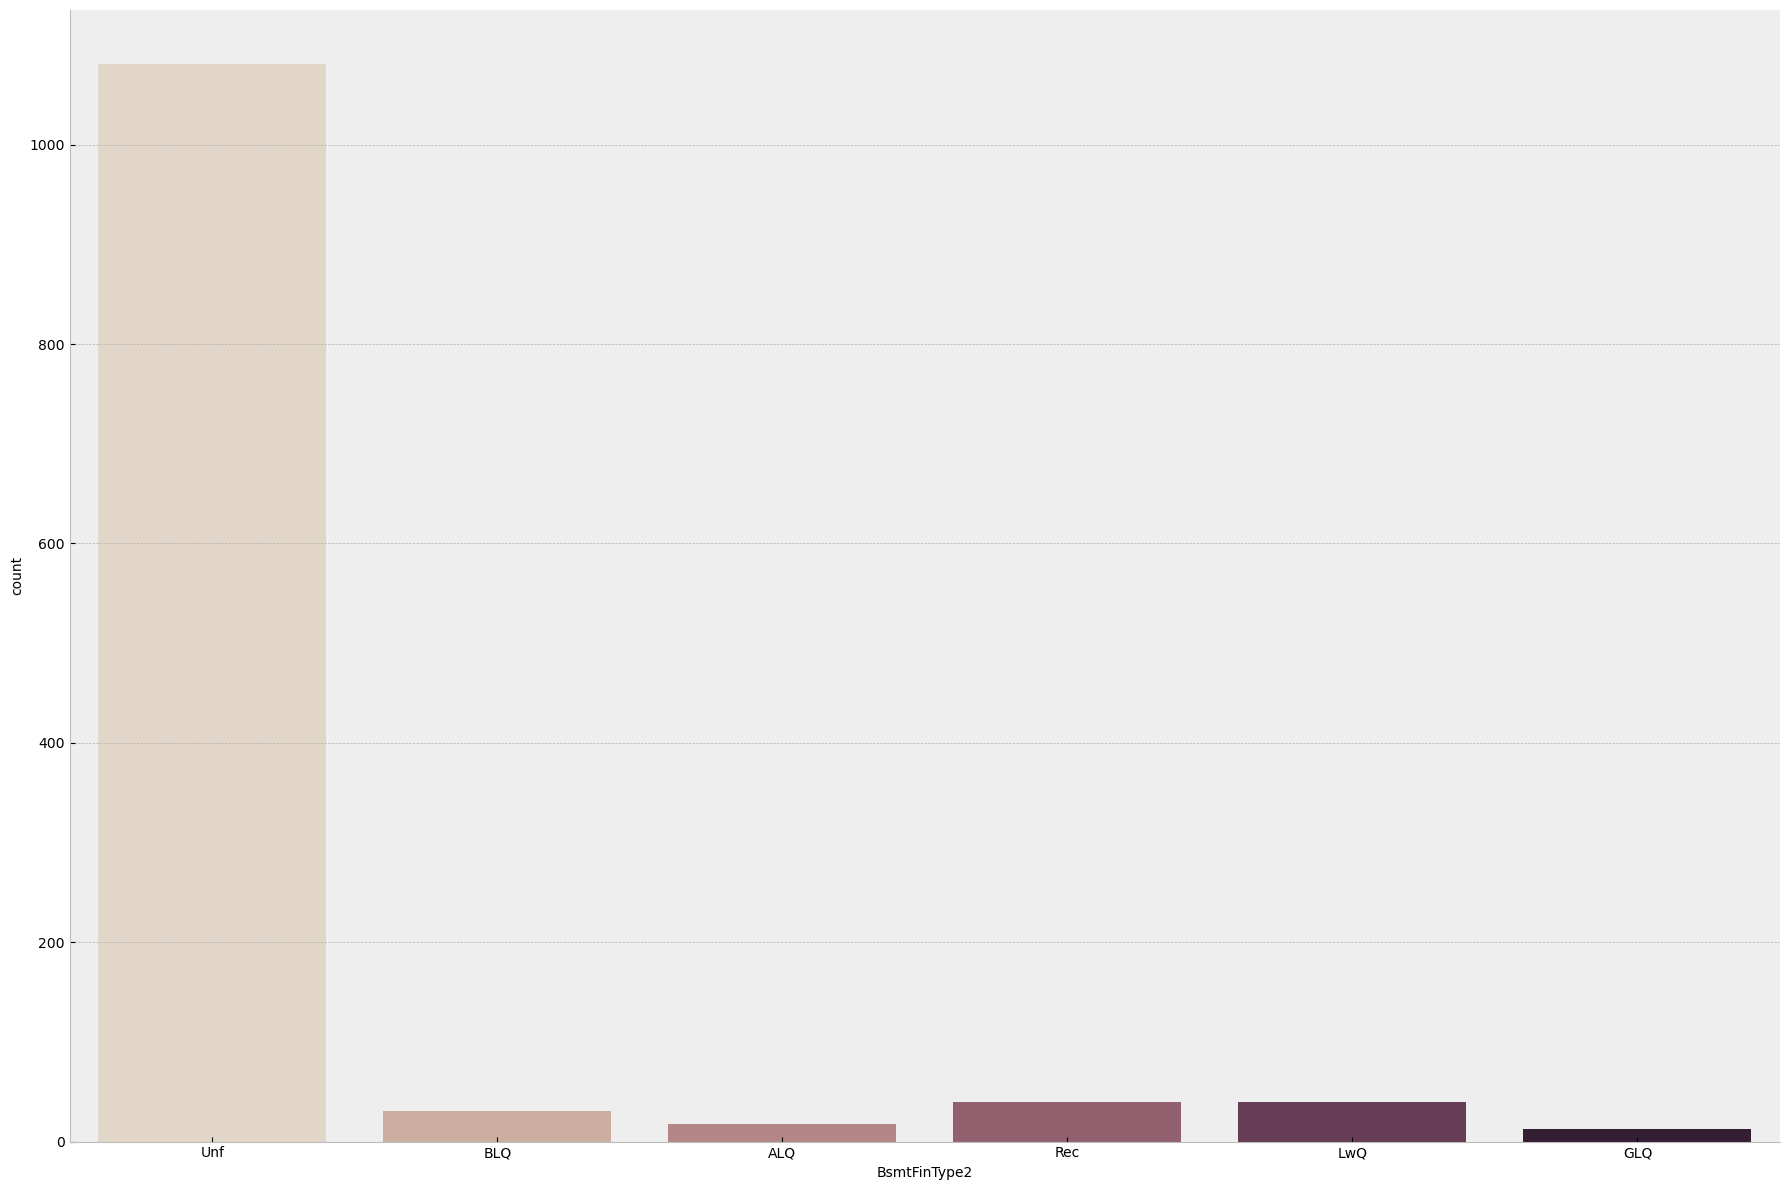

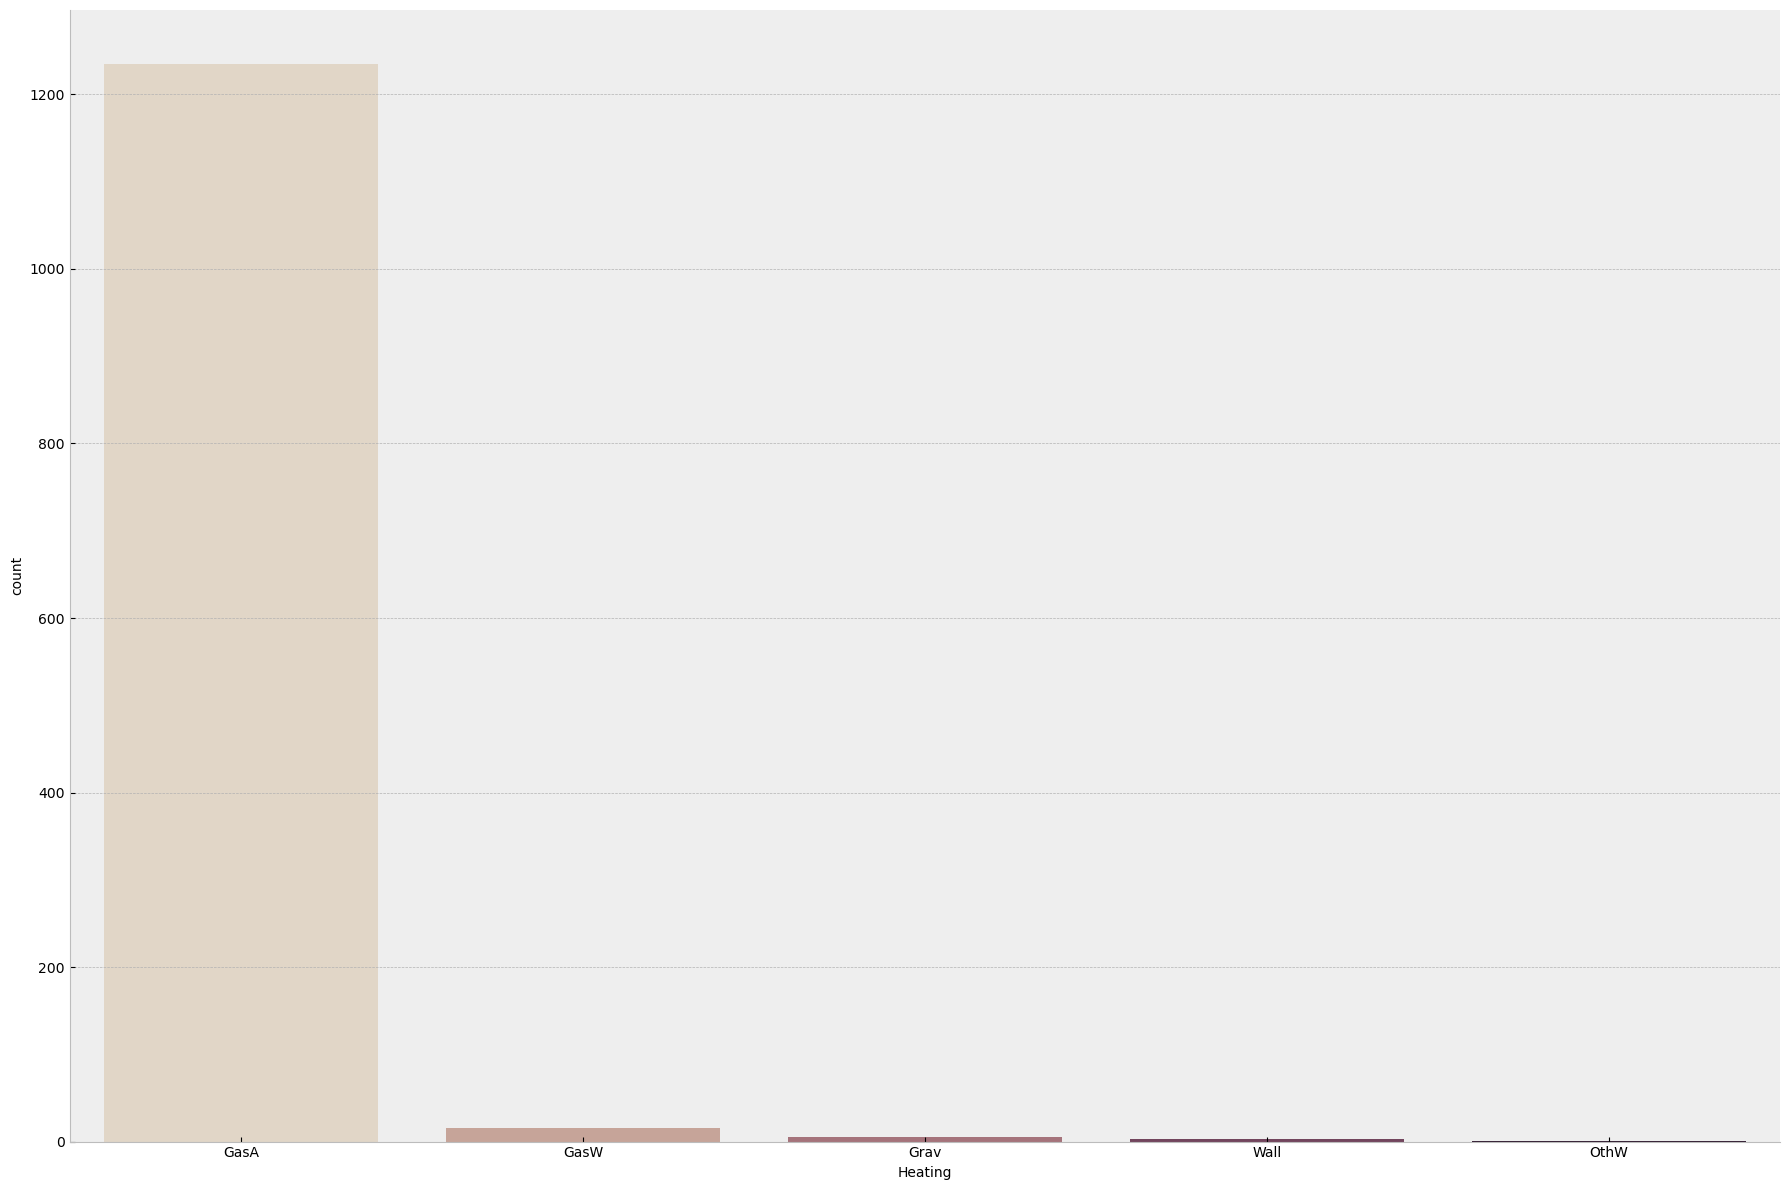

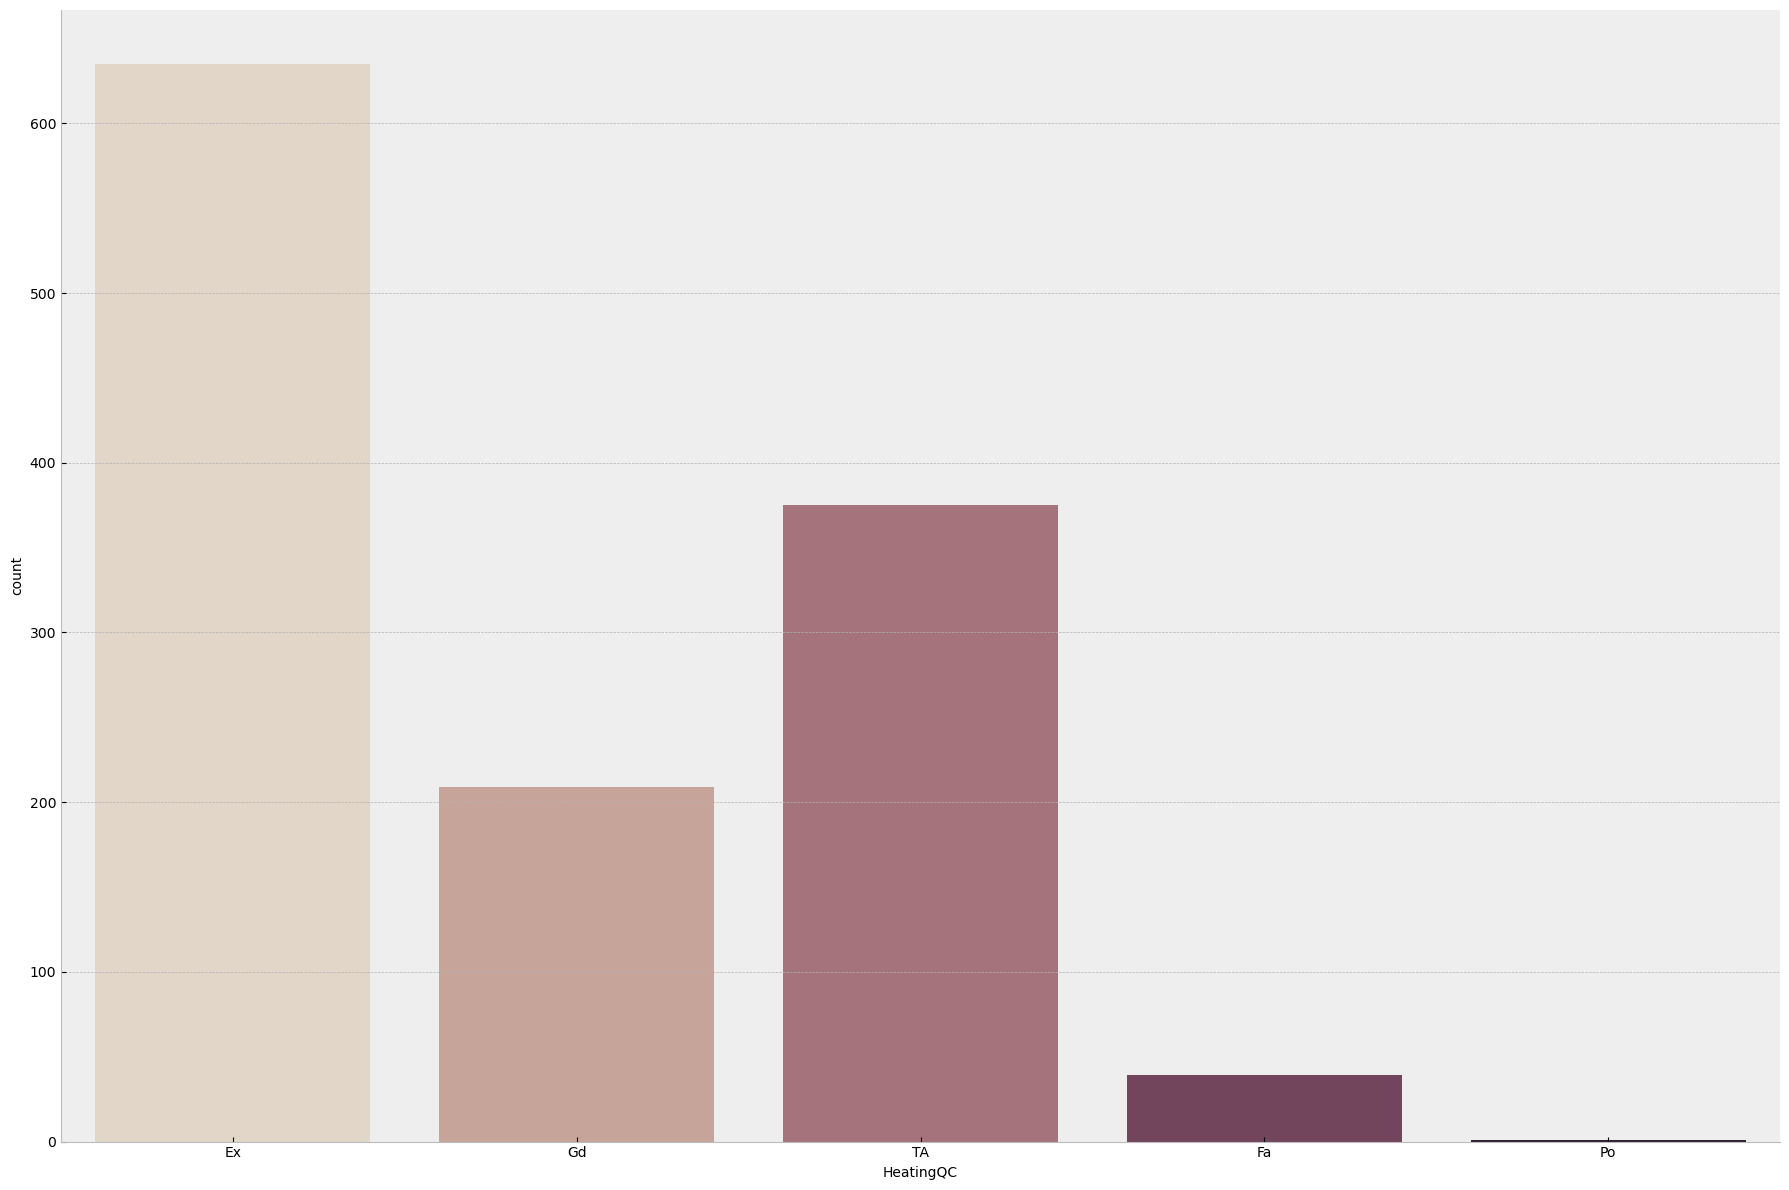

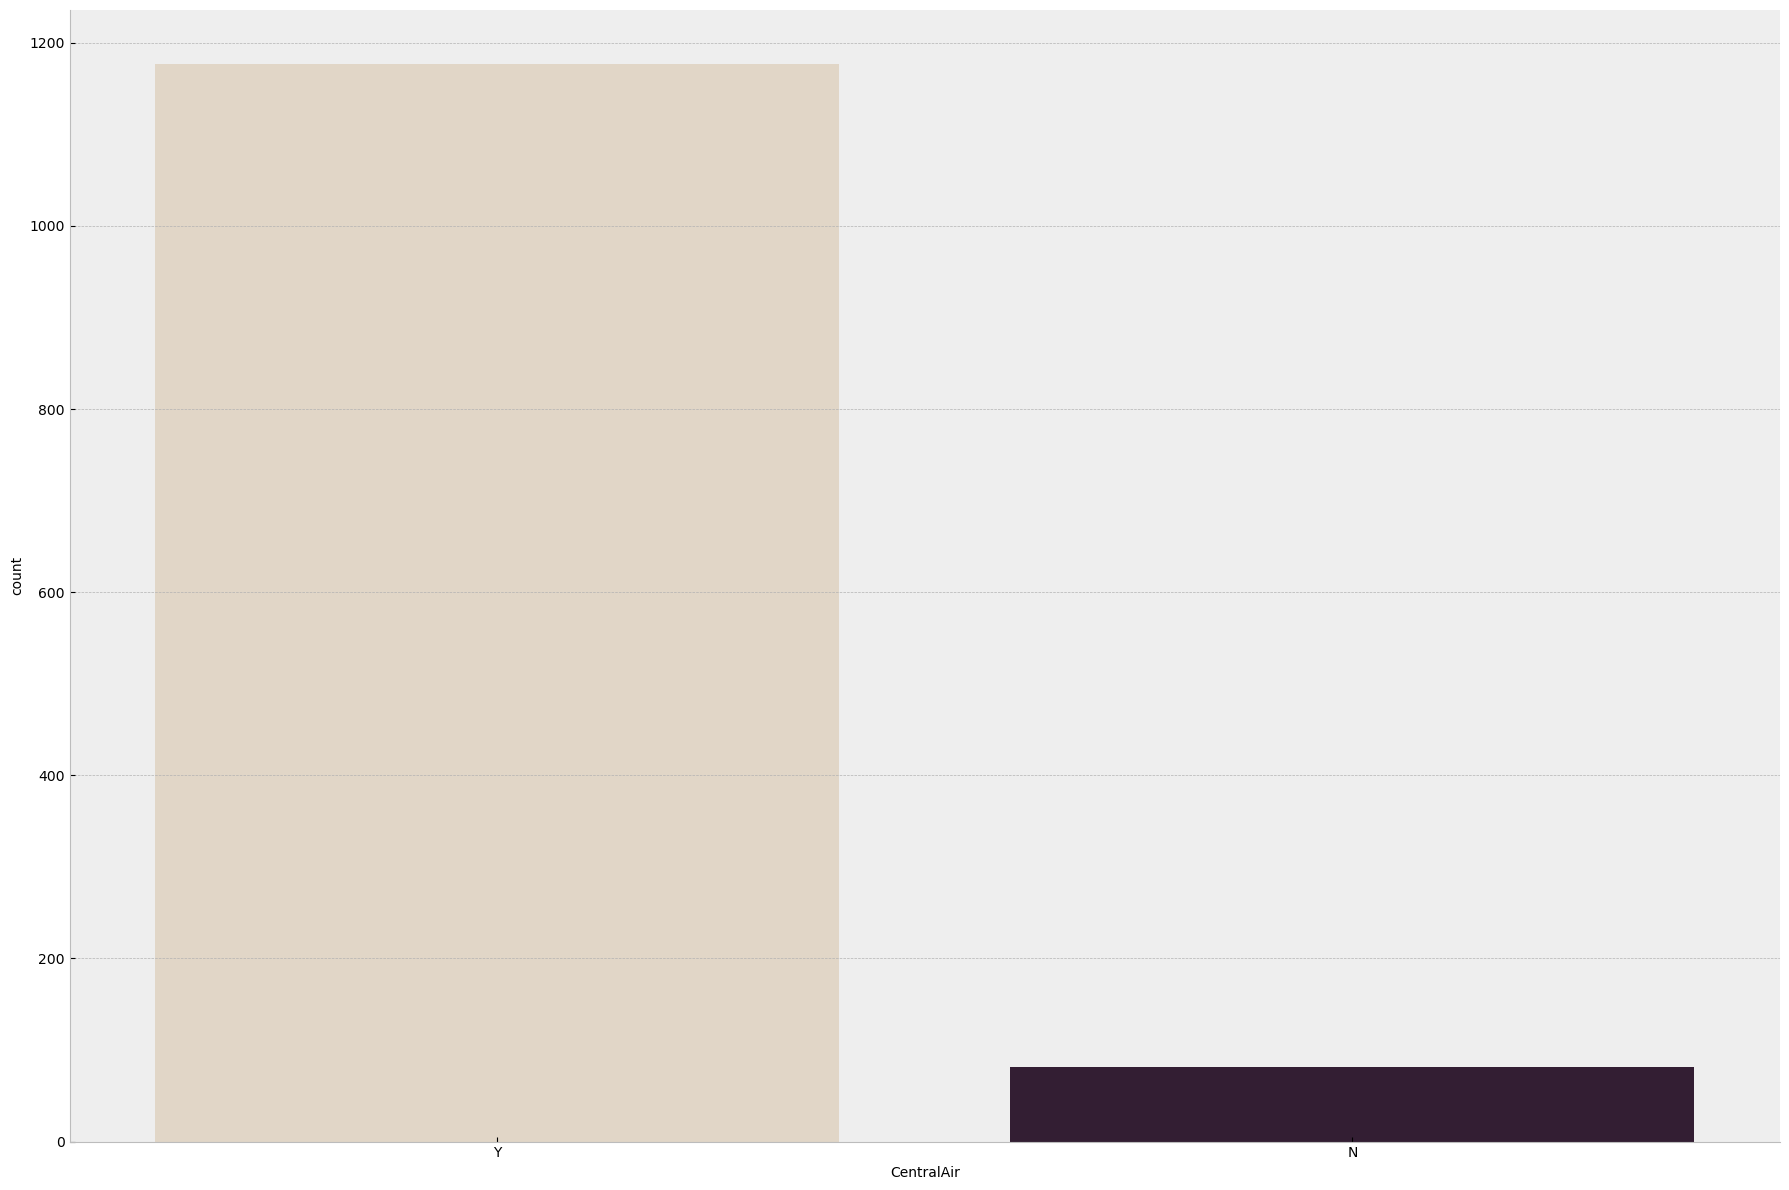

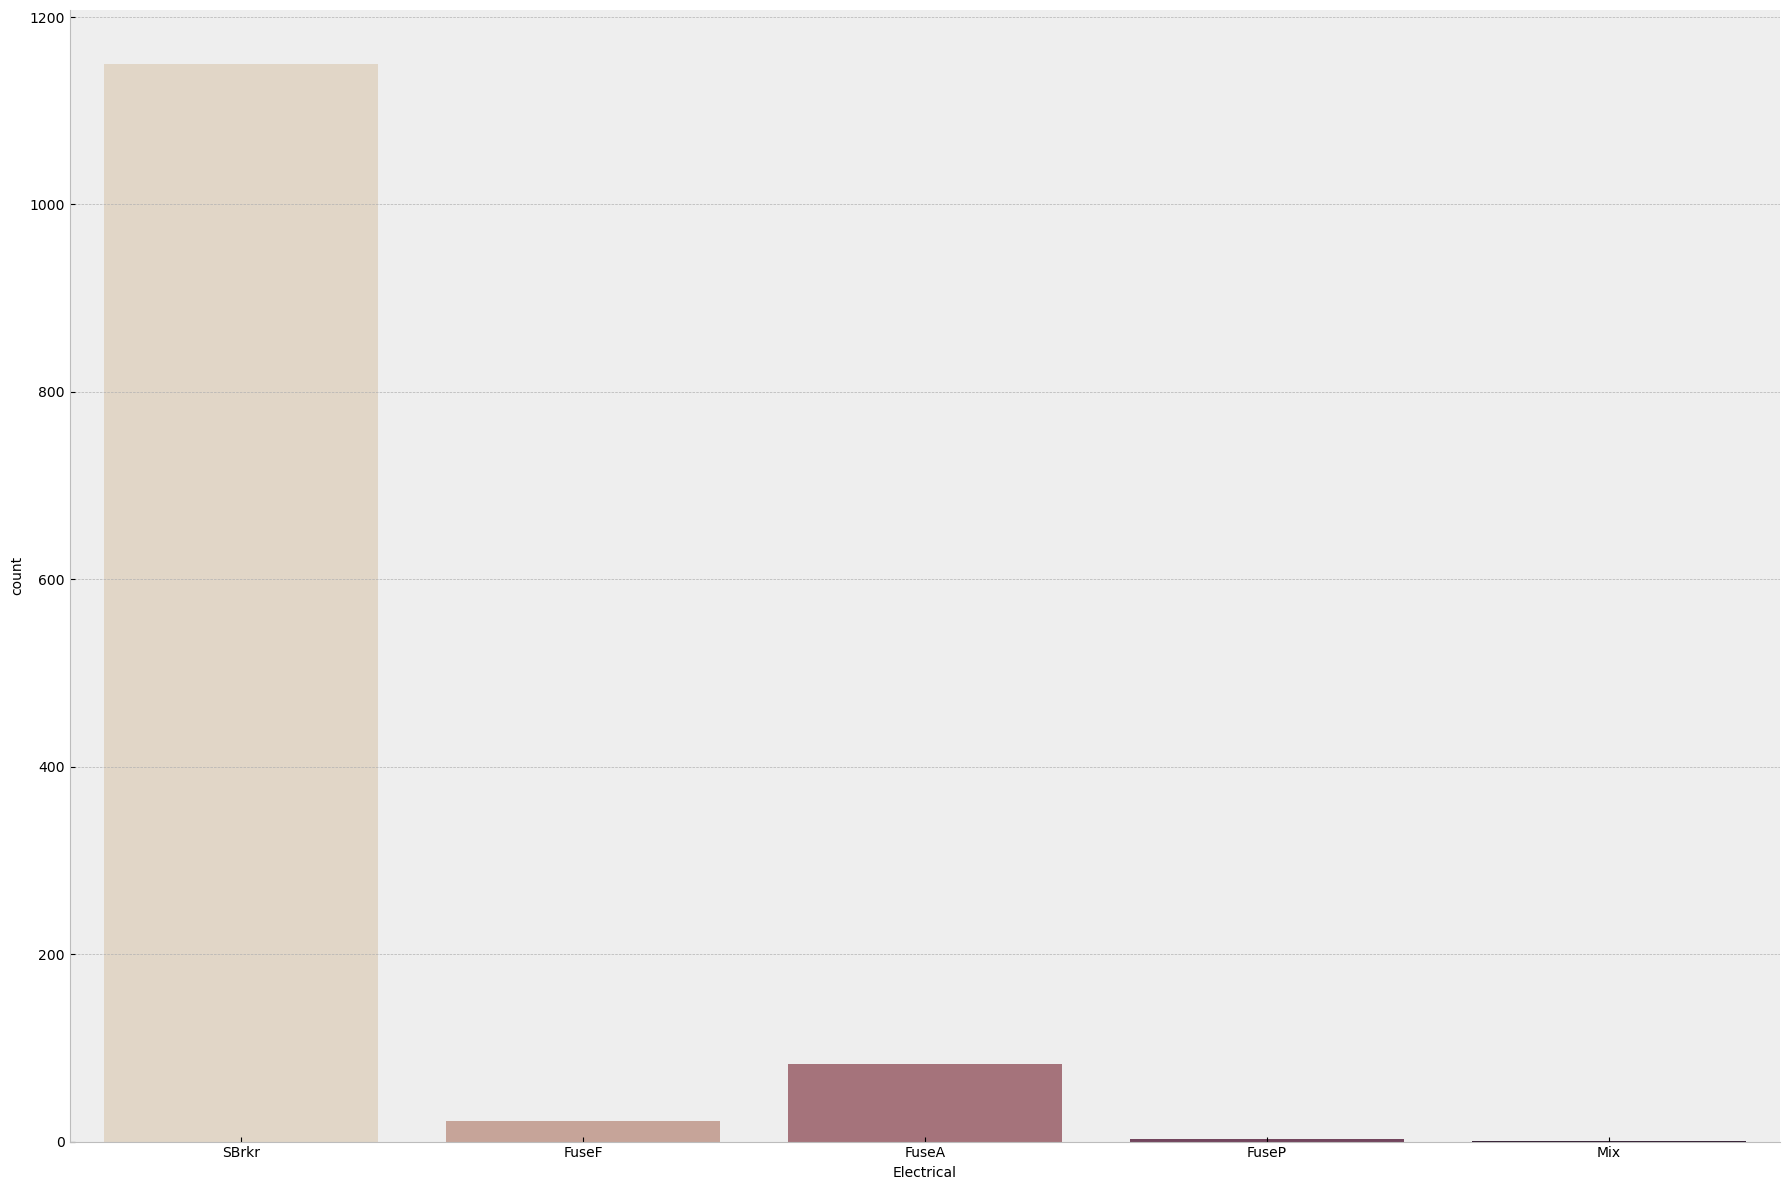

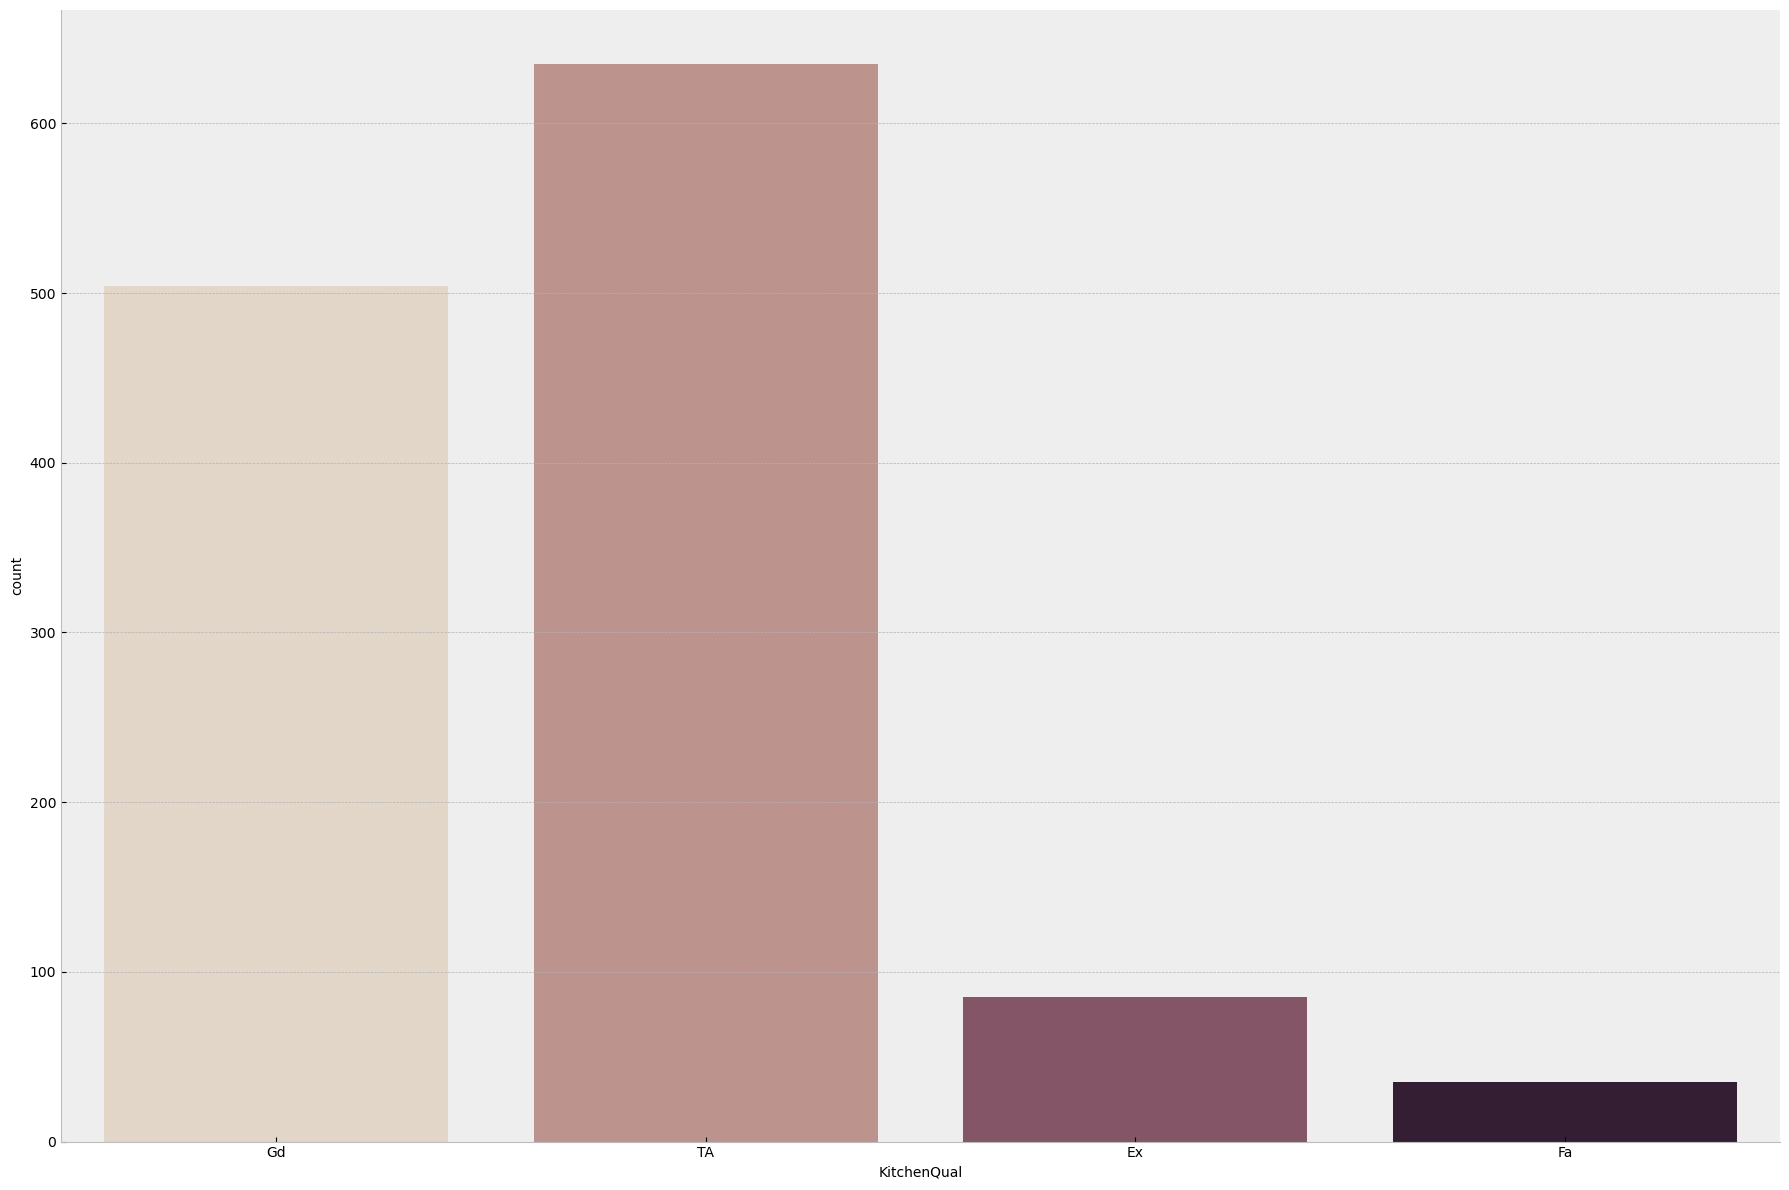

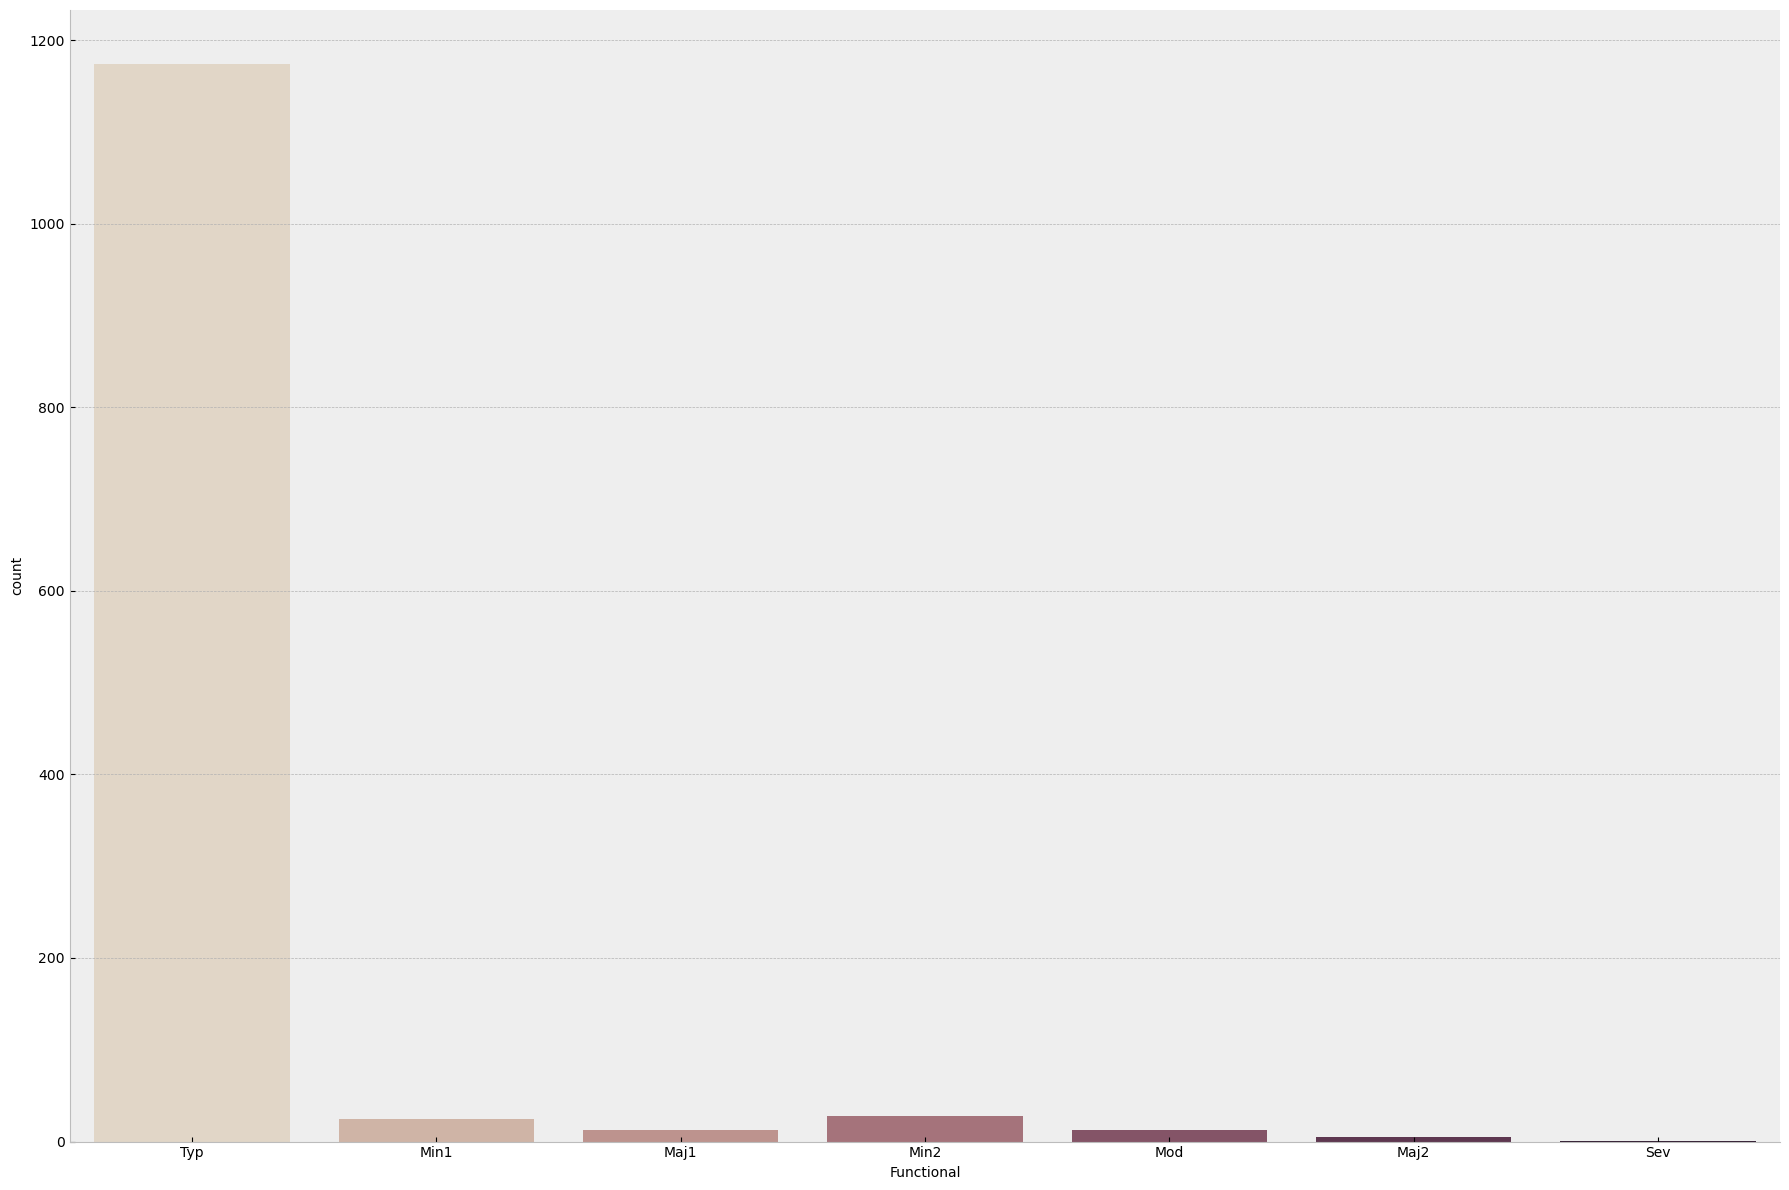

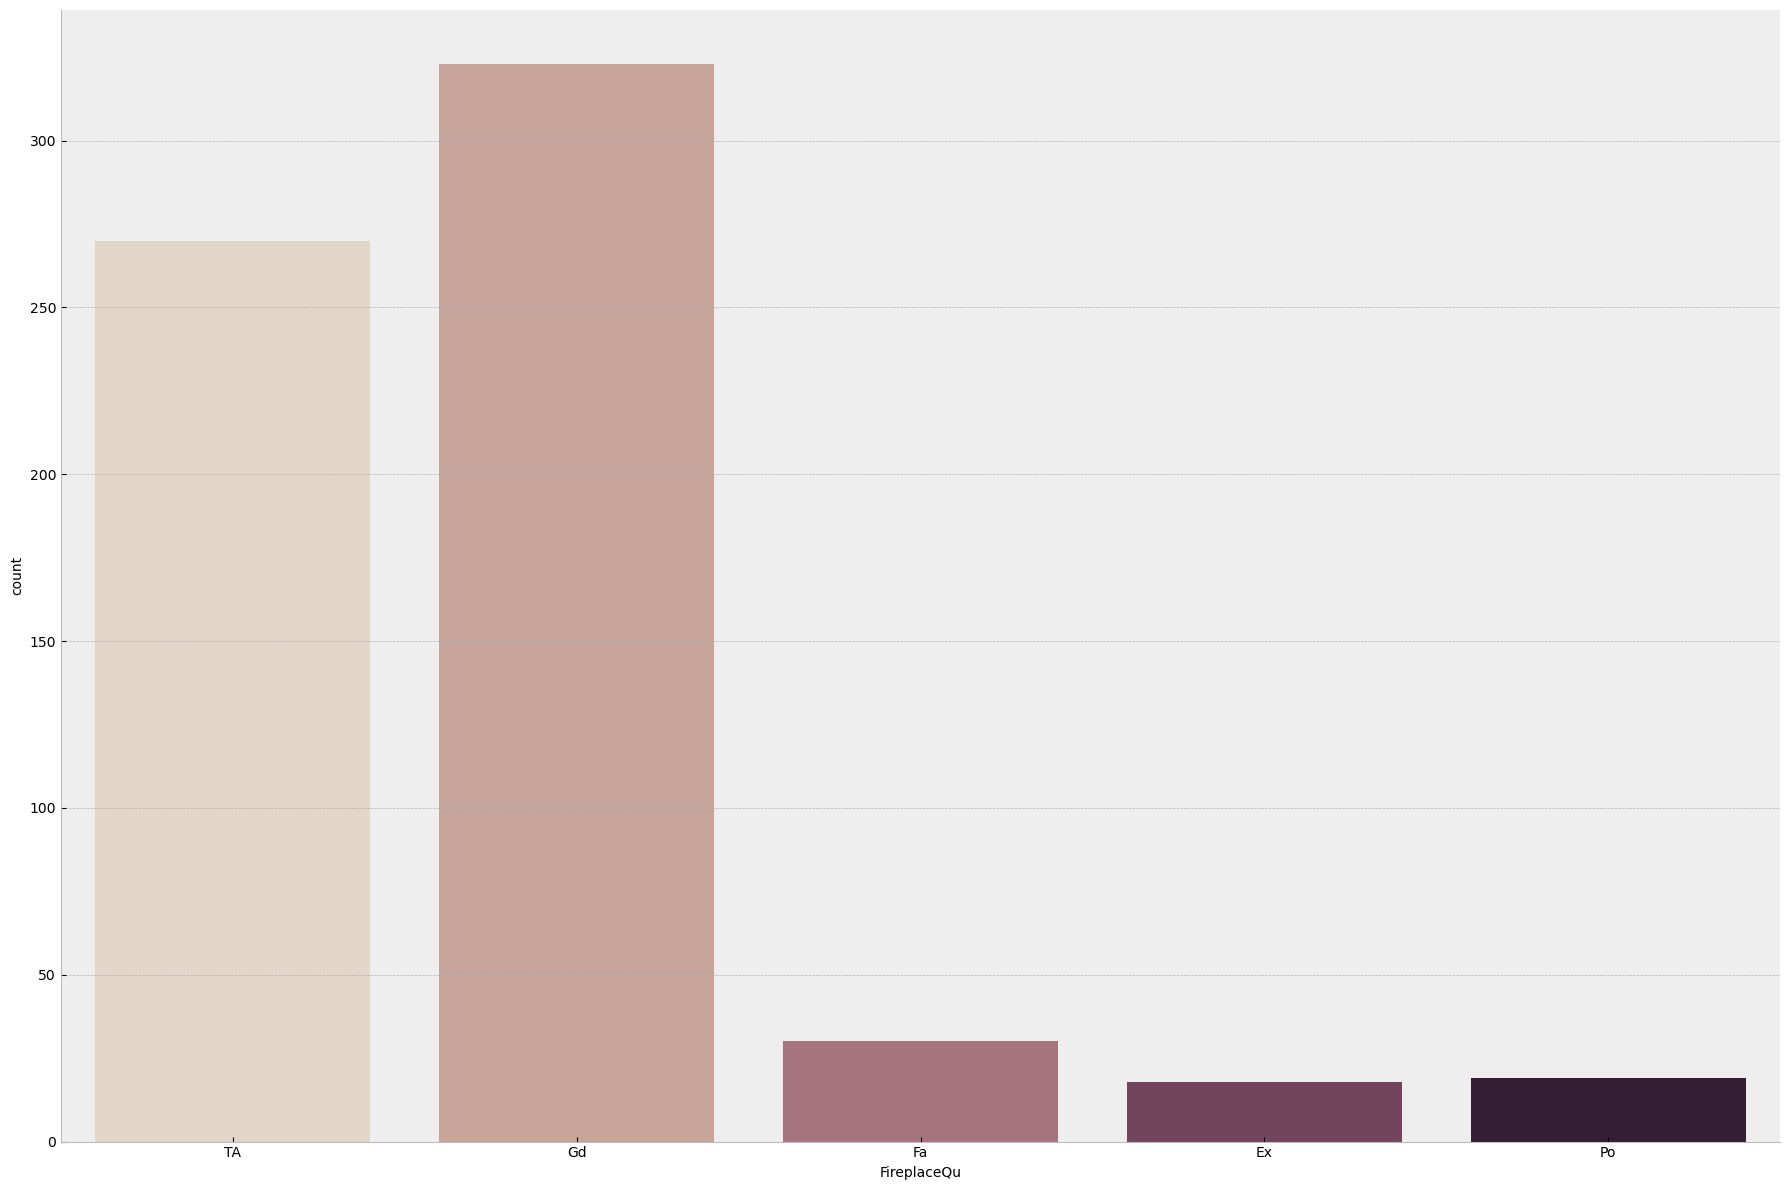

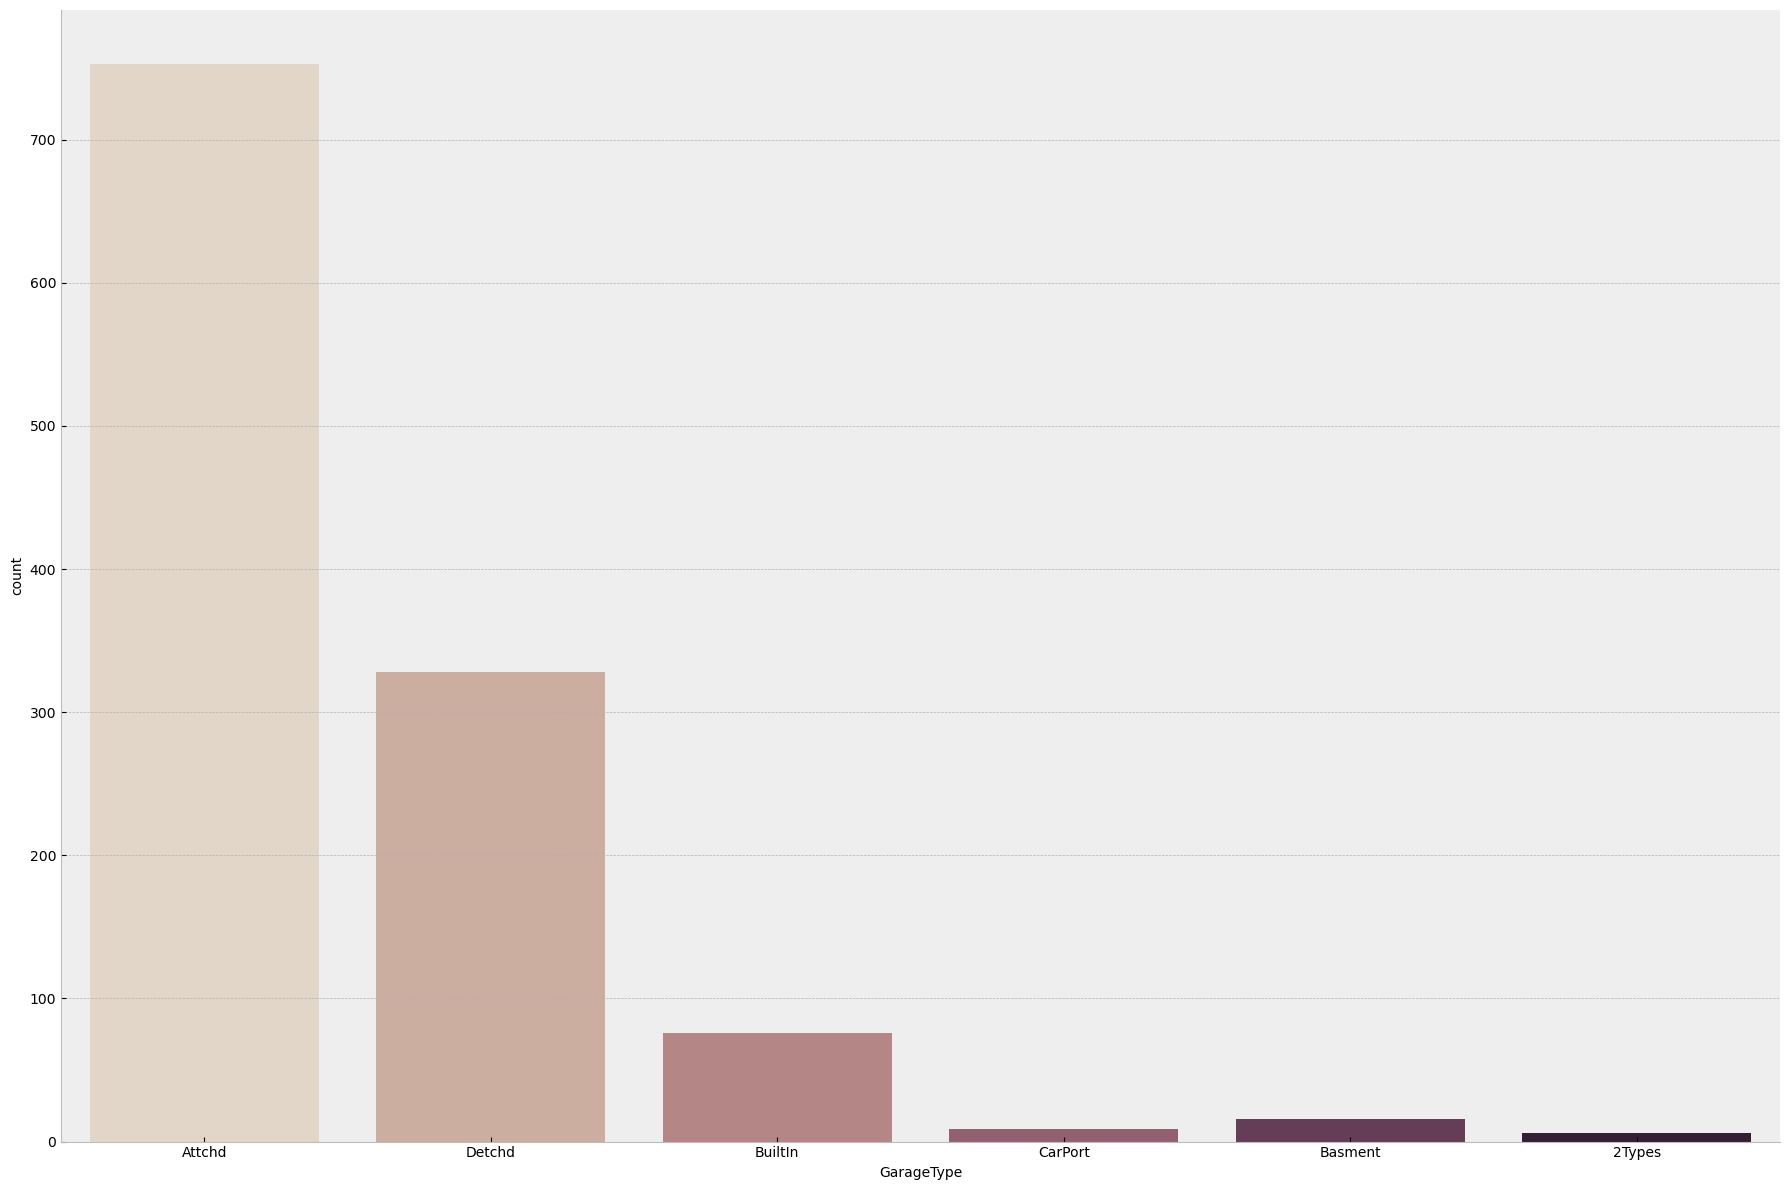

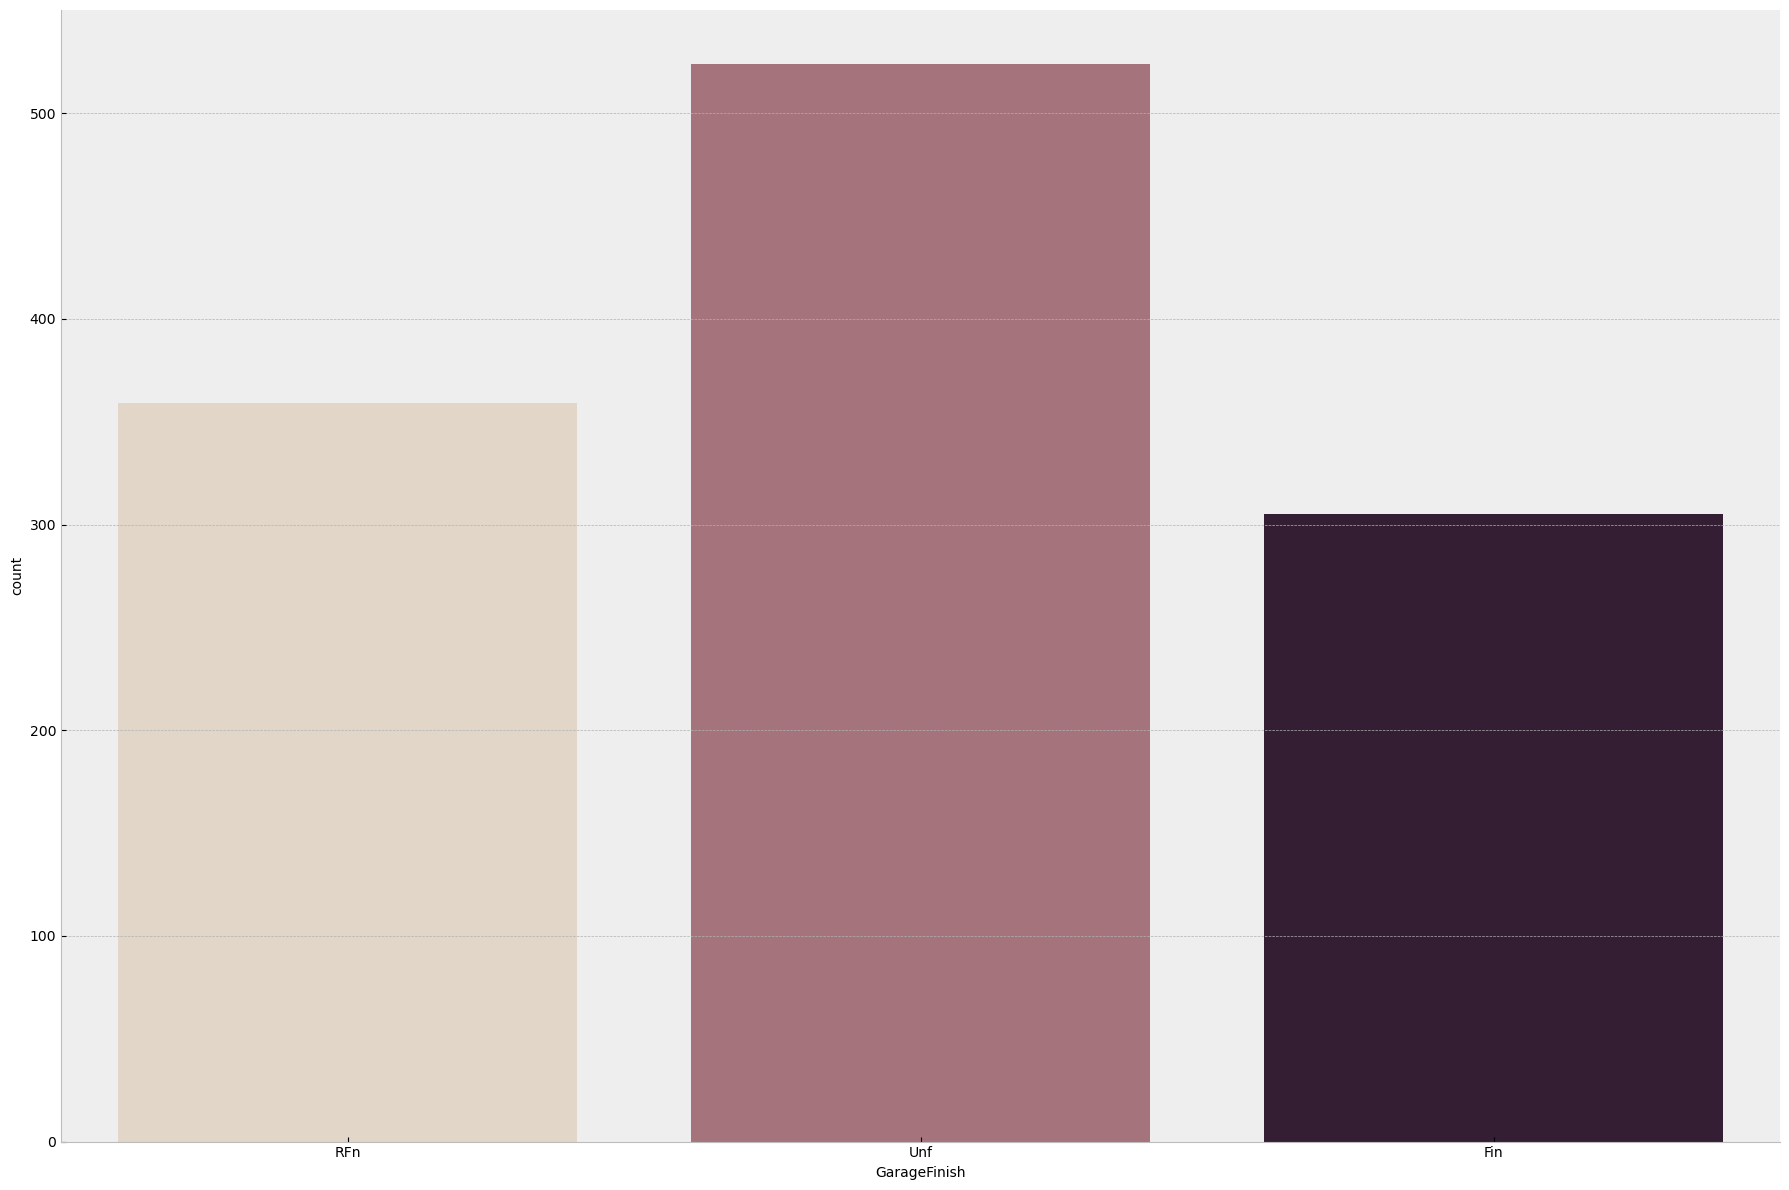

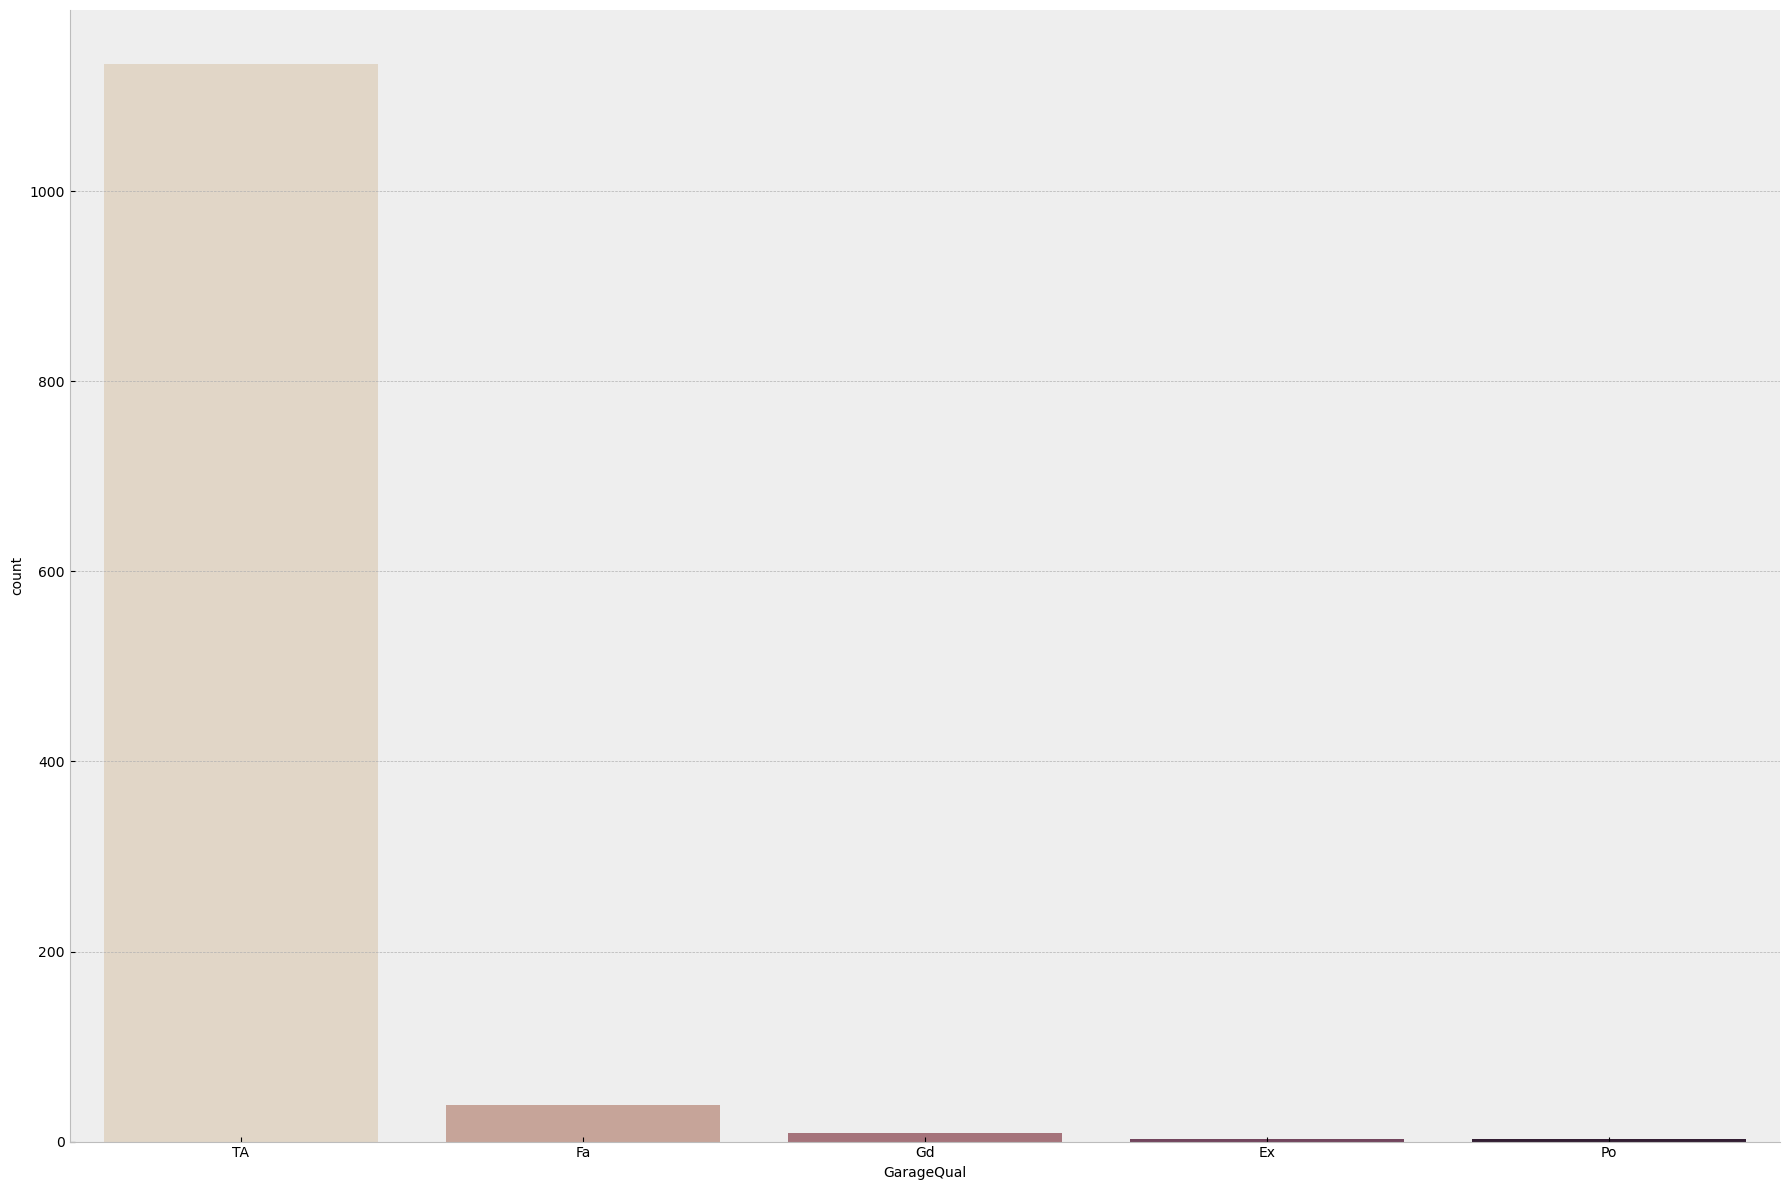

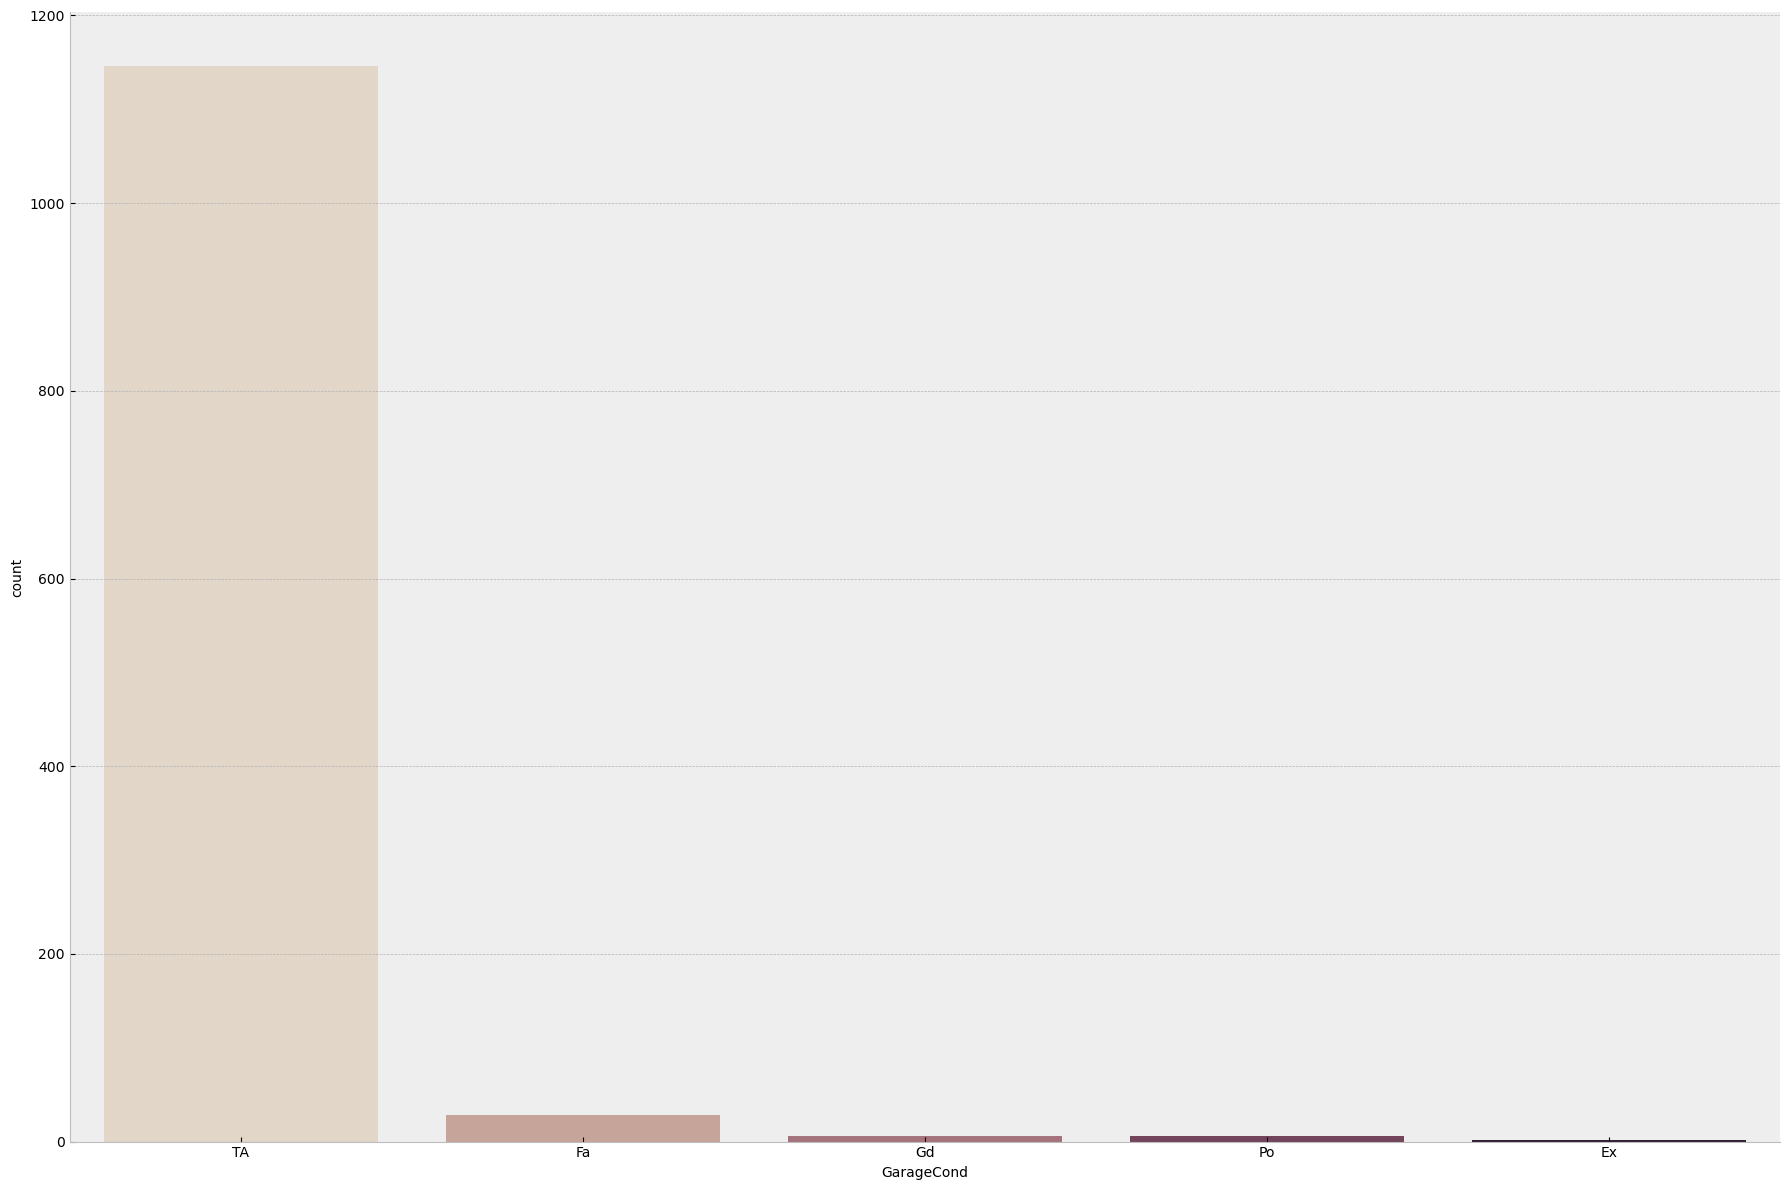

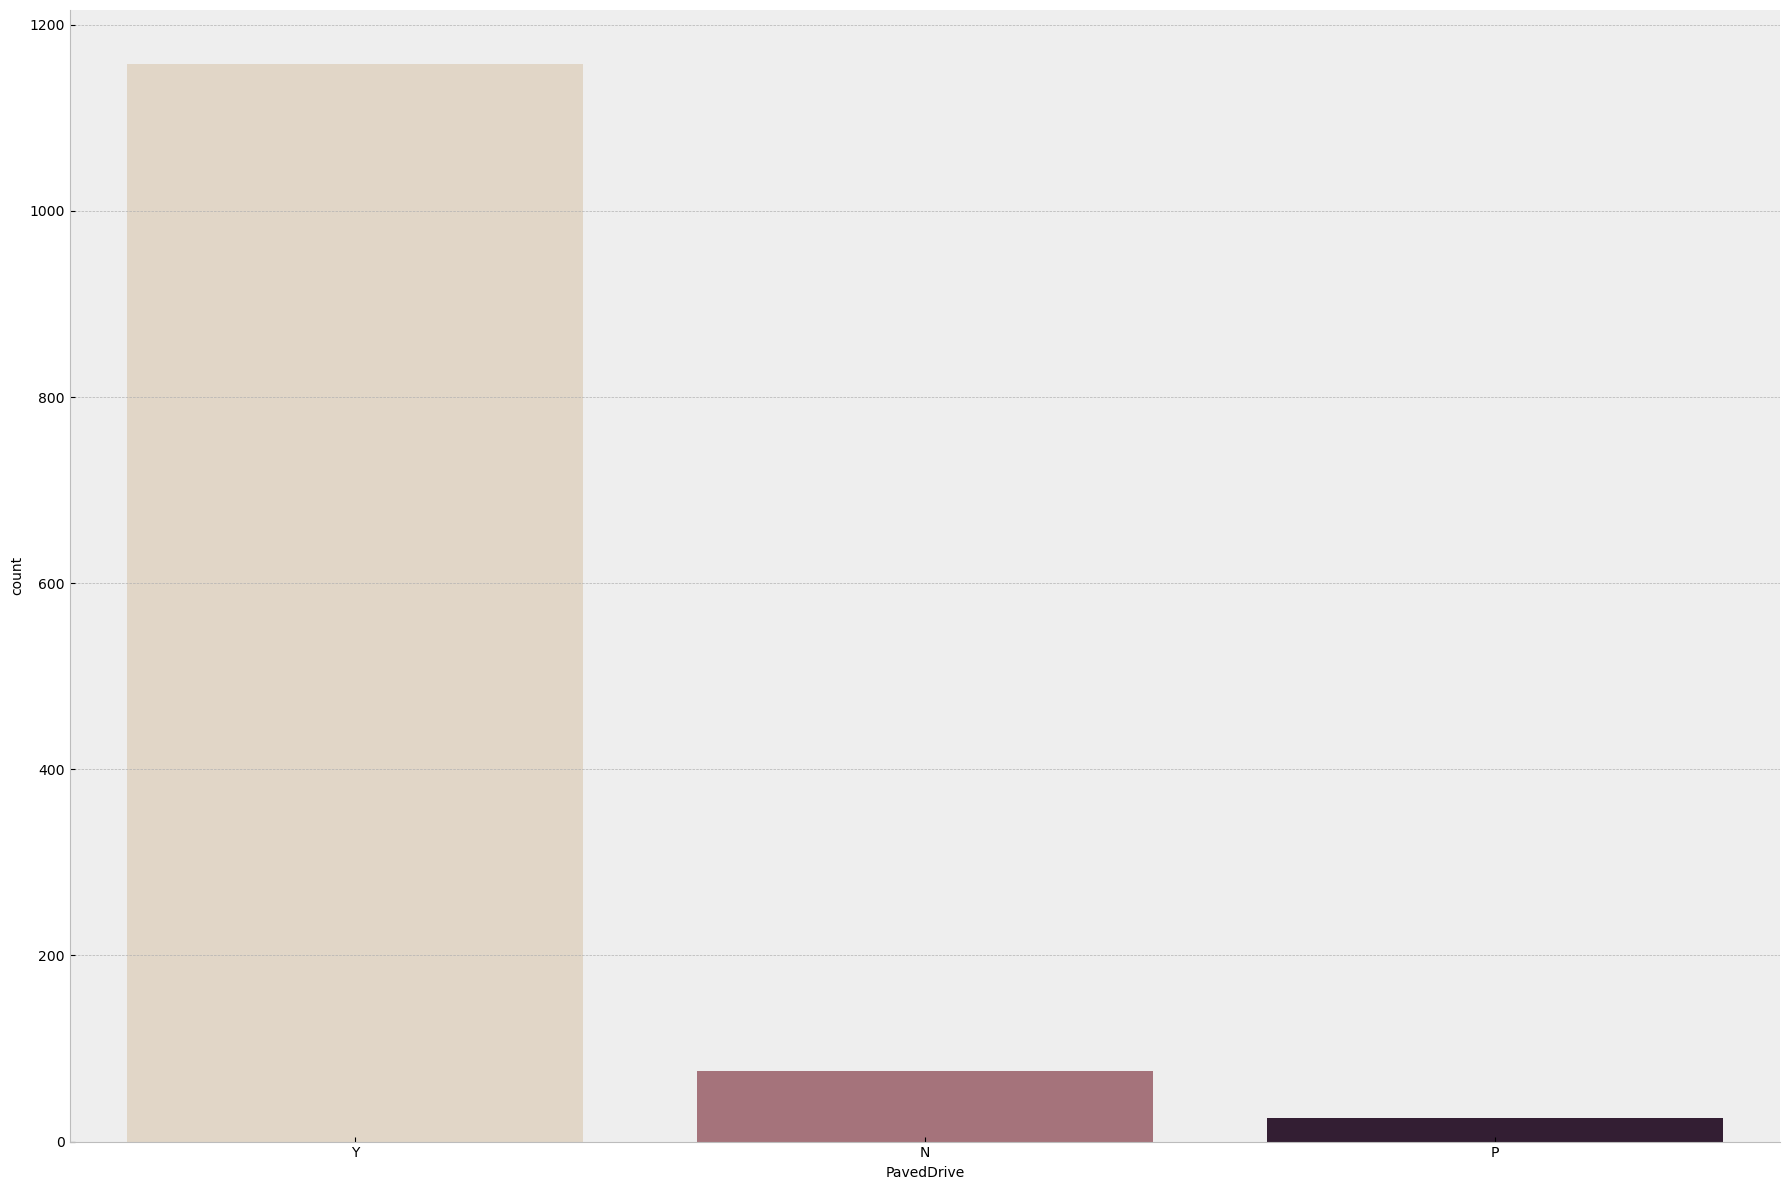

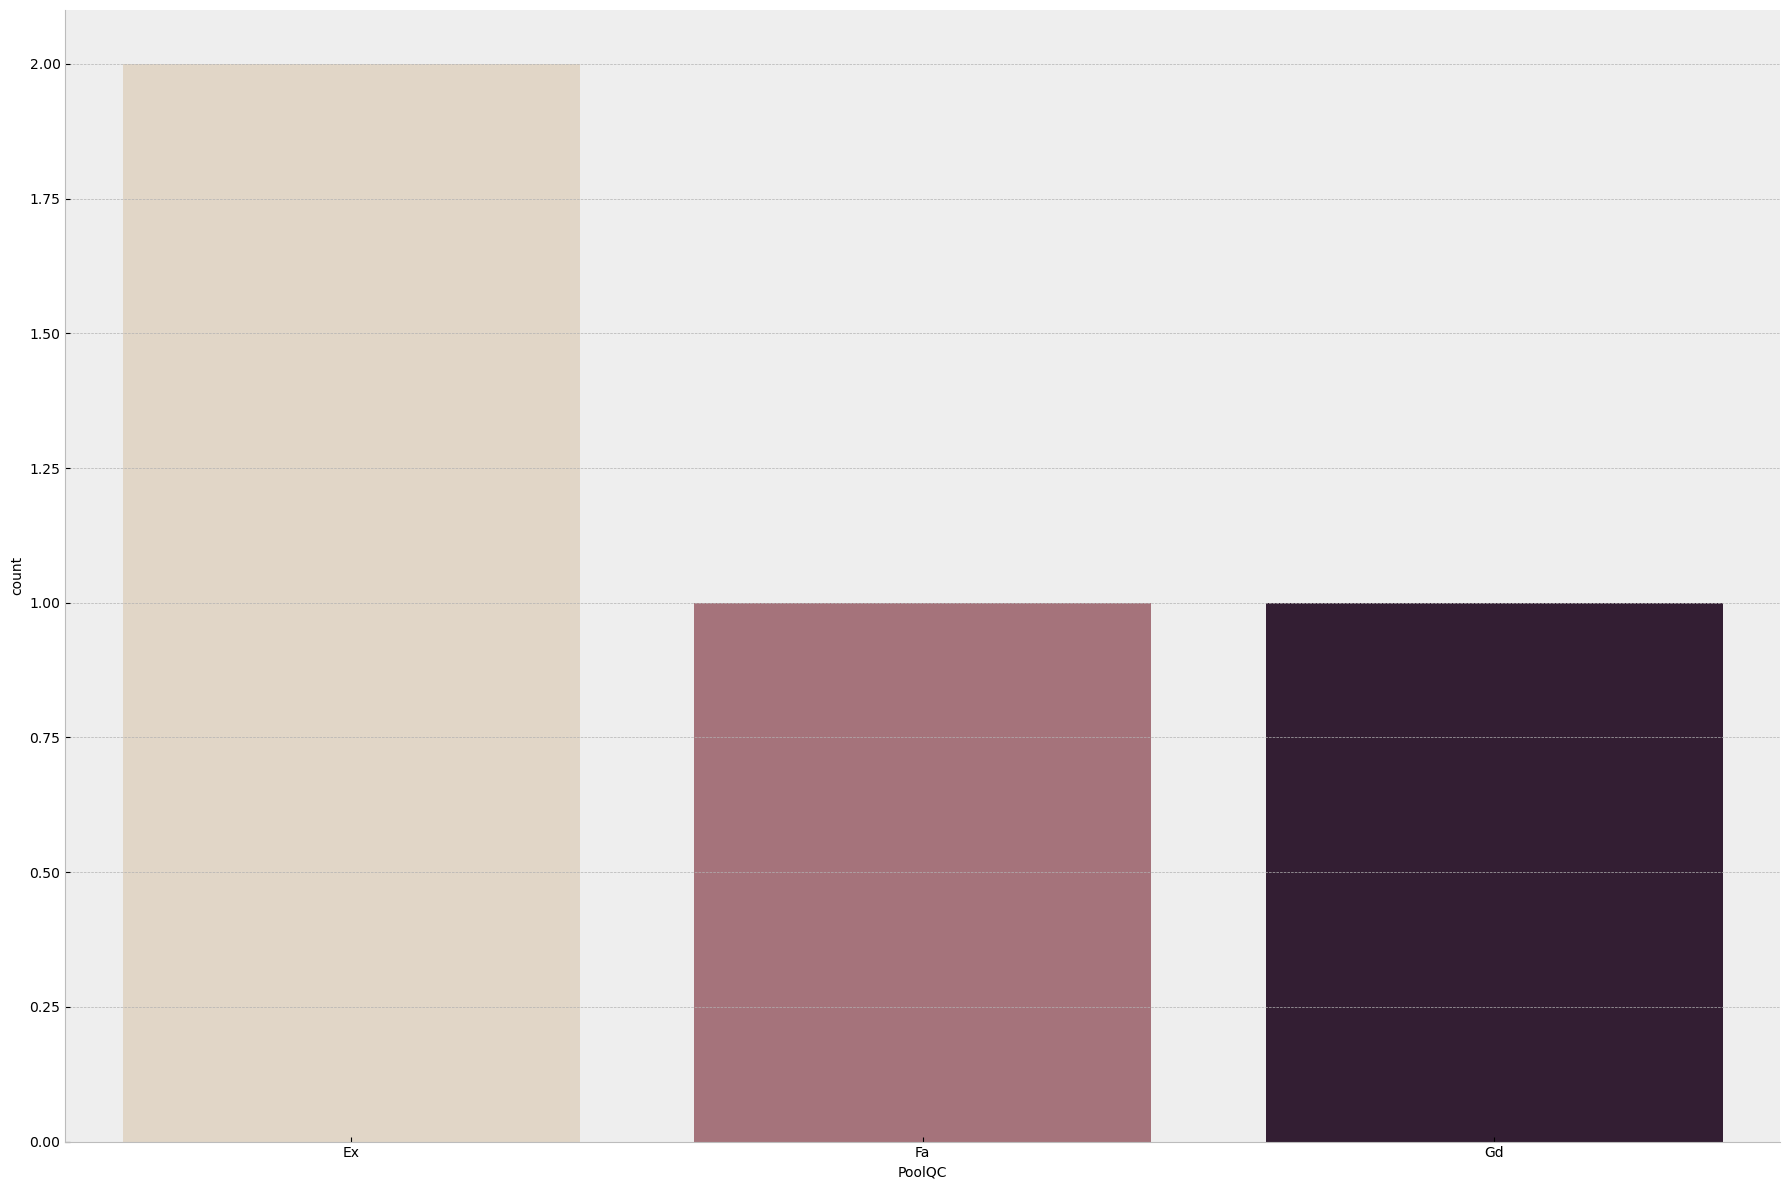

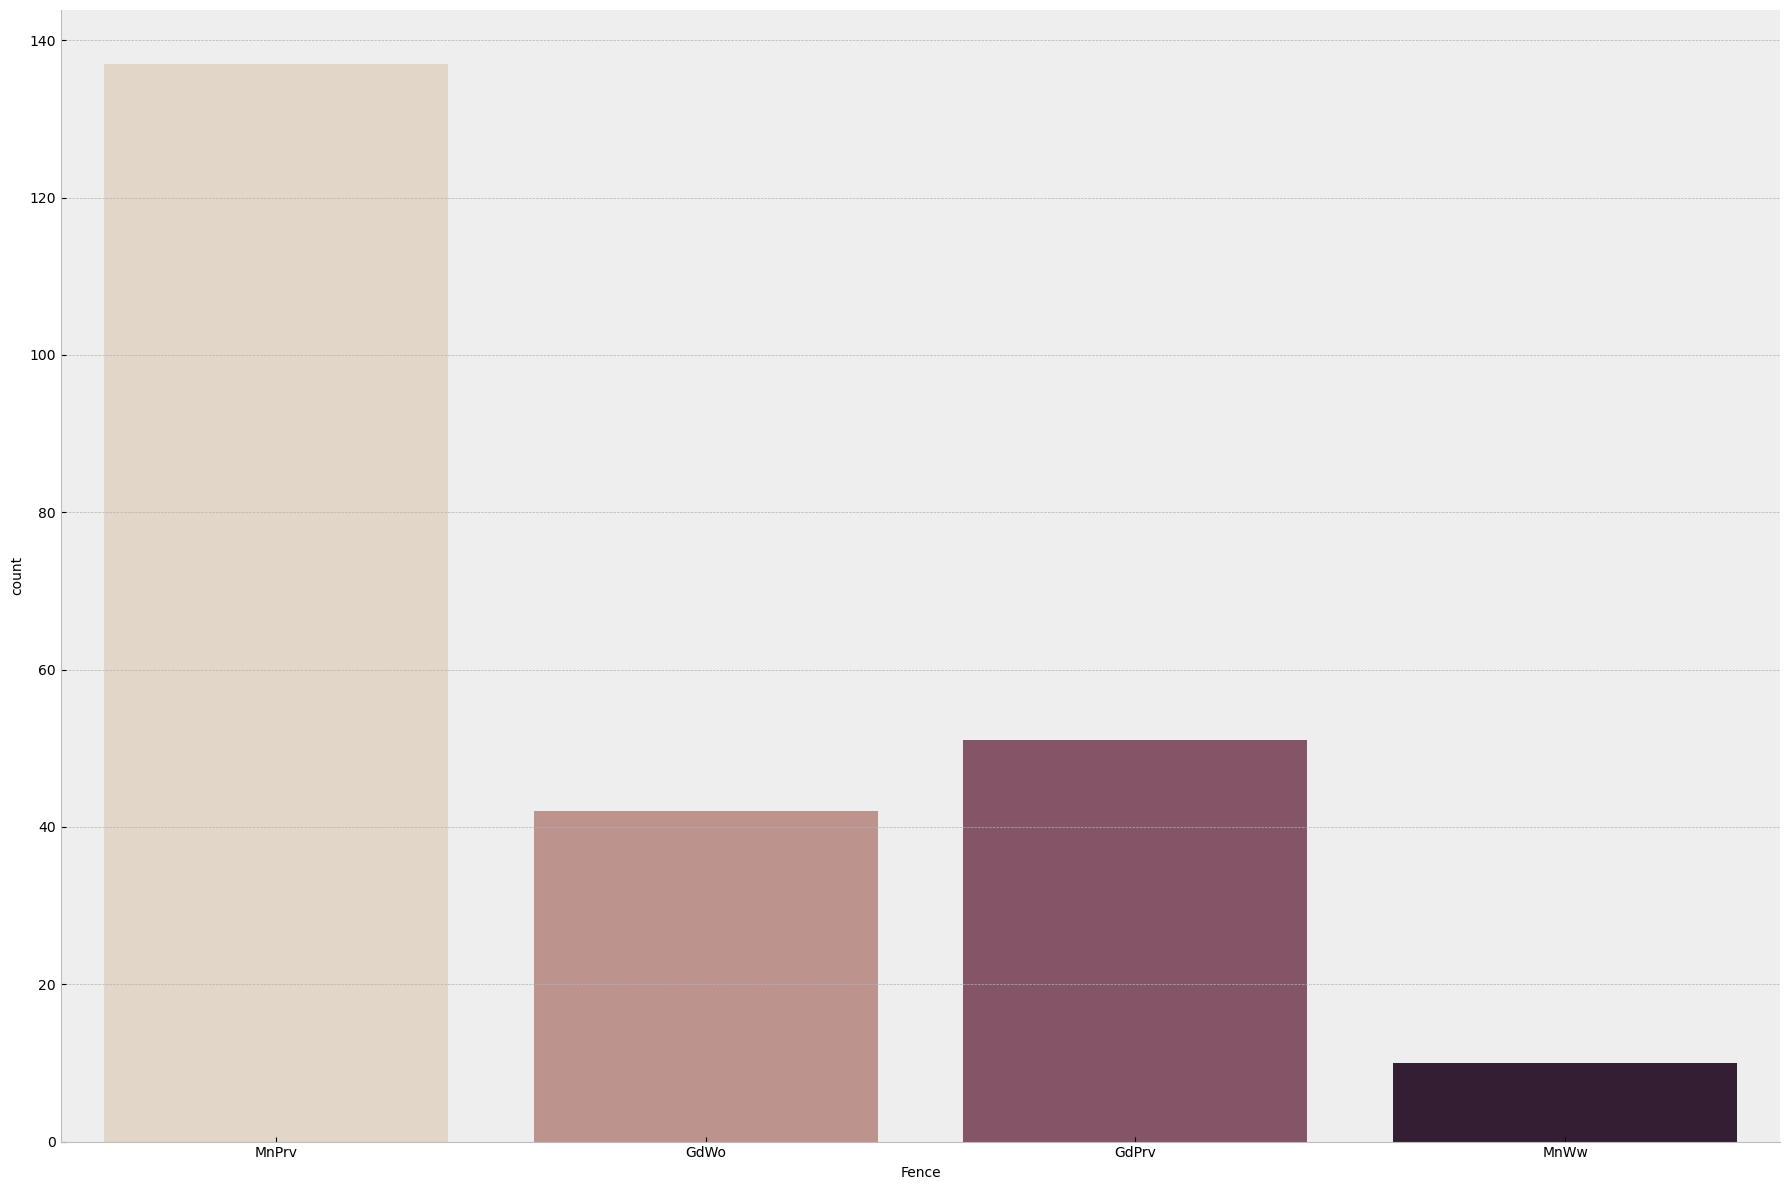

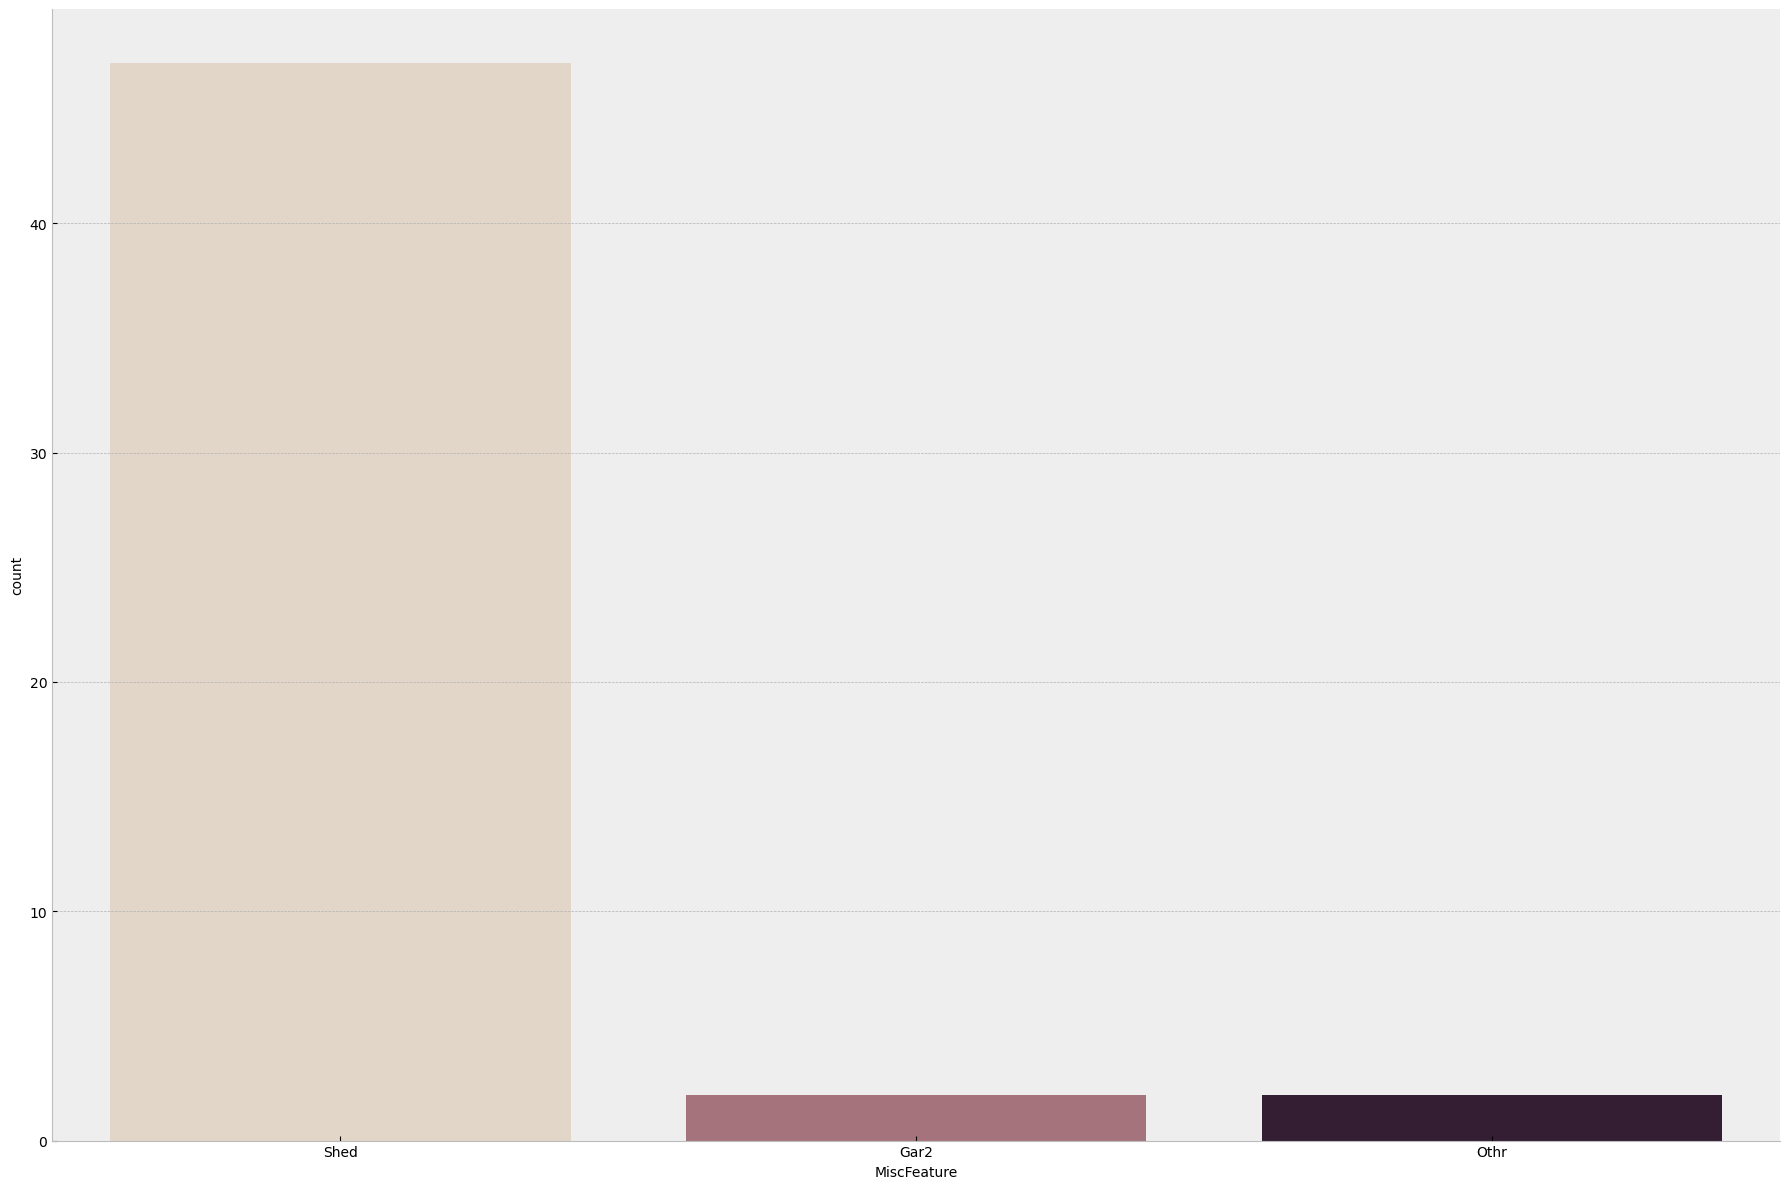

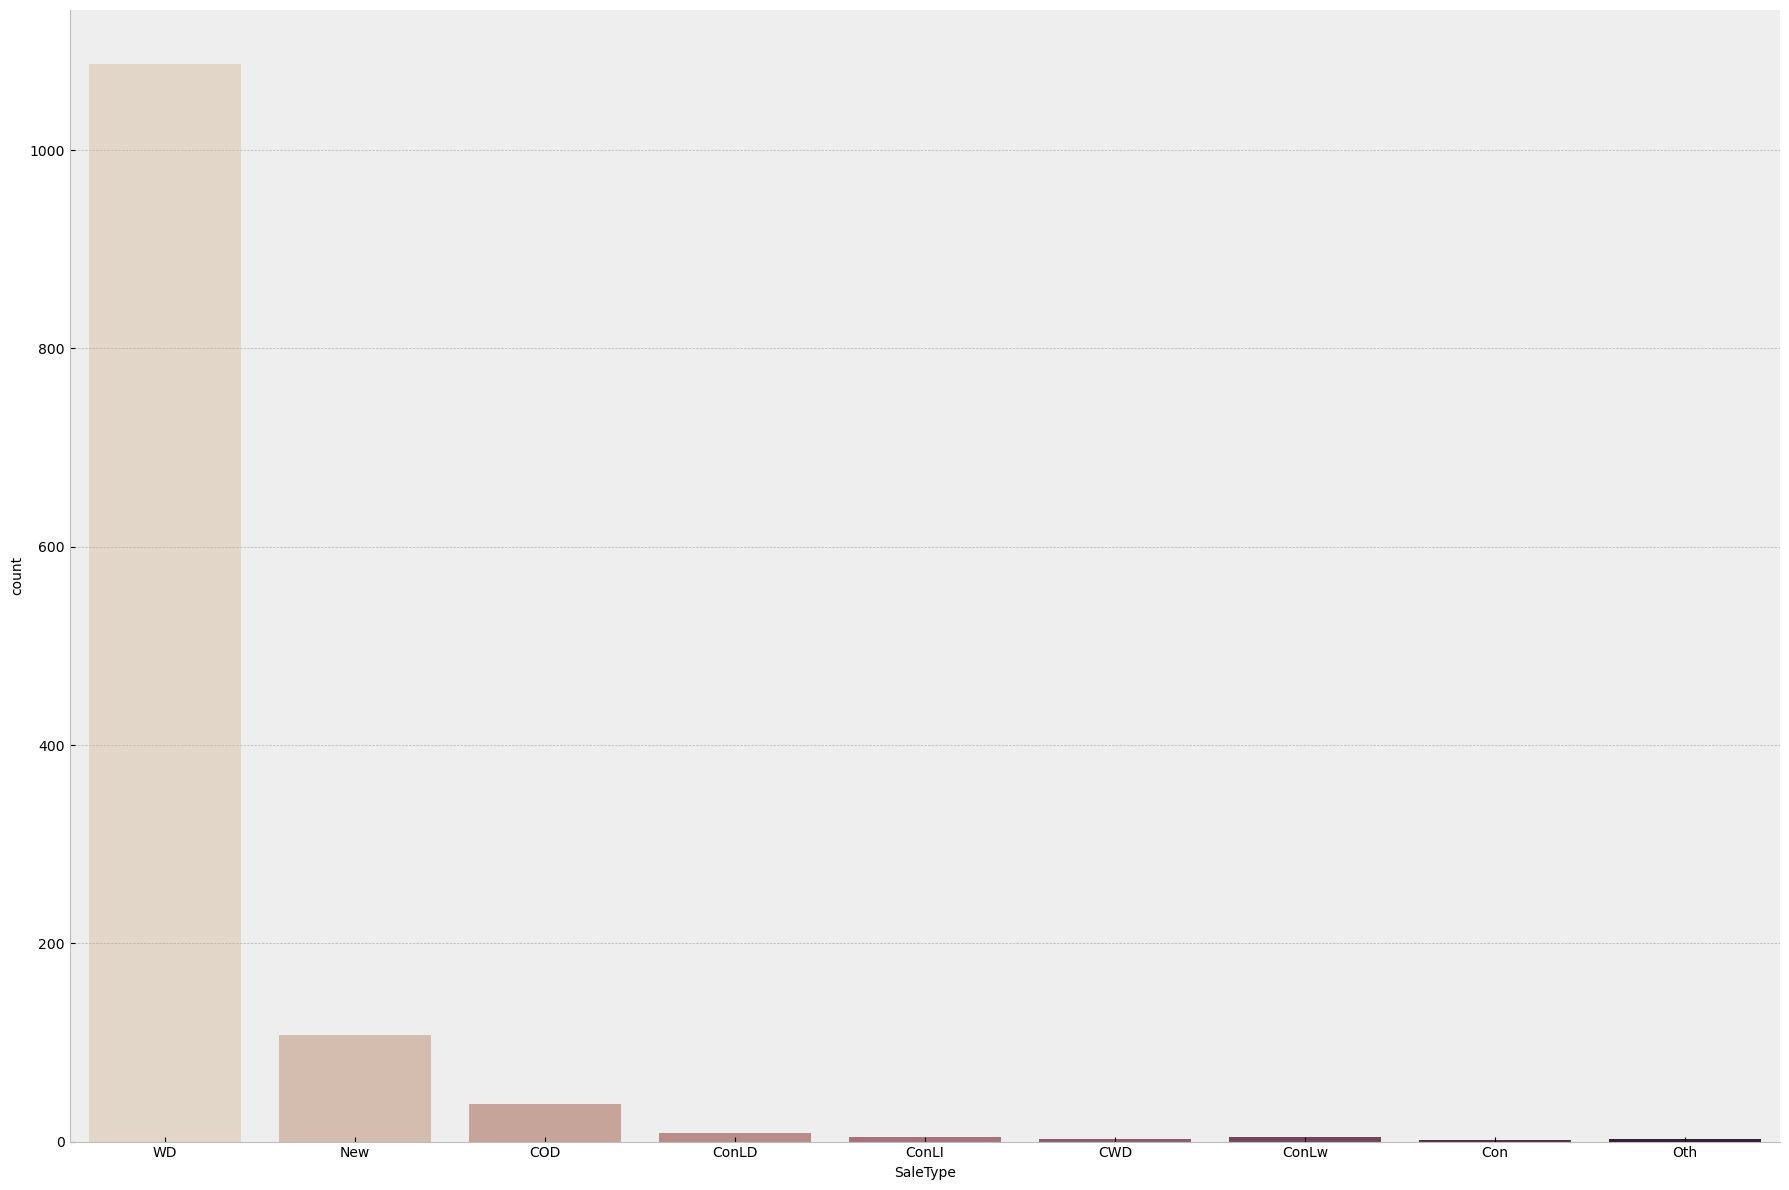

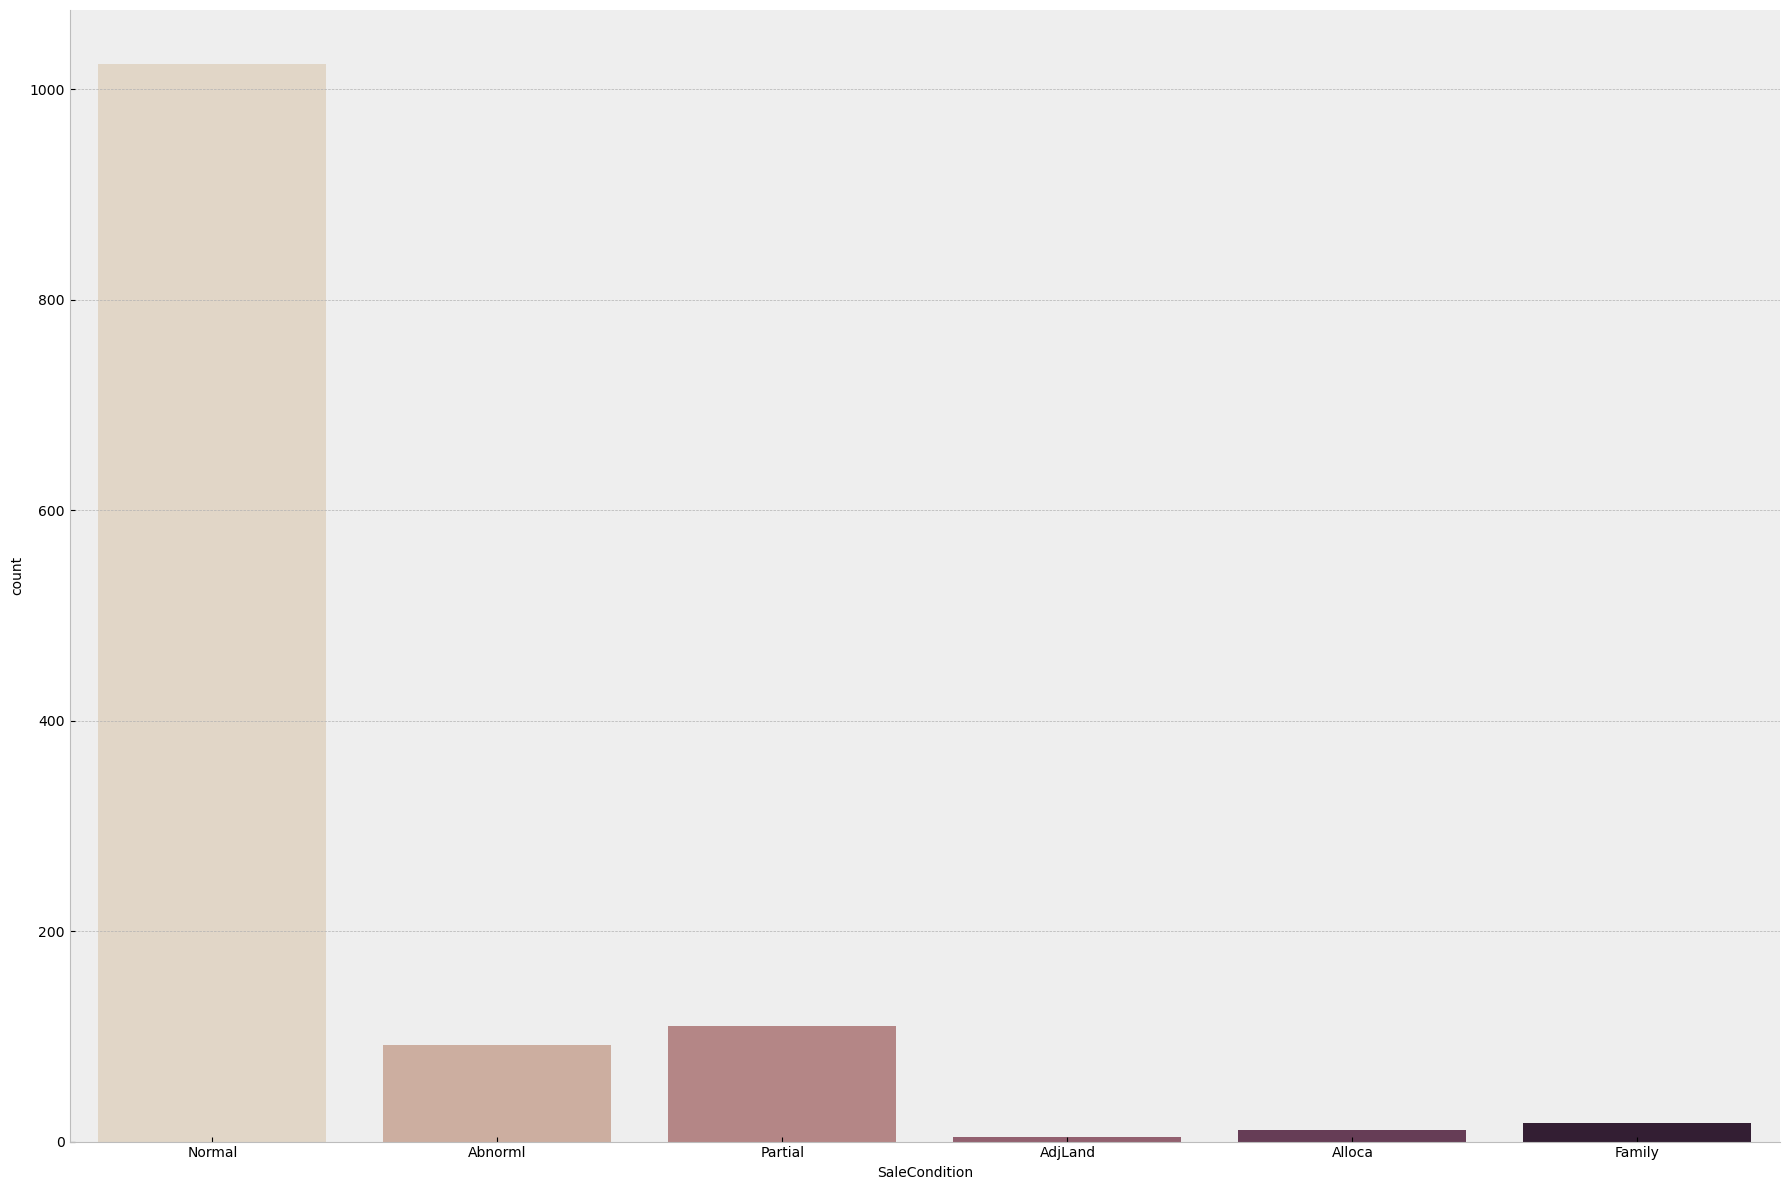

In [14]:
for col in df.select_dtypes('object'):
    sns.catplot(data=df, x=col, kind="count" , palette="ch:.25" ,height=12, aspect=1.5)

##### Conclusions : 

- from the previous plots i realised that most of the houses where sold in the NAmes neighbourhood

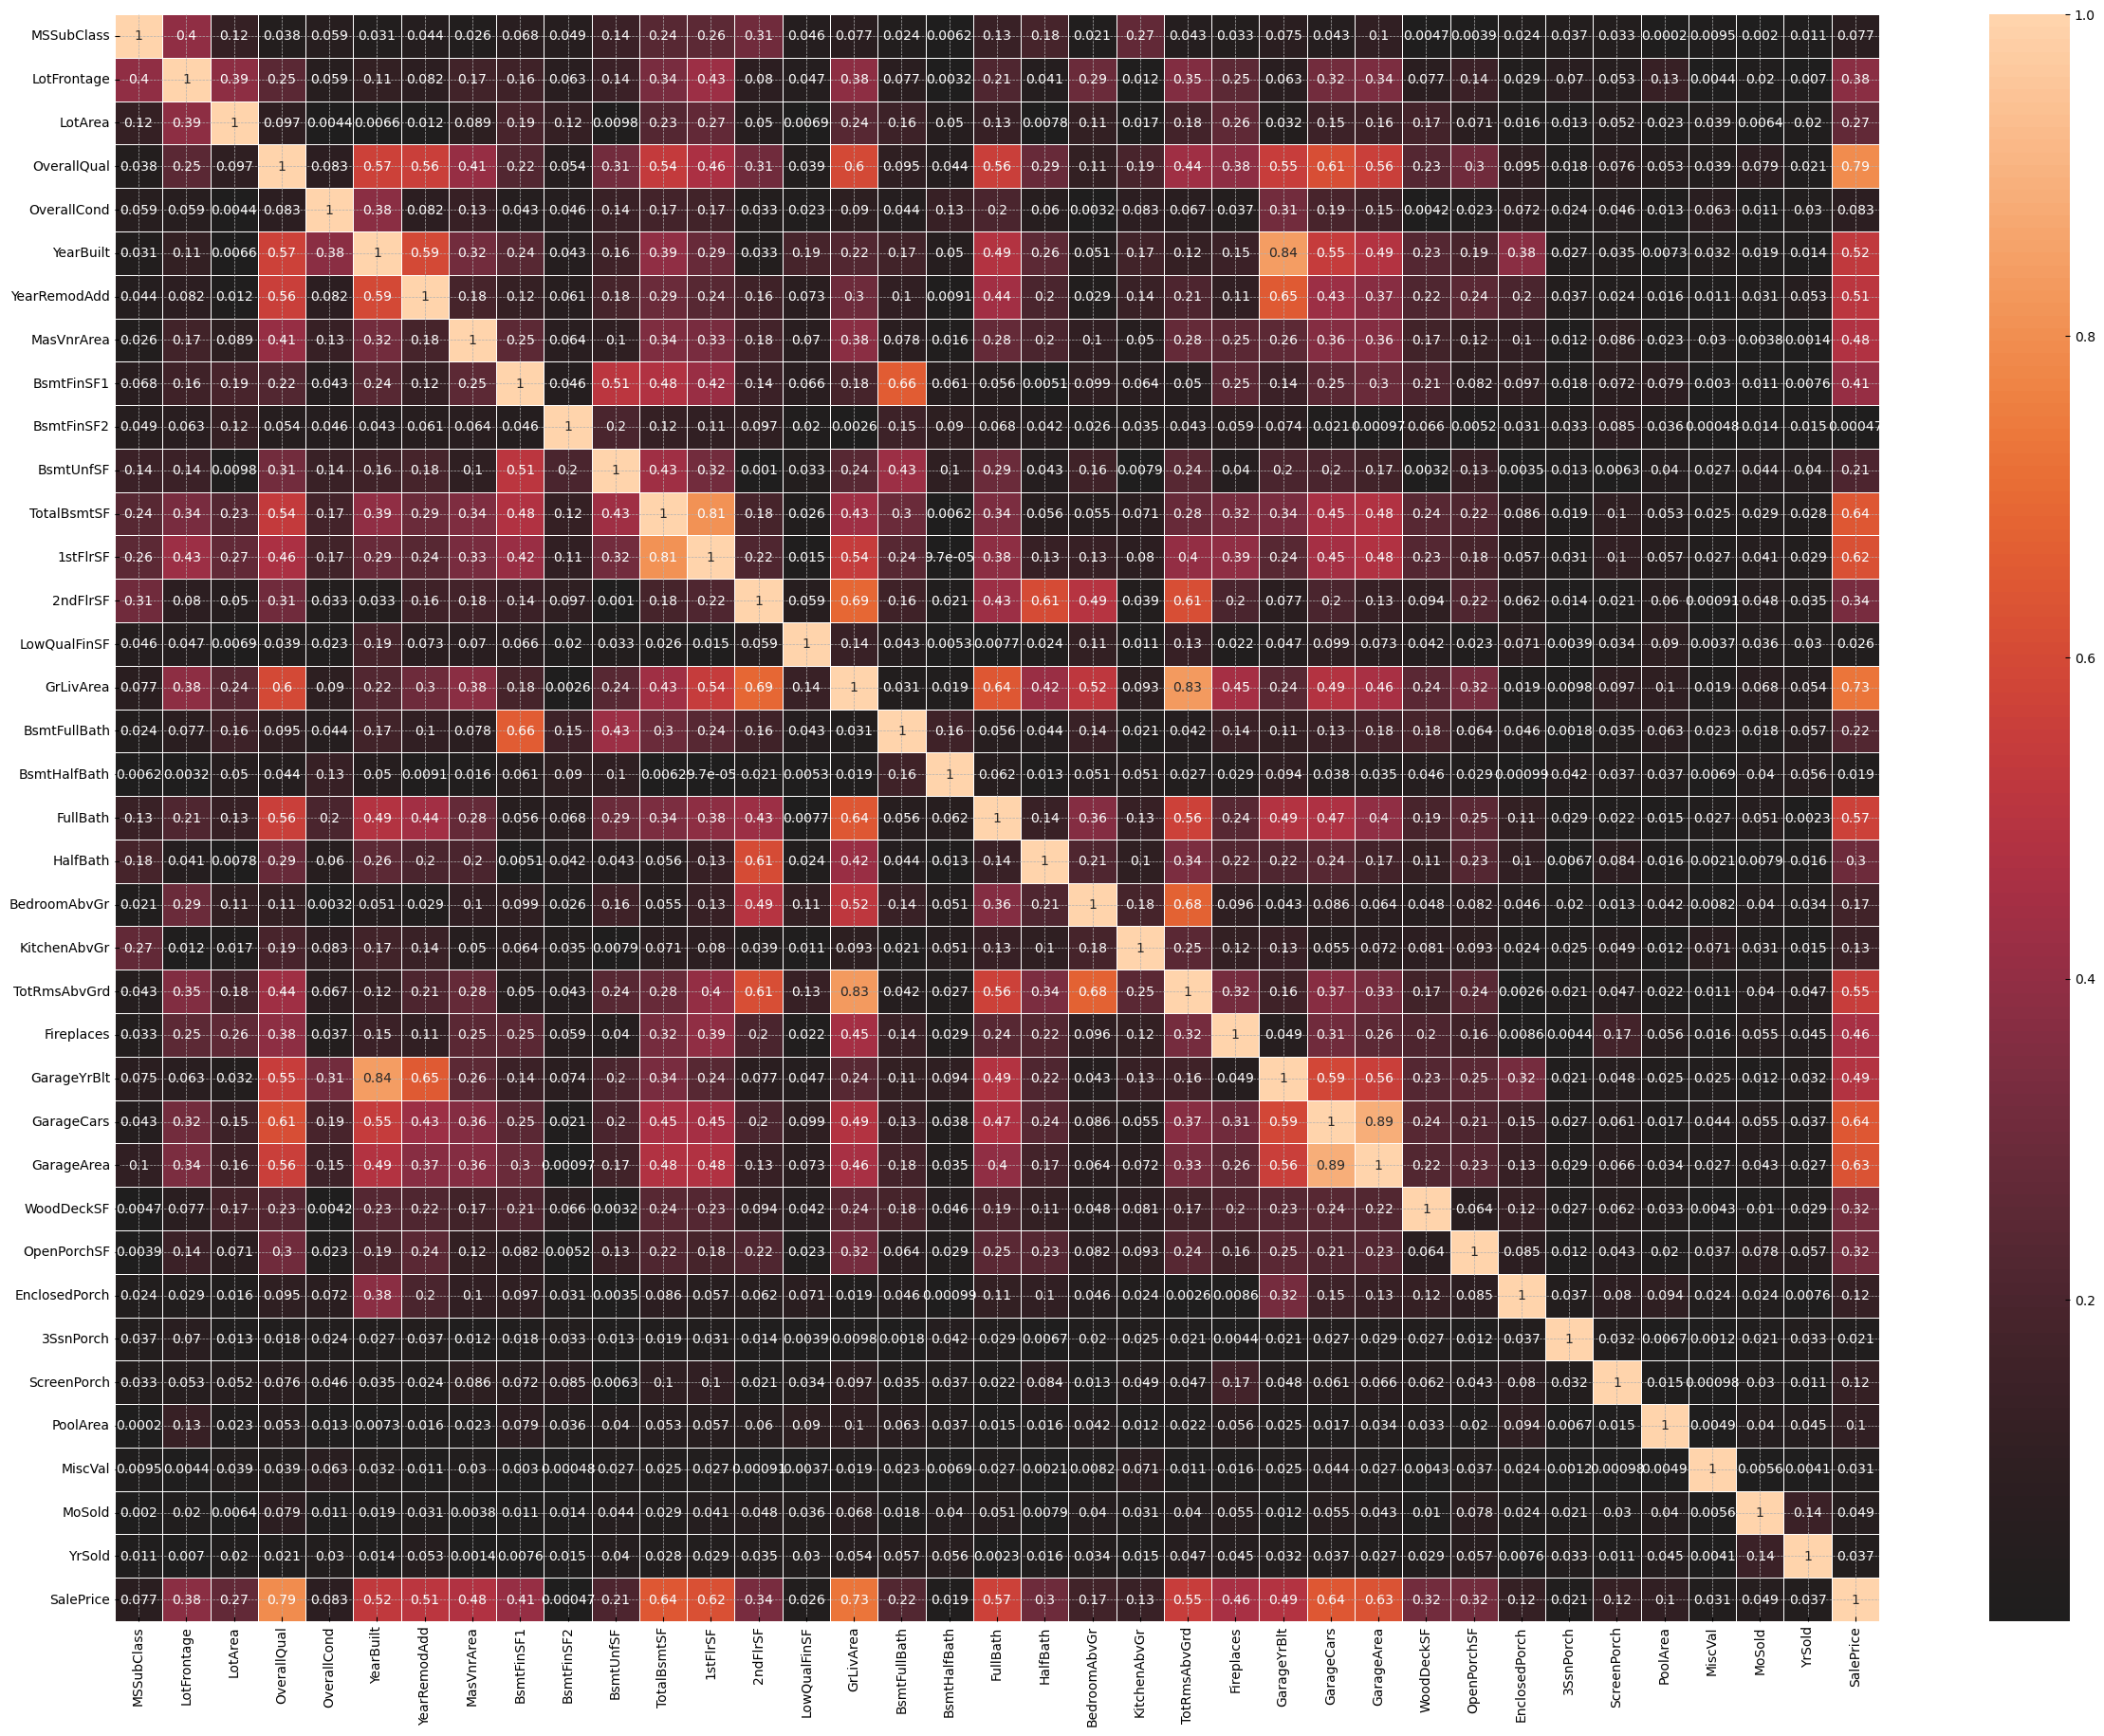

In [15]:
fig, ax = plt.subplots(figsize=(30,22))
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax,center=0);

##### conclusions : 

- OverallQual is an important factor in determining the market value of a property. Homes that have a higher overall quality score tend to command higher prices on the real estate market, as they are perceived to be more desirable and better maintained.

- GrLivArea is an important factor in determining the market value of a property. Generally, larger GrLivArea tends to indicate a larger, more spacious home, which can be more desirable to buyers and command a higher price.

# 2. Feature Engineering

In [16]:
def feature_engineering(df) :
    
    df['HasWoodDeck'] = df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasOpenPorch'] = df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
    df['Has3SsnPorch'] = df['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
    df['HasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    df["SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] +
                                                       df["FullBath"] +
                                                       df["HalfBath"] +
                                                       df["KitchenAbvGr"])
    df['TotalSqrFootage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
    df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
    df['TotalHomeQuality'] = (df['OverallQual'] + df['OverallCond'])
       
    return df

# 3. Pre-processing 

In [17]:
def drop_uninformative(df) : 
    
    uninformative_features = ['Alley','MiscFeature','PoolQC','Fence','Utilities', 'Street']
    df.drop(uninformative_features,axis=1)
    
    return df

In [18]:
def feature_imputation(df):
    
    # Numerical variables : MasVnrArea , GarageYrBlt
    df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].median())
    df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()) 
    df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mean())
    
    # categorical variables : MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, and GarageCond
    
    # NaN values for MasVnrType mean the absence of a masonry veneer
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    
    # NaN values for FireplaceQu mean the absence of the fireplace
    df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
    
    # NaN values for these categorical garage features, means there's no garage
    for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        df[column] = df[column].fillna('None')
        
    # NaN values for these categorical basement features, means there's no basement
    for column in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[column] = df[column].fillna('None')
    
    return df

In [19]:
def feature_encoding(df):
    
    # One hot encoding
    return pd.get_dummies(df).reset_index(drop=True)

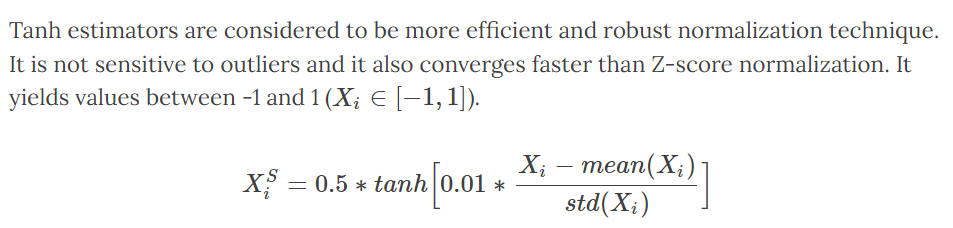

In [20]:
def feature_scaling(df) :
    
    # Apply tanh normalization to each numerical column
    for column in df.select_dtypes(include=np.number):
        col_mean = np.mean(df[column])
        col_std = np.std(df[column])
        df[column] = 0.5 * np.tanh(0.01 * (df[column] - col_mean) / col_std)

    return df

In [21]:
def preprocessing(df):
    
    df = drop_uninformative(df)
    df = feature_imputation(df)
    df = feature_encoding(df)
    df = feature_engineering(df)
    df = feature_scaling(df)
    
    return df

In [22]:
X , y = df.drop('SalePrice', axis=1) , df['SalePrice'] 

In [23]:
X = preprocessing(X)

In [24]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.000364    -0.001195 -0.000998     0.003247    -0.002548   0.005267   
1   -0.004359     0.002313 -0.000445    -0.000374     0.010855   0.000756   
2    0.000364    -0.000494  0.000349     0.003247    -0.002548   0.004933   
3    0.001545    -0.002365 -0.000469     0.003247    -0.002548  -0.009437   
4    0.000364     0.003248  0.001798     0.006868    -0.002548   0.004766   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.004411    0.002570    0.002993   -0.001433  -0.004709    -0.002343   
1     -0.002139   -0.002821    0.006091   -0.001433  -0.003189     0.002460   
2      0.004169    0.001635    0.000486   -0.001433  -0.001487    -0.001586   
3     -0.003595   -0.002821   -0.002590   -0.001433  -0.000284    -0.003526   
4      0.003684    0.006806    0.002412   -0.001433  -0.000851     0.001076   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.004025  0.005870     -0.000614   0.001970      0.005580     -0.001233   
1  0.001377 -0.003938     -0.000614  -0.002391     -0.004057      0.019187   
2 -0.003174  0.006008     -0.000614   0.002710      0.005580     -0.001233   
3 -0.002628  0.004745     -0.000614   0.002038      0.005580     -0.001233   
4 -0.000180  0.008155     -0.000614   0.006720      0.005580     -0.001233   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.003989  0.006174      0.000876     -0.001033      0.004681   -0.004736   
1  0.003989 -0.003817      0.000876     -0.001033     -0.001532    0.003058   
2  0.003989  0.006174      0.000876     -0.001033     -0.001532    0.003058   
3 -0.005060 -0.003817      0.000876     -0.001033      0.001574    0.003058   
4  0.003989  0.006174      0.007003     -0.001033      0.007788    0.003058   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.005099    0.001614    0.001797   -0.003818     0.001135   
1    -0.000525    0.001614   -0.000275    0.008208    -0.003527   
2     0.004683    0.001614    0.003209   -0.003818    -0.000317   
3     0.004058    0.008340    0.004009   -0.003818    -0.000852   
4     0.004474    0.008340    0.008575    0.003931     0.002893   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.001776  -0.000595    -0.001356 -0.000281 -0.000437 -0.008041   
1      -0.001776  -0.000595    -0.001356 -0.000281 -0.000437 -0.002451   
2      -0.001776  -0.000595    -0.001356 -0.000281 -0.000437  0.005003   
3       0.020546  -0.000595    -0.001356 -0.000281 -0.000437 -0.008041   
4      -0.001776  -0.000595    -0.001356 -0.000281 -0.000437  0.010592   

     YrSold  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0  0.000756         -0.000424    -0.001089     -0.00053     0.002575   
1 -0.003021         -0.000424    -0.001089     -0.00053     0.002575   
2  0.000756         -0.000424    -0.001089     -0.00053     0.002575   
3 -0.006799         -0.000424    -0.001089     -0.00053     0.002575   
4  0.000756         -0.000424    -0.001089     -0.00053     0.002575   

   MSZoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  \
0    -0.002069    -0.000346     0.000346   -0.000929   -0.000833   
1    -0.002069    -0.000346     0.000346   -0.000929   -0.000833   
2    -0.002069    -0.000346     0.000346   -0.000929   -0.000833   
3    -0.002069    -0.000346     0.000346   -0.000929   -0.000833   
4    -0.002069    -0.000346     0.000346   -0.000929   -0.000833   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0     -0.003544     -0.000882     -0.000346      0.003826        -0.001027   
1     -0.003544     -0.000882     -0.000346      0.003826        -0.001027   
2      0.007054     -0.000882     -0.000346     -0.006533        -0.001027   
3      0.007054     -0.000882     -0.000346     -0.006533        -0.001027   
4      0.007054     -0.000882     -0.0003

In [25]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

# 4 - Model Building

I successfully addressed the model problem using Two effective techniques : 

1 - Firstly , Trying Different Models using GridSearchCV and select the best models to try them . 
    
2 - Secondly , I employed the training of a meta model called StackingCVRegressor optimizer, utilizing the powerful CatBoostRegressor. By employing meta-learning, which involves learning from other machine learning models, I was able to leverage the predictions from multiple base models and combine them to create a more precise overall prediction. This approach enhanced the accuracy and reliability of the model's outputs .

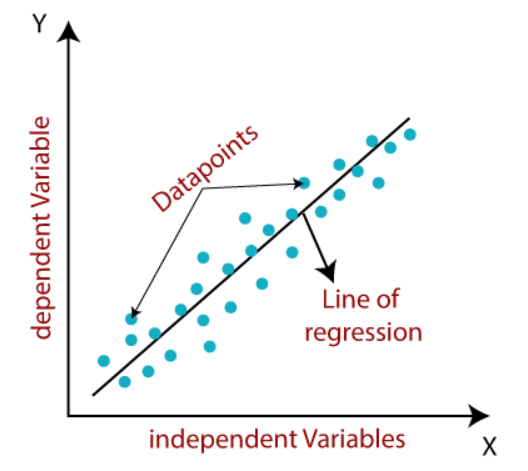

In [26]:
!pip install mlxtend

In [27]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

###### Split X and Y into Train and Validation with Ratios 80:20

In [28]:
X_train, X_validate, y_train, y_validate=train_test_split(X,y, test_size=0.20, random_state=42,shuffle=True)

In [29]:
lasso=Lasso()
ridge=Ridge()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svm=SVR()
xgb=XGBRegressor()
adab=AdaBoostRegressor()
lightgbm = LGBMRegressor()

dict_of_models = {'Lasso':lasso,
                  'Ridge':ridge,
                  'DecisionTreeRegressor' :dt,
                  'RandomForestRegressor':rf,
                  'SVR':svm,
                  'XGBRegressor':xgb,
                  'AdaBoostRegressor':adab,
                  'LGBMRegressor':lightgbm
                 }     

In [30]:
for name, model in dict_of_models.items():
    
    grid = GridSearchCV(estimator=model, param_grid={}, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1,verbose=3)
    grid.fit(X_train , y_train)
    print(name , '\n', -grid.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Lasso 
 30557.22401615155
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Ridge 
 66165.66113908878
Fitting 3 folds for each of 1 candidates, totalling 3 fits
DecisionTreeRegressor 
 45609.519551952
Fitting 3 folds for each of 1 candidates, totalling 3 fits
RandomForestRegressor 
 33738.77838824411
Fitting 3 folds for each of 1 candidates, totalling 3 fits
SVR 
 83150.77958187436
Fitting 3 folds for each of 1 candidates, totalling 3 fits
XGBRegressor 
 34161.092560233206
Fitting 3 folds for each of 1 candidates, totalling 3 fits
AdaBoostRegressor 
 37001.17518911158
Fitting 3 folds for each of 1 candidates, totalling 3 fits
LGBMRegressor 
 31721.481143056477


##### the best four models were Lasso , Random Forest , XGBooost and LGBMRegressor

### Hyperparameters Optimization : Hypertuning

##### A - Lasso :

In [31]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

In [32]:
lasso_params = {'alpha':(np.logspace(-8, 8, 100))}
lasso_random = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, scoring='neg_root_mean_squared_error', cv = kfold , n_jobs=-1,verbose=3)

In [33]:
lasso_random.fit(X_train, y_train)
print(lasso_random.best_params_, '\n', -lasso_random.best_score_,'\n',lasso_random.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'alpha': 5.336699231206324} 
 29602.267121515528 
 Lasso(alpha=5.336699231206324)


###### B - Random Forest :

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=rf_params,  
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1,
    verbose=3
)

In [35]:
rf_random.fit(X_train, y_train)
print(rf_random.best_params_, '\n', -rf_random.best_score_,'\n',rf_random.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False} 
 33686.229632579576 
 RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=800)


###### C - XGBooost

In [36]:
xgb_params = {
    'n_estimators': [1000, 2000, 3000],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.4, 0.5, 0.6]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(),
    param_distributions=xgb_params, 
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1,
    verbose=3
)

In [37]:
xgb_random.fit(X_train, y_train)
print(xgb_random.best_params_, '\n', -xgb_random.best_score_,'\n',xgb_random.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.5} 
 32565.935099389946 
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


###### D - LGBMRegressor

In [38]:
LGBM_params = {
    'n_estimators': [500, 1000, 2000, 3000, 4000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [4, 6, 8, 10, 12],
    'bagging_seed': [8, 16, 32],
    'feature_fraction_seed': [8, 16, 32],
}

LGBM_random = RandomizedSearchCV(
    estimator=LGBMRegressor(),
    param_distributions=LGBM_params, 
    scoring='neg_root_mean_squared_error',
    cv=kfold,
    n_jobs=-1,
    verbose=3
)

In [39]:
LGBM_random.fit(X_train, y_train)
print(LGBM_random.best_params_, '\n', -LGBM_random.best_score_,'\n',LGBM_random.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'num_leaves': 10, 'n_estimators': 2000, 'learning_rate': 0.01, 'feature_fraction_seed': 16, 'bagging_seed': 16} 
 32797.70300547541 
 LGBMRegressor(bagging_seed=16, feature_fraction_seed=16, learning_rate=0.01,
              n_estimators=2000, num_leaves=10)


## Part 1 : Final models

In [40]:
xgb_final_model= xgb_random.best_estimator_
xgb_final_model.fit(X_train,y_train)
final_predict=xgb_final_model.predict(X_validate)
submission = pd.DataFrame({'Id': X_validate.index,'real_SalePrice': y_validate,'predicted_SalePrice': final_predict})
submission.head(50)

Id  real_SalePrice  predicted_SalePrice
Id                                             
77      76          135750        117242.015625
1027  1026          167500        139719.531250
44      43          130250        130081.648438
667    666          129000        189247.734375
530    529          200624        228132.234375
102    101          178000        172748.031250
909    908          131000        128486.140625
1225  1224          184000        190724.375000
778    777          142500        139861.031250
454    453          210000        225916.359375
64      63          140000        149075.359375
948    947          270000        275871.031250
351    350          318061        319808.468750
523    522          159000        149325.656250
908    907          250000        243230.015625
673    672          165000        168589.500000
399    398           67000         70444.265625
826    825          385000        412976.125000
362    361          145000        140920.921875
794    793          225000        234497.109375
934    933          190000        202199.500000
514    513          134000        142725.234375
632    631          209500        230630.250000
844    843          141000        112969.000000
1145  1144           80000         87034.093750
594    593          140000        142081.531250
255    254          145000        139512.515625
82      81          153500        168360.703125
527    526          132000        131985.640625
309    308           82500         98518.625000
368    367          165000        157448.734375
965    964          214900        217639.281250
694    693          108480        111934.203125
766    765          264132        298114.812500
1059  1058          335000        355510.531250
858    857          174000        157833.343750
680    679          128500        130747.648438
1008  1007           88000         91703.906250
813    812           55993         89937.484375
622    621          240000        217134.906250
618    617          105500        120506.750000
193    192          192000        193586.531250
436    435          212000        226964.812500
266    265          175500        177902.171875
1048  1047          145000        142045.812500
79      78          136500        112231.390625
429    428          195400        198660.359375
440    439          110000        141939.953125
304    303          149900        132521.203125
276    275          205000        183638.687500

In [41]:
np.sqrt(mean_squared_error(y_validate, final_predict))

19863.41527481006

In [42]:
lasso_final_model= lasso_random.best_estimator_
lasso_final_model.fit(X_train,y_train)
final_predict=lasso_final_model.predict(X_validate)
submission = pd.DataFrame({'Id': X_validate.index,'real_SalePrice': y_validate,'predicted_SalePrice': final_predict})
submission.head(50)

Id  real_SalePrice  predicted_SalePrice
Id                                             
77      76          135750        108672.917623
1027  1026          167500        143133.305991
44      43          130250        128067.910420
667    666          129000        210542.043979
530    529          200624        252761.551056
102    101          178000        176066.144210
909    908          131000        129537.066677
1225  1224          184000        195481.850713
778    777          142500        125943.371610
454    453          210000        199982.006058
64      63          140000        149987.477093
948    947          270000        251830.902771
351    350          318061        332054.350452
523    522          159000        170336.579422
908    907          250000        224682.422004
673    672          165000        168929.227813
399    398           67000         68340.412175
826    825          385000         50191.908871
362    361          145000        133317.030729
794    793          225000        234862.490175
934    933          190000        196669.943481
514    513          134000        134727.535535
632    631          209500        217493.113856
844    843          141000        129980.340846
1145  1144           80000         67664.914924
594    593          140000        139191.996282
255    254          145000        147670.282352
82      81          153500        196202.378584
527    526          132000        119627.085370
309    308           82500         98308.669217
368    367          165000        167705.534535
965    964          214900        218070.252744
694    693          108480        102014.588837
766    765          264132        270592.620381
1059  1058          335000        367937.217627
858    857          174000        158112.703215
680    679          128500        125206.572988
1008  1007           88000         80639.021400
813    812           55993        108271.607516
622    621          240000        256386.372253
618    617          105500        105347.656237
193    192          192000        199958.193423
436    435          212000        209097.077625
266    265          175500        183934.971682
1048  1047          145000        145370.403457
79      78          136500        125835.983843
429    428          195400        206668.398942
440    439          110000        139940.673690
304    303          149900        131888.930979
276    275          205000        191975.047607

In [43]:
np.sqrt(mean_squared_error(y_validate, final_predict))

31147.14857931196

In [44]:
LGBM_final_model= LGBM_random.best_estimator_
LGBM_final_model.fit(X_train,y_train)
final_predict=LGBM_final_model.predict(X_validate)
submission = pd.DataFrame({'Id': X_validate.index,'real_SalePrice': y_validate,'predicted_SalePrice': final_predict})
submission.head(50)

Id  real_SalePrice  predicted_SalePrice
Id                                             
77      76          135750        117602.856510
1027  1026          167500        144959.022961
44      43          130250        135205.193637
667    666          129000        184949.438003
530    529          200624        262756.792210
102    101          178000        169043.791724
909    908          131000        130647.637374
1225  1224          184000        193783.403289
778    777          142500        137914.669448
454    453          210000        234427.281539
64      63          140000        142698.460309
948    947          270000        249557.322818
351    350          318061        326843.159687
523    522          159000        141812.721262
908    907          250000        210275.098647
673    672          165000        163104.233157
399    398           67000         71179.416408
826    825          385000        464906.292692
362    361          145000        136854.560568
794    793          225000        227415.481218
934    933          190000        204778.273920
514    513          134000        147251.628839
632    631          209500        231977.603315
844    843          141000        111473.081373
1145  1144           80000         89076.260090
594    593          140000        142086.744374
255    254          145000        146159.745073
82      81          153500        175885.325766
527    526          132000        126455.303247
309    308           82500         98038.286221
368    367          165000        152161.068256
965    964          214900        219026.761036
694    693          108480        111063.502385
766    765          264132        286722.996177
1059  1058          335000        396973.510966
858    857          174000        163992.403947
680    679          128500        126001.751864
1008  1007           88000         90767.989171
813    812           55993         95704.940062
622    621          240000        218973.203577
618    617          105500        112636.683201
193    192          192000        195281.413208
436    435          212000        221416.581993
266    265          175500        179716.569590
1048  1047          145000        146172.962711
79      78          136500        113310.064549
429    428          195400        204463.781288
440    439          110000        128806.914062
304    303          149900        129729.898883
276    275          205000        181260.198568

In [45]:
np.sqrt(mean_squared_error(y_validate, final_predict))

24061.905234851565

In [46]:
rf_final_model= rf_random.best_estimator_
rf_final_model.fit(X_train,y_train)
final_predict=rf_final_model.predict(X_validate)
submission = pd.DataFrame({'Id': X_validate.index,'real_SalePrice': y_validate,'predicted_SalePrice': final_predict})
submission.head(50)

Id  real_SalePrice  predicted_SalePrice
Id                                             
77      76          135750         118265.75375
1027  1026          167500         150929.36125
44      43          130250         131520.20375
667    666          129000         201773.10250
530    529          200624         242706.50125
102    101          178000         190262.54250
909    908          131000         133526.63875
1225  1224          184000         194021.43125
778    777          142500         140600.92375
454    453          210000         212093.06250
64      63          140000         141283.27250
948    947          270000         278379.58750
351    350          318061         301863.62625
523    522          159000         152663.30500
908    907          250000         198053.00000
673    672          165000         171119.68750
399    398           67000          94002.98375
826    825          385000         393292.39500
362    361          145000         131811.28625
794    793          225000         227677.08875
934    933          190000         205013.13125
514    513          134000         142655.78750
632    631          209500         227399.62875
844    843          141000         127616.45750
1145  1144           80000         102276.18250
594    593          140000         140066.58750
255    254          145000         140072.76875
82      81          153500         181154.78375
527    526          132000         128737.06625
309    308           82500         112553.46500
368    367          165000         159034.18875
965    964          214900         224360.73500
694    693          108480         116712.80875
766    765          264132         257814.19875
1059  1058          335000         361354.96000
858    857          174000         168842.91875
680    679          128500         133370.99375
1008  1007           88000          95437.11750
813    812           55993         100148.19125
622    621          240000         229610.57000
618    617          105500         119781.23250
193    192          192000         198634.04625
436    435          212000         222404.87625
266    265          175500         176192.69625
1048  1047          145000         147499.60125
79      78          136500         123064.26125
429    428          195400         195149.15875
440    439          110000         132975.75250
304    303          149900         134528.31625
276    275          205000         164868.68875

In [47]:
np.sqrt(mean_squared_error(y_validate, final_predict))

22236.821908173675

## Part 2 : StackingCVRegressor optimizer

#### meta-learning can be used to combine the predictions of multiple base models to create a more accurate overall prediction.

In [48]:
meta_model = CatBoostRegressor(iterations = 6000,
                               learning_rate = 0.005,
                               depth = 4,
                               l2_leaf_reg = 1,
                               eval_metric = 'RMSE',
                               random_seed = 11,
                               logging_level = 'Silent')

stacking_model = StackingCVRegressor(regressors=(lasso_final_model,xgb_final_model,LGBM_final_model,rf_final_model),
                                      meta_regressor=meta_model,
                                      use_features_in_secondary=True)

In [49]:
stacking_model.fit(X_train,y_train)
final_predict=stacking_model.predict(X_validate)
submission = pd.DataFrame({'Id': X_validate.index,'real_SalePrice': y_validate,'predicted_SalePrice': final_predict})
submission.head(50)

Id  real_SalePrice  predicted_SalePrice
Id                                             
77      76          135750        115296.545249
1027  1026          167500        141559.798769
44      43          130250        132580.760123
667    666          129000        187170.737962
530    529          200624        249480.530111
102    101          178000        176907.841320
909    908          131000        129548.050232
1225  1224          184000        191715.542304
778    777          142500        138031.679751
454    453          210000        218830.368577
64      63          140000        147571.693715
948    947          270000        263314.878356
351    350          318061        311912.932657
523    522          159000        155694.288509
908    907          250000        241554.139838
673    672          165000        173664.253480
399    398           67000         73677.880088
826    825          385000        282961.064325
362    361          145000        141920.073085
794    793          225000        234170.980381
934    933          190000        197791.381666
514    513          134000        139774.429462
632    631          209500        225529.430880
844    843          141000        112881.577857
1145  1144           80000         91875.884835
594    593          140000        140085.964096
255    254          145000        136818.194865
82      81          153500        170395.764090
527    526          132000        133035.104656
309    308           82500        103704.898755
368    367          165000        154333.943632
965    964          214900        218777.041634
694    693          108480        104674.197072
766    765          264132        291600.066789
1059  1058          335000        363659.184010
858    857          174000        163168.990148
680    679          128500        127021.521095
1008  1007           88000         88626.484630
813    812           55993         91531.641056
622    621          240000        244567.857789
618    617          105500        108334.733037
193    192          192000        190957.040970
436    435          212000        220640.587247
266    265          175500        177625.307123
1048  1047          145000        144802.214154
79      78          136500        111795.401856
429    428          195400        198172.516886
440    439          110000        136817.510926
304    303          149900        131434.996028
276    275          205000        172321.764379

In [50]:
np.sqrt(mean_squared_error(y_validate, final_predict))

20612.363525784065